## Data Prep

### Prepare dataset files
We need to create a txt file which contains the path to the images. These files will be used while setting up the training. 

The data is split into train and test in the ratio of 80:20. So, we will use 80% of the data for training and the rest for testing after a few iterations of training.

In [1]:
import random
import os
import subprocess
import sys

image_dir = "./kaggle_and_no-mask_dataset"
f_val = open("data_test.txt", 'w')
f_train = open("data_train.txt", 'w')

path, dirs, files = next(os.walk(image_dir))
data_size = len(files)

ind = 0
data_test_size = int(0.2 * data_size)
test_array = random.sample(range(data_size), k=data_test_size)

for f in os.listdir(image_dir):
    if(f.split(".")[-1] == "jpg"):
        ind += 1
        
        if ind in test_array:
            f_val.write(image_dir+'/'+f+'\n')
        else:
            f_train.write(image_dir+'/'+f+'\n')

f_train.close()
f_val.close()

### Display images

In [12]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

## YOLO V4

Train V4

In [88]:
!./darknet/darknet detector train yolov4-mask-no-mask-setup.data yolov4-mask-no-mask-train.cfg yolov4-leaky-416.weights -map 2> v4_train_log.txt


 Prepare additional network for mAP calculation...
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
yolov4-mask-no-mask-train
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 0 K-images (0 Kilo-batches_64) 
Learning Rate: 0.001, Momentum: 0.949, Decay: 0.0005
 If error occurs - run training with flag: -dont_show 
Resizing, random_coef = 1.40 

 608 x 608 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000025 seconds

 (next mAP calculation at 1000 iterations) 
 1: 440.559631, 440.559631 avg loss, 0.000000 rate, 3.724619 seconds, 64 images, -1.000000 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 1000 

 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.456883 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 1000 iterations) 
 41: 277.409058, 373.187592 avg loss, 0.000000 rate, 2.585333 seconds, 2624 images, 9.858620 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 1000 iterations) 
 42: 277.311707, 363.600006 avg loss, 0.000000 rate, 2.412234 seconds, 2688 images, 9.844194 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 1000 iterations) 
 43: 277.563538, 354.996368 avg loss, 0.000000 rate, 2.507304 seconds, 2752 images, 9.812478 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 1000 iterations) 
 44: 278.418274, 347.338562 avg loss, 0.000000 rate, 2.481070 seconds, 2816 images, 9.783702 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1000 iterations) 
 45: 279.050110, 340.509705 avg loss, 0.000000 rate, 2.407322 seconds, 2880 images, 9.754482 hours left
Loade


 (next mAP calculation at 1000 iterations) 
 84: 205.572266, 210.354904 avg loss, 0.000000 rate, 1.944967 seconds, 5376 images, 8.492877 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 1000 iterations) 
 85: 208.397461, 210.159164 avg loss, 0.000000 rate, 1.875581 seconds, 5440 images, 8.461522 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 1000 iterations) 
 86: 206.784103, 209.821655 avg loss, 0.000000 rate, 1.986182 seconds, 5504 images, 8.428564 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 1000 iterations) 
 87: 204.509201, 209.290405 avg loss, 0.000000 rate, 1.955403 seconds, 5568 images, 8.398977 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 1000 iterations) 
 88: 206.352600, 208.996628 avg loss, 0.000000 rate, 1.933623 seconds, 5632 images, 8.368832 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 1000 iterations) 
 89: 206.688919, 208.765854 avg loss, 0.000000 rate, 1.973757 seconds, 5696 images, 8


 (next mAP calculation at 1000 iterations) 
 128: 160.534454, 221.497192 avg loss, 0.000000 rate, 1.748206 seconds, 8192 images, 7.890115 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 1000 iterations) 
 129: 156.191162, 214.966583 avg loss, 0.000000 rate, 1.701556 seconds, 8256 images, 7.859154 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 1000 iterations) 
 130: 156.310730, 209.100998 avg loss, 0.000000 rate, 1.705322 seconds, 8320 images, 7.827220 hours left
Resizing, random_coef = 1.40 

 544 x 544 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000030 seconds

 (next mAP calculation at 1000 iterations) 
 131: 302.581635, 218.449066 avg loss, 0.000000 rate, 3.217996 seconds, 8384 images, 7.795703 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 1000 iterations) 
 132: 299.471527, 226.551315 avg loss, 0.000000 rate, 3.109517 seconds, 8448 images, 7.805964 hours left
Loaded: 0.000030 seconds

 (ne


 (next mAP calculation at 1000 iterations) 
 171: 149.799194, 217.128906 avg loss, 0.000001 rate, 2.587702 seconds, 10944 images, 7.838852 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 1000 iterations) 
 172: 148.116913, 210.227707 avg loss, 0.000001 rate, 2.484675 seconds, 11008 images, 7.850842 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 1000 iterations) 
 173: 144.811829, 203.686127 avg loss, 0.000001 rate, 2.454041 seconds, 11072 images, 7.840166 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 1000 iterations) 
 174: 140.712524, 197.388763 avg loss, 0.000001 rate, 2.364053 seconds, 11136 images, 7.828754 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 1000 iterations) 
 175: 135.853394, 191.235229 avg loss, 0.000001 rate, 2.342022 seconds, 11200 images, 7.814993 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 1000 iterations) 
 176: 135.384186, 185.650131 avg loss, 0.000001 rate, 2.492978 seconds, 112

Loaded: 0.000026 seconds

 (next mAP calculation at 1000 iterations) 
 215: 105.268333, 76.533752 avg loss, 0.000002 rate, 3.893574 seconds, 13760 images, 7.020081 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 1000 iterations) 
 216: 102.115540, 79.091934 avg loss, 0.000002 rate, 3.830696 seconds, 13824 images, 7.055711 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 1000 iterations) 
 217: 102.081612, 81.390900 avg loss, 0.000002 rate, 3.937262 seconds, 13888 images, 7.089265 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1000 iterations) 
 218: 101.161430, 83.367950 avg loss, 0.000002 rate, 3.947575 seconds, 13952 images, 7.125368 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 1000 iterations) 
 219: 94.544846, 84.485641 avg loss, 0.000002 rate, 3.847622 seconds, 14016 images, 7.161380 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1000 iterations) 
 220: 95.445282, 85.581604 avg loss, 0.000002 rate, 3.78


 (next mAP calculation at 1000 iterations) 
 259: 49.188564, 58.886883 avg loss, 0.000004 rate, 3.533330 seconds, 16576 images, 7.787265 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 1000 iterations) 
 260: 48.649628, 57.863159 avg loss, 0.000005 rate, 3.543793 seconds, 16640 images, 7.804999 hours left
Resizing, random_coef = 1.40 

 480 x 480 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.804737 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 1000 iterations) 
 261: 34.881950, 55.565037 avg loss, 0.000005 rate, 2.346232 seconds, 16704 images, 7.822829 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1000 iterations) 
 262: 33.436623, 53.352196 avg loss, 0.000005 rate, 2.321413 seconds, 16768 images, 7.829843 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1000 iterations) 
 263: 34.637718, 51.480747 avg loss, 0.000005 rate, 2.347153 seconds, 16832 images, 7.81434

Loaded: 0.000031 seconds

 (next mAP calculation at 1000 iterations) 
 302: 13.485267, 22.759636 avg loss, 0.000008 rate, 1.896849 seconds, 19328 images, 7.566469 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1000 iterations) 
 303: 15.934590, 22.077131 avg loss, 0.000008 rate, 1.800601 seconds, 19392 images, 7.541905 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 1000 iterations) 
 304: 15.640863, 21.433504 avg loss, 0.000009 rate, 1.799875 seconds, 19456 images, 7.514988 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1000 iterations) 
 305: 16.843630, 20.974516 avg loss, 0.000009 rate, 1.915551 seconds, 19520 images, 7.488316 hours left
Loaded: 0.000044 seconds

 (next mAP calculation at 1000 iterations) 
 306: 16.417330, 20.518797 avg loss, 0.000009 rate, 1.901469 seconds, 19584 images, 7.465020 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1000 iterations) 
 307: 16.489216, 20.115839 avg loss, 0.000009 rate, 1.785220

Loaded: 0.000029 seconds

 (next mAP calculation at 1000 iterations) 
 346: 12.841791, 11.926635 avg loss, 0.000014 rate, 1.986406 seconds, 22144 images, 6.666801 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 1000 iterations) 
 347: 12.304224, 11.964394 avg loss, 0.000014 rate, 1.905489 seconds, 22208 images, 6.653403 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 1000 iterations) 
 348: 10.961118, 11.864066 avg loss, 0.000015 rate, 2.049836 seconds, 22272 images, 6.637963 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 1000 iterations) 
 349: 11.466880, 11.824347 avg loss, 0.000015 rate, 1.895273 seconds, 22336 images, 6.626543 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 1000 iterations) 
 350: 11.506286, 11.792542 avg loss, 0.000015 rate, 1.933028 seconds, 22400 images, 6.611088 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.


 (next mAP calculation at 1000 iterations) 
 390: 10.917646, 10.467231 avg loss, 0.000023 rate, 1.392744 seconds, 24960 images, 6.149926 hours left
Resizing, random_coef = 1.40 

 448 x 448 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000024 seconds

 (next mAP calculation at 1000 iterations) 
 391: 10.026619, 10.423170 avg loss, 0.000023 rate, 1.977649 seconds, 25024 images, 6.125606 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 1000 iterations) 
 392: 12.247951, 10.605648 avg loss, 0.000024 rate, 1.967887 seconds, 25088 images, 6.117138 hours left
Loaded: 0.000047 seconds

 (next mAP calculation at 1000 iterations) 
 393: 10.348695, 10.579953 avg loss, 0.000024 rate, 2.034487 seconds, 25152 images, 6.108488 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 1000 iterations) 
 394: 10.828078, 10.604766 avg loss, 0.000024 rate, 2.038545 seconds, 25216 images, 6.101697 hours left
Loaded: 0.000046 seconds

 (next mA


 (next mAP calculation at 1000 iterations) 
 433: 7.852423, 10.983856 avg loss, 0.000035 rate, 1.406065 seconds, 27712 images, 6.381575 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 1000 iterations) 
 434: 9.098179, 10.795288 avg loss, 0.000035 rate, 1.465611 seconds, 27776 images, 6.355126 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1000 iterations) 
 435: 7.628619, 10.478621 avg loss, 0.000036 rate, 1.393776 seconds, 27840 images, 6.330521 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1000 iterations) 
 436: 9.940131, 10.424772 avg loss, 0.000036 rate, 1.414720 seconds, 27904 images, 6.304248 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1000 iterations) 
 437: 10.700335, 10.452329 avg loss, 0.000036 rate, 1.383771 seconds, 27968 images, 6.278791 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 1000 iterations) 
 438: 10.209803, 10.428076 avg loss, 0.000037 rate, 1.513217 seconds, 28032 images, 6.252


 (next mAP calculation at 1000 iterations) 
 477: 8.077396, 9.639892 avg loss, 0.000052 rate, 2.204024 seconds, 30528 images, 6.181740 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 1000 iterations) 
 478: 10.644011, 9.740304 avg loss, 0.000052 rate, 2.320792 seconds, 30592 images, 6.178227 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 1000 iterations) 
 479: 13.168325, 10.083106 avg loss, 0.000053 rate, 2.381284 seconds, 30656 images, 6.177831 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 1000 iterations) 
 480: 10.380756, 10.112871 avg loss, 0.000053 rate, 2.347715 seconds, 30720 images, 6.179032 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.680129 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 1000 iterations) 
 481: 9.163840, 10.017968 avg loss, 0.000054 rate, 1.917312 seconds, 30784 images, 6.179326 ho

 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 1.069375 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 1000 iterations) 
 521: 9.417826, 10.638623 avg loss, 0.000074 rate, 1.900997 seconds, 33344 images, 6.277005 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 1000 iterations) 
 522: 7.732313, 10.347992 avg loss, 0.000074 rate, 1.765653 seconds, 33408 images, 6.292447 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 1000 iterations) 
 523: 10.082783, 10.321471 avg loss, 0.000075 rate, 1.836215 seconds, 33472 images, 6.276009 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1000 iterations) 
 524: 6.608822, 9.950207 avg loss, 0.000075 rate, 1.837384 seconds, 33536 images, 6.261588 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1000 iterations) 
 525: 12.429350, 10.198121 avg loss, 0.000076 rate, 2.111568 seconds, 33600 images, 6.247337 hours left
Loaded: 0


 (next mAP calculation at 1000 iterations) 
 565: 10.636599, 9.537189 avg loss, 0.000102 rate, 3.449640 seconds, 36160 images, 6.639328 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1000 iterations) 
 566: 9.919540, 9.575424 avg loss, 0.000103 rate, 3.436770 seconds, 36224 images, 6.663345 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 1000 iterations) 
 567: 12.409344, 9.858816 avg loss, 0.000103 rate, 3.484489 seconds, 36288 images, 6.686775 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1000 iterations) 
 568: 11.606204, 10.033555 avg loss, 0.000104 rate, 3.440698 seconds, 36352 images, 6.711212 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 1000 iterations) 
 569: 10.028509, 10.033051 avg loss, 0.000105 rate, 3.469500 seconds, 36416 images, 6.734247 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 1000 iterations) 
 570: 8.917165, 9.921462 avg loss, 0.000106 rate, 3.468290 seconds, 36480 images, 6.75779


 (next mAP calculation at 1000 iterations) 
 610: 13.069113, 9.551371 avg loss, 0.000138 rate, 3.522689 seconds, 39040 images, 6.412813 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.688188 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 1000 iterations) 
 611: 8.141459, 9.410379 avg loss, 0.000139 rate, 1.594106 seconds, 39104 images, 6.440570 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1000 iterations) 
 612: 6.801514, 9.149493 avg loss, 0.000140 rate, 1.580113 seconds, 39168 images, 6.435688 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 1000 iterations) 
 613: 8.381380, 9.072681 avg loss, 0.000141 rate, 1.592230 seconds, 39232 images, 6.412538 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 1000 iterations) 
 614: 8.469198, 9.012333 avg loss, 0.000142 rate, 1.468309 seconds, 39296 images, 6.389931 hours l


 (next mAP calculation at 1000 iterations) 
 654: 6.878335, 8.109091 avg loss, 0.000183 rate, 1.432037 seconds, 41856 images, 6.156941 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 1000 iterations) 
 655: 8.281229, 8.126305 avg loss, 0.000184 rate, 1.584665 seconds, 41920 images, 6.132550 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 1000 iterations) 
 656: 6.913929, 8.005067 avg loss, 0.000185 rate, 1.510418 seconds, 41984 images, 6.112360 hours left
Loaded: 0.052349 seconds

 (next mAP calculation at 1000 iterations) 
 657: 8.033179, 8.007878 avg loss, 0.000186 rate, 1.573509 seconds, 42048 images, 6.090442 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 1000 iterations) 
 658: 6.632918, 7.870382 avg loss, 0.000187 rate, 1.537470 seconds, 42112 images, 6.071733 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 1000 iterations) 
 659: 9.055442, 7.988888 avg loss, 0.000189 rate, 1.556614 seconds, 42176 images, 6.050914 hour


 (next mAP calculation at 1000 iterations) 
 699: 7.818416, 8.477644 avg loss, 0.000239 rate, 3.264076 seconds, 44736 images, 7.043855 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1000 iterations) 
 700: 6.848335, 8.314713 avg loss, 0.000240 rate, 3.451523 seconds, 44800 images, 7.057748 hours left
Resizing, random_coef = 1.40 

 544 x 544 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.508104 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 1000 iterations) 
 701: 6.284850, 8.111727 avg loss, 0.000241 rate, 3.266683 seconds, 44864 images, 7.076336 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1000 iterations) 
 702: 7.183468, 8.018901 avg loss, 0.000243 rate, 3.189603 seconds, 44928 images, 7.103078 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 1000 iterations) 
 703: 7.981426, 8.015154 avg loss, 0.000244 rate, 3.272151 seconds, 44992 images, 7.114428 hours le

Loaded: 0.000023 seconds

 (next mAP calculation at 1000 iterations) 
 742: 3.704984, 5.810133 avg loss, 0.000303 rate, 1.424068 seconds, 47488 images, 6.683747 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 1000 iterations) 
 743: 5.667078, 5.795827 avg loss, 0.000305 rate, 1.426098 seconds, 47552 images, 6.653533 hours left
Loaded: 0.000046 seconds

 (next mAP calculation at 1000 iterations) 
 744: 6.328918, 5.849136 avg loss, 0.000306 rate, 1.492825 seconds, 47616 images, 6.623669 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 1000 iterations) 
 745: 7.074765, 5.971699 avg loss, 0.000308 rate, 1.560100 seconds, 47680 images, 6.595816 hours left
Loaded: 0.000050 seconds

 (next mAP calculation at 1000 iterations) 
 746: 5.414102, 5.915939 avg loss, 0.000310 rate, 1.643558 seconds, 47744 images, 6.569966 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 1000 iterations) 
 747: 5.772115, 5.901557 avg loss, 0.000311 rate, 1.592313 seconds, 47


 (next mAP calculation at 1000 iterations) 
 786: 8.351644, 6.336013 avg loss, 0.000382 rate, 2.867814 seconds, 50304 images, 6.963320 hours left
Loaded: 0.000047 seconds

 (next mAP calculation at 1000 iterations) 
 787: 7.304620, 6.432874 avg loss, 0.000384 rate, 2.530167 seconds, 50368 images, 6.967089 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 1000 iterations) 
 788: 4.511494, 6.240736 avg loss, 0.000386 rate, 2.608197 seconds, 50432 images, 6.962170 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 1000 iterations) 
 789: 6.116007, 6.228263 avg loss, 0.000388 rate, 2.584838 seconds, 50496 images, 6.959290 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 1000 iterations) 
 790: 4.910347, 6.096471 avg loss, 0.000390 rate, 2.594673 seconds, 50560 images, 6.955834 hours left
Resizing, random_coef = 1.40 

 512 x 512 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.849613 seconds - performance bottle

 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000063 seconds

 (next mAP calculation at 1000 iterations) 
 831: 6.873248, 5.104527 avg loss, 0.000477 rate, 6.444374 seconds, 53184 images, 7.559935 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 1000 iterations) 
 832: 5.675465, 5.161620 avg loss, 0.000479 rate, 6.509955 seconds, 53248 images, 7.648472 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1000 iterations) 
 833: 5.187154, 5.164174 avg loss, 0.000481 rate, 6.135575 seconds, 53312 images, 7.737775 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 1000 iterations) 
 834: 5.669442, 5.214701 avg loss, 0.000484 rate, 6.330055 seconds, 53376 images, 7.816634 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 1000 iterations) 
 835: 8.166109, 5.509841 avg loss, 0.000486 rate, 6.401450 seconds, 53440 images, 7.899639 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1000 iterat

Loaded: 0.000029 seconds

 (next mAP calculation at 1000 iterations) 
 875: 4.382356, 4.905045 avg loss, 0.000586 rate, 3.432323 seconds, 56000 images, 8.885883 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 1000 iterations) 
 876: 4.912318, 4.905772 avg loss, 0.000589 rate, 3.452434 seconds, 56064 images, 8.884025 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 1000 iterations) 
 877: 4.074023, 4.822598 avg loss, 0.000592 rate, 3.488640 seconds, 56128 images, 8.882685 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 1000 iterations) 
 878: 4.272263, 4.767564 avg loss, 0.000594 rate, 3.482954 seconds, 56192 images, 8.882267 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1000 iterations) 
 879: 4.476348, 4.738442 avg loss, 0.000597 rate, 3.424711 seconds, 56256 images, 8.881700 hours left
Loaded: 0.000042 seconds

 (next mAP calculation at 1000 iterations) 
 880: 4.427043, 4.707303 avg loss, 0.000600 rate, 3.415997 seconds, 56


 (next mAP calculation at 1000 iterations) 
 920: 5.572383, 5.131530 avg loss, 0.000716 rate, 6.199670 seconds, 58880 images, 10.529298 hours left
Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.804555 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 1000 iterations) 
 921: 5.432089, 5.161586 avg loss, 0.000720 rate, 2.936187 seconds, 58944 images, 10.580375 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 1000 iterations) 
 922: 2.968239, 4.942251 avg loss, 0.000723 rate, 2.851653 seconds, 59008 images, 10.568911 hours left
Loaded: 0.000040 seconds

 (next mAP calculation at 1000 iterations) 
 923: 4.058005, 4.853827 avg loss, 0.000726 rate, 2.997847 seconds, 59072 images, 10.535132 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 1000 iterations) 
 924: 4.360727, 4.804517 avg loss, 0.000729 rate, 3.028761 seconds, 59136 images, 10.505370 hou

Loaded: 0.000041 seconds

 (next mAP calculation at 1000 iterations) 
 963: 6.170367, 4.660055 avg loss, 0.000860 rate, 4.565508 seconds, 61632 images, 9.847499 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 1000 iterations) 
 964: 4.461704, 4.640220 avg loss, 0.000864 rate, 4.578495 seconds, 61696 images, 9.863633 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 1000 iterations) 
 965: 4.637349, 4.639933 avg loss, 0.000867 rate, 4.463572 seconds, 61760 images, 9.879918 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1000 iterations) 
 966: 4.726718, 4.648612 avg loss, 0.000871 rate, 4.621168 seconds, 61824 images, 9.893143 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 1000 iterations) 
 967: 4.040872, 4.587838 avg loss, 0.000874 rate, 4.546181 seconds, 61888 images, 9.910178 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 1000 iterations) 
 968: 5.028257, 4.631880 avg loss, 0.000878 rate, 4.425141 seconds, 61


 (next mAP calculation at 1100 iterations) 
 Last accuracy mAP@0.5 = 68.82 %, best = 68.82 % 
 1002: 3.346392, 4.376101 avg loss, 0.001000 rate, 4.319957 seconds, 64128 images, 10.741795 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1100 iterations) 
 Last accuracy mAP@0.5 = 68.82 %, best = 68.82 % 
 1003: 4.392707, 4.377762 avg loss, 0.001000 rate, 4.384905 seconds, 64192 images, 10.742353 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 1100 iterations) 
 Last accuracy mAP@0.5 = 68.82 %, best = 68.82 % 
 1004: 5.655914, 4.505577 avg loss, 0.001000 rate, 4.657231 seconds, 64256 images, 10.744516 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 1100 iterations) 
 Last accuracy mAP@0.5 = 68.82 %, best = 68.82 % 
 1005: 4.051833, 4.460203 avg loss, 0.001000 rate, 4.482246 seconds, 64320 images, 10.753451 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 1100 iterations) 
 Last accuracy mAP@0.5 = 68.82 %, best = 68.82 % 
 1006: 4.


 (next mAP calculation at 1100 iterations) 
 Last accuracy mAP@0.5 = 68.82 %, best = 68.82 % 
 1037: 3.630469, 4.056509 avg loss, 0.001000 rate, 4.858870 seconds, 66368 images, 11.087111 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 1100 iterations) 
 Last accuracy mAP@0.5 = 68.82 %, best = 68.82 % 
 1038: 4.274332, 4.078291 avg loss, 0.001000 rate, 4.932998 seconds, 66432 images, 11.097213 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 1100 iterations) 
 Last accuracy mAP@0.5 = 68.82 %, best = 68.82 % 
 1039: 3.497282, 4.020190 avg loss, 0.001000 rate, 4.868216 seconds, 66496 images, 11.109046 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1100 iterations) 
 Last accuracy mAP@0.5 = 68.82 %, best = 68.82 % 
 1040: 3.570574, 3.975229 avg loss, 0.001000 rate, 4.807760 seconds, 66560 images, 11.119135 hours left
Resizing, random_coef = 1.40 

 480 x 480 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0


 (next mAP calculation at 1100 iterations) 
 Last accuracy mAP@0.5 = 68.82 %, best = 68.82 % 
 1071: 3.986553, 4.388000 avg loss, 0.001000 rate, 3.511256 seconds, 68544 images, 11.252925 hours left
Loaded: 0.000021 seconds

 (next mAP calculation at 1100 iterations) 
 Last accuracy mAP@0.5 = 68.82 %, best = 68.82 % 
 1072: 3.762464, 4.325446 avg loss, 0.001000 rate, 3.493557 seconds, 68608 images, 11.242124 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1100 iterations) 
 Last accuracy mAP@0.5 = 68.82 %, best = 68.82 % 
 1073: 3.677701, 4.260672 avg loss, 0.001000 rate, 3.435912 seconds, 68672 images, 11.216343 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 1100 iterations) 
 Last accuracy mAP@0.5 = 68.82 %, best = 68.82 % 
 1074: 4.530289, 4.287633 avg loss, 0.001000 rate, 3.466117 seconds, 68736 images, 11.189382 hours left
Loaded: 0.000048 seconds

 (next mAP calculation at 1100 iterations) 
 Last accuracy mAP@0.5 = 68.82 %, best = 68.82 % 
 1075: 2.


 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 75.31 %, best = 75.31 % 
 1102: 2.864753, 3.337451 avg loss, 0.001000 rate, 2.861159 seconds, 70528 images, 10.773520 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 75.31 %, best = 75.31 % 
 1103: 2.350684, 3.238774 avg loss, 0.001000 rate, 2.799348 seconds, 70592 images, 10.736505 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 75.31 %, best = 75.31 % 
 1104: 2.290677, 3.143964 avg loss, 0.001000 rate, 2.857613 seconds, 70656 images, 10.698324 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 75.31 %, best = 75.31 % 
 1105: 3.277622, 3.157330 avg loss, 0.001000 rate, 2.909340 seconds, 70720 images, 10.661956 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 75.31 %, best = 75.31 % 
 1106: 3.

Loaded: 0.000045 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 75.31 %, best = 75.31 % 
 1137: 3.191850, 3.340622 avg loss, 0.001000 rate, 4.399473 seconds, 72768 images, 10.064695 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 75.31 %, best = 75.31 % 
 1138: 4.078293, 3.414389 avg loss, 0.001000 rate, 4.660403 seconds, 72832 images, 10.072362 hours left
Loaded: 0.000057 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 75.31 %, best = 75.31 % 
 1139: 3.378031, 3.410753 avg loss, 0.001000 rate, 4.616600 seconds, 72896 images, 10.086363 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 75.31 %, best = 75.31 % 
 1140: 4.101067, 3.479784 avg loss, 0.001000 rate, 4.621989 seconds, 72960 images, 10.099133 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 


 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 75.31 %, best = 75.31 % 
 1171: 4.581374, 3.670289 avg loss, 0.001000 rate, 3.806508 seconds, 74944 images, 10.335608 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 75.31 %, best = 75.31 % 
 1172: 4.389952, 3.742255 avg loss, 0.001000 rate, 3.842533 seconds, 75008 images, 10.345485 hours left
Loaded: 0.000048 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 75.31 %, best = 75.31 % 
 1173: 3.472742, 3.715304 avg loss, 0.001000 rate, 3.781973 seconds, 75072 images, 10.336258 hours left
Loaded: 0.000047 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 75.31 %, best = 75.31 % 
 1174: 1.997257, 3.543499 avg loss, 0.001000 rate, 3.781526 seconds, 75136 images, 10.325629 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 75.31 %, best = 75.31 % 
 1175: 4.


 (next mAP calculation at 1300 iterations) 
 Last accuracy mAP@0.5 = 79.67 %, best = 79.67 % 
 1202: 3.984736, 3.190891 avg loss, 0.001000 rate, 6.482828 seconds, 76928 images, 10.079315 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 1300 iterations) 
 Last accuracy mAP@0.5 = 79.67 %, best = 79.67 % 
 1203: 3.404510, 3.212253 avg loss, 0.001000 rate, 6.210025 seconds, 76992 images, 10.136956 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 1300 iterations) 
 Last accuracy mAP@0.5 = 79.67 %, best = 79.67 % 
 1204: 3.997047, 3.290732 avg loss, 0.001000 rate, 6.377221 seconds, 77056 images, 10.187336 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1300 iterations) 
 Last accuracy mAP@0.5 = 79.67 %, best = 79.67 % 
 1205: 3.451377, 3.306797 avg loss, 0.001000 rate, 6.228298 seconds, 77120 images, 10.241280 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1300 iterations) 
 Last accuracy mAP@0.5 = 79.67 %, best = 79.67 % 
 1206: 3.

Loaded: 0.000029 seconds

 (next mAP calculation at 1300 iterations) 
 Last accuracy mAP@0.5 = 79.67 %, best = 79.67 % 
 1237: 3.257073, 3.114568 avg loss, 0.001000 rate, 3.538063 seconds, 79168 images, 10.751377 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 1300 iterations) 
 Last accuracy mAP@0.5 = 79.67 %, best = 79.67 % 
 1238: 3.175606, 3.120672 avg loss, 0.001000 rate, 3.477578 seconds, 79232 images, 10.729986 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 1300 iterations) 
 Last accuracy mAP@0.5 = 79.67 %, best = 79.67 % 
 1239: 2.172391, 3.025844 avg loss, 0.001000 rate, 3.312552 seconds, 79296 images, 10.707328 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 1300 iterations) 
 Last accuracy mAP@0.5 = 79.67 %, best = 79.67 % 
 1240: 3.073297, 3.030589 avg loss, 0.001000 rate, 3.409300 seconds, 79360 images, 10.680870 hours left
Resizing, random_coef = 1.40 

 608 x 608 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 


 (next mAP calculation at 1300 iterations) 
 Last accuracy mAP@0.5 = 79.67 %, best = 79.67 % 
 1272: 3.447221, 3.452841 avg loss, 0.001000 rate, 6.365426 seconds, 81408 images, 11.703604 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1300 iterations) 
 Last accuracy mAP@0.5 = 79.67 %, best = 79.67 % 
 1273: 3.292286, 3.436786 avg loss, 0.001000 rate, 6.165681 seconds, 81472 images, 11.740895 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 1300 iterations) 
 Last accuracy mAP@0.5 = 79.67 %, best = 79.67 % 
 1274: 1.507835, 3.243891 avg loss, 0.001000 rate, 6.038993 seconds, 81536 images, 11.772953 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 1300 iterations) 
 Last accuracy mAP@0.5 = 79.67 %, best = 79.67 % 
 1275: 3.894003, 3.308902 avg loss, 0.001000 rate, 6.512294 seconds, 81600 images, 11.801603 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1300 iterations) 
 Last accuracy mAP@0.5 = 79.67 %, best = 79.67 % 
 1276: 3.


 (next mAP calculation at 1400 iterations) 
 Last accuracy mAP@0.5 = 83.06 %, best = 83.06 % 
 1303: 1.660447, 2.860039 avg loss, 0.001000 rate, 2.504966 seconds, 83392 images, 11.810467 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 1400 iterations) 
 Last accuracy mAP@0.5 = 83.06 %, best = 83.06 % 
 1304: 3.022728, 2.876308 avg loss, 0.001000 rate, 2.522266 seconds, 83456 images, 11.752879 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 1400 iterations) 
 Last accuracy mAP@0.5 = 83.06 %, best = 83.06 % 
 1305: 3.924259, 2.981103 avg loss, 0.001000 rate, 2.700987 seconds, 83520 images, 11.696278 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1400 iterations) 
 Last accuracy mAP@0.5 = 83.06 %, best = 83.06 % 
 1306: 3.230186, 3.006011 avg loss, 0.001000 rate, 2.691451 seconds, 83584 images, 11.644553 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 1400 iterations) 
 Last accuracy mAP@0.5 = 83.06 %, best = 83.06 % 
 1307: 1.


 (next mAP calculation at 1400 iterations) 
 Last accuracy mAP@0.5 = 83.06 %, best = 83.06 % 
 1338: 2.965421, 2.943938 avg loss, 0.001000 rate, 3.487998 seconds, 85632 images, 11.036832 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1400 iterations) 
 Last accuracy mAP@0.5 = 83.06 %, best = 83.06 % 
 1339: 3.053356, 2.954880 avg loss, 0.001000 rate, 3.379514 seconds, 85696 images, 11.010389 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1400 iterations) 
 Last accuracy mAP@0.5 = 83.06 %, best = 83.06 % 
 1340: 2.822104, 2.941602 avg loss, 0.001000 rate, 3.327018 seconds, 85760 images, 10.981592 hours left
Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.794181 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 1400 iterations) 
 Last accuracy mAP@0.5 = 83.06 %, best = 83.06 % 
 1341: 2.245558, 2.871998 avg loss, 0.001000 rate, 3.003711 secon

Loaded: 0.000027 seconds

 (next mAP calculation at 1400 iterations) 
 Last accuracy mAP@0.5 = 83.06 %, best = 83.06 % 
 1372: 2.478058, 2.669825 avg loss, 0.001000 rate, 2.526947 seconds, 87808 images, 10.085499 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 1400 iterations) 
 Last accuracy mAP@0.5 = 83.06 %, best = 83.06 % 
 1373: 1.970701, 2.599913 avg loss, 0.001000 rate, 2.518838 seconds, 87872 images, 10.045207 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 1400 iterations) 
 Last accuracy mAP@0.5 = 83.06 %, best = 83.06 % 
 1374: 2.003321, 2.540253 avg loss, 0.001000 rate, 2.519081 seconds, 87936 images, 10.005117 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 1400 iterations) 
 Last accuracy mAP@0.5 = 83.06 %, best = 83.06 % 
 1375: 2.395923, 2.525820 avg loss, 0.001000 rate, 2.523502 seconds, 88000 images, 9.965427 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 1400 iterations) 
 Last accuracy mAP@0.5 = 83.06 %, b


 (next mAP calculation at 1500 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 84.63 % 
 1403: 2.571998, 2.658793 avg loss, 0.001000 rate, 6.119436 seconds, 89792 images, 9.835704 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1500 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 84.63 % 
 1404: 2.311809, 2.624094 avg loss, 0.001000 rate, 6.120779 seconds, 89856 images, 9.883483 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 1500 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 84.63 % 
 1405: 2.745563, 2.636241 avg loss, 0.001000 rate, 6.246479 seconds, 89920 images, 9.930800 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1500 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 84.63 % 
 1406: 3.090925, 2.681710 avg loss, 0.001000 rate, 6.351283 seconds, 89984 images, 9.980627 hours left
Loaded: 0.000046 seconds

 (next mAP calculation at 1500 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 84.63 % 
 1407: 3.1021


 (next mAP calculation at 1500 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 84.63 % 
 1438: 2.636588, 2.703554 avg loss, 0.001000 rate, 2.332659 seconds, 92032 images, 10.518260 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1500 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 84.63 % 
 1439: 2.946409, 2.727839 avg loss, 0.001000 rate, 2.205568 seconds, 92096 images, 10.468556 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 1500 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 84.63 % 
 1440: 2.761384, 2.731194 avg loss, 0.001000 rate, 2.155673 seconds, 92160 images, 10.416321 hours left
Resizing, random_coef = 1.40 

 448 x 448 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000054 seconds

 (next mAP calculation at 1500 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 84.63 % 
 1441: 3.269476, 2.785022 avg loss, 0.001000 rate, 3.889713 seconds, 92224 images, 10.363416 hours left
Loaded: 0


 (next mAP calculation at 1500 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 84.63 % 
 1473: 2.216156, 2.544717 avg loss, 0.001000 rate, 4.459551 seconds, 94272 images, 9.714329 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1500 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 84.63 % 
 1474: 3.503759, 2.640621 avg loss, 0.001000 rate, 4.547221 seconds, 94336 images, 9.722816 hours left
Loaded: 0.000041 seconds

 (next mAP calculation at 1500 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 84.63 % 
 1475: 2.822580, 2.658817 avg loss, 0.001000 rate, 4.425080 seconds, 94400 images, 9.733282 hours left
Loaded: 0.000039 seconds

 (next mAP calculation at 1500 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 84.63 % 
 1476: 2.479752, 2.640911 avg loss, 0.001000 rate, 4.423548 seconds, 94464 images, 9.740739 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 1500 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 84.63 % 
 1477: 3.1355

Loaded: 0.000024 seconds

 (next mAP calculation at 1600 iterations) 
 Last accuracy mAP@0.5 = 83.93 %, best = 84.63 % 
 1504: 2.551677, 2.829721 avg loss, 0.001000 rate, 3.274991 seconds, 96256 images, 10.352539 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 1600 iterations) 
 Last accuracy mAP@0.5 = 83.93 %, best = 84.63 % 
 1505: 2.206113, 2.767361 avg loss, 0.001000 rate, 3.229669 seconds, 96320 images, 10.326304 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1600 iterations) 
 Last accuracy mAP@0.5 = 83.93 %, best = 84.63 % 
 1506: 2.903891, 2.781014 avg loss, 0.001000 rate, 3.269229 seconds, 96384 images, 10.299253 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 1600 iterations) 
 Last accuracy mAP@0.5 = 83.93 %, best = 84.63 % 
 1507: 3.203528, 2.823265 avg loss, 0.001000 rate, 3.262215 seconds, 96448 images, 10.273397 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1600 iterations) 
 Last accuracy mAP@0.5 = 83.93 %, 


 (next mAP calculation at 1600 iterations) 
 Last accuracy mAP@0.5 = 83.93 %, best = 84.63 % 
 1539: 3.003738, 2.782115 avg loss, 0.001000 rate, 3.245632 seconds, 98496 images, 10.036998 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1600 iterations) 
 Last accuracy mAP@0.5 = 83.93 %, best = 84.63 % 
 1540: 2.854747, 2.789378 avg loss, 0.001000 rate, 3.232703 seconds, 98560 images, 10.012910 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.676873 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 1600 iterations) 
 Last accuracy mAP@0.5 = 83.93 %, best = 84.63 % 
 1541: 1.541433, 2.664584 avg loss, 0.001000 rate, 2.553412 seconds, 98624 images, 9.988750 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 1600 iterations) 
 Last accuracy mAP@0.5 = 83.93 %, best = 84.63 % 
 1542: 2.751432, 2.673269 avg loss, 0.001000 rate, 2.604179 second


 (next mAP calculation at 1600 iterations) 
 Last accuracy mAP@0.5 = 83.93 %, best = 84.63 % 
 1573: 2.010636, 2.242582 avg loss, 0.001000 rate, 3.476832 seconds, 100672 images, 8.987871 hours left
Loaded: 0.000044 seconds

 (next mAP calculation at 1600 iterations) 
 Last accuracy mAP@0.5 = 83.93 %, best = 84.63 % 
 1574: 1.426764, 2.161000 avg loss, 0.001000 rate, 3.448973 seconds, 100736 images, 8.979380 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1600 iterations) 
 Last accuracy mAP@0.5 = 83.93 %, best = 84.63 % 
 1575: 1.770015, 2.121902 avg loss, 0.001000 rate, 3.469667 seconds, 100800 images, 8.970312 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1600 iterations) 
 Last accuracy mAP@0.5 = 83.93 %, best = 84.63 % 
 1576: 1.956963, 2.105408 avg loss, 0.001000 rate, 3.447475 seconds, 100864 images, 8.961810 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1600 iterations) 
 Last accuracy mAP@0.5 = 83.93 %, best = 84.63 % 
 1577: 2.


 (next mAP calculation at 1700 iterations) 
 Last accuracy mAP@0.5 = 84.42 %, best = 84.63 % 
 1604: 2.635444, 2.277565 avg loss, 0.001000 rate, 3.254877 seconds, 102656 images, 8.963740 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1700 iterations) 
 Last accuracy mAP@0.5 = 84.42 %, best = 84.63 % 
 1605: 2.068507, 2.256660 avg loss, 0.001000 rate, 3.248055 seconds, 102720 images, 8.950015 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 1700 iterations) 
 Last accuracy mAP@0.5 = 84.42 %, best = 84.63 % 
 1606: 1.953491, 2.226343 avg loss, 0.001000 rate, 3.239758 seconds, 102784 images, 8.936258 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 1700 iterations) 
 Last accuracy mAP@0.5 = 84.42 %, best = 84.63 % 
 1607: 2.077787, 2.211487 avg loss, 0.001000 rate, 3.255796 seconds, 102848 images, 8.922437 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 1700 iterations) 
 Last accuracy mAP@0.5 = 84.42 %, best = 84.63 % 
 1608: 2.


 (next mAP calculation at 1700 iterations) 
 Last accuracy mAP@0.5 = 84.42 %, best = 84.63 % 
 1639: 1.701604, 2.100399 avg loss, 0.001000 rate, 3.279644 seconds, 104896 images, 8.473978 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1700 iterations) 
 Last accuracy mAP@0.5 = 84.42 %, best = 84.63 % 
 1640: 2.589534, 2.149312 avg loss, 0.001000 rate, 3.222400 seconds, 104960 images, 8.465408 hours left
Resizing, random_coef = 1.40 

 480 x 480 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000041 seconds

 (next mAP calculation at 1700 iterations) 
 Last accuracy mAP@0.5 = 84.42 %, best = 84.63 % 
 1641: 2.402201, 2.174601 avg loss, 0.001000 rate, 4.145702 seconds, 105024 images, 8.455586 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 1700 iterations) 
 Last accuracy mAP@0.5 = 84.42 %, best = 84.63 % 
 1642: 2.270809, 2.184222 avg loss, 0.001000 rate, 4.142353 seconds, 105088 images, 8.467293 hours left
Loaded: 0

Loaded: 0.000029 seconds

 (next mAP calculation at 1700 iterations) 
 Last accuracy mAP@0.5 = 84.42 %, best = 84.63 % 
 1673: 1.561455, 2.194339 avg loss, 0.001000 rate, 2.341047 seconds, 107072 images, 8.386342 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 1700 iterations) 
 Last accuracy mAP@0.5 = 84.42 %, best = 84.63 % 
 1674: 2.322506, 2.207155 avg loss, 0.001000 rate, 2.383657 seconds, 107136 images, 8.356629 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 1700 iterations) 
 Last accuracy mAP@0.5 = 84.42 %, best = 84.63 % 
 1675: 2.893586, 2.275798 avg loss, 0.001000 rate, 2.449638 seconds, 107200 images, 8.328192 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 1700 iterations) 
 Last accuracy mAP@0.5 = 84.42 %, best = 84.63 % 
 1676: 2.348536, 2.283072 avg loss, 0.001000 rate, 2.490269 seconds, 107264 images, 8.301559 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 1700 iterations) 
 Last accuracy mAP@0.5 = 84.42 %, 

Loaded: 0.000022 seconds

 (next mAP calculation at 1800 iterations) 
 Last accuracy mAP@0.5 = 80.36 %, best = 84.63 % 
 1704: 2.286546, 2.518888 avg loss, 0.001000 rate, 4.654958 seconds, 109056 images, 8.612248 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 1800 iterations) 
 Last accuracy mAP@0.5 = 80.36 %, best = 84.63 % 
 1705: 2.623903, 2.529390 avg loss, 0.001000 rate, 4.574476 seconds, 109120 images, 8.633397 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1800 iterations) 
 Last accuracy mAP@0.5 = 80.36 %, best = 84.63 % 
 1706: 2.532201, 2.529671 avg loss, 0.001000 rate, 4.713104 seconds, 109184 images, 8.652468 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 1800 iterations) 
 Last accuracy mAP@0.5 = 80.36 %, best = 84.63 % 
 1707: 2.388809, 2.515585 avg loss, 0.001000 rate, 4.539423 seconds, 109248 images, 8.674529 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 1800 iterations) 
 Last accuracy mAP@0.5 = 80.36 %, 


 (next mAP calculation at 1800 iterations) 
 Last accuracy mAP@0.5 = 80.36 %, best = 84.63 % 
 1739: 1.949013, 2.298351 avg loss, 0.001000 rate, 2.560435 seconds, 111296 images, 8.513066 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 1800 iterations) 
 Last accuracy mAP@0.5 = 80.36 %, best = 84.63 % 
 1740: 1.702682, 2.238784 avg loss, 0.001000 rate, 2.527999 seconds, 111360 images, 8.486692 hours left
Resizing, random_coef = 1.40 

 576 x 576 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000025 seconds

 (next mAP calculation at 1800 iterations) 
 Last accuracy mAP@0.5 = 80.36 %, best = 84.63 % 
 1741: 3.470337, 2.361939 avg loss, 0.001000 rate, 5.919574 seconds, 111424 images, 8.459829 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 1800 iterations) 
 Last accuracy mAP@0.5 = 80.36 %, best = 84.63 % 
 1742: 1.833422, 2.309088 avg loss, 0.001000 rate, 5.883392 seconds, 111488 images, 8.511036 hours left
Loaded: 0


 (next mAP calculation at 1800 iterations) 
 Last accuracy mAP@0.5 = 80.36 %, best = 84.63 % 
 1774: 3.296517, 2.375501 avg loss, 0.001000 rate, 6.414148 seconds, 113536 images, 8.925025 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1800 iterations) 
 Last accuracy mAP@0.5 = 80.36 %, best = 84.63 % 
 1775: 3.283349, 2.466286 avg loss, 0.001000 rate, 6.545851 seconds, 113600 images, 8.982339 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1800 iterations) 
 Last accuracy mAP@0.5 = 80.36 %, best = 84.63 % 
 1776: 2.912865, 2.510944 avg loss, 0.001000 rate, 6.582883 seconds, 113664 images, 9.042071 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1800 iterations) 
 Last accuracy mAP@0.5 = 80.36 %, best = 84.63 % 
 1777: 4.330724, 2.692922 avg loss, 0.001000 rate, 6.545030 seconds, 113728 images, 9.102034 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1800 iterations) 
 Last accuracy mAP@0.5 = 80.36 %, best = 84.63 % 
 1778: 3.


 (next mAP calculation at 1900 iterations) 
 Last accuracy mAP@0.5 = 84.70 %, best = 84.70 % 
 1805: 1.961162, 2.321156 avg loss, 0.001000 rate, 3.208377 seconds, 115520 images, 9.151698 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1900 iterations) 
 Last accuracy mAP@0.5 = 84.70 %, best = 84.70 % 
 1806: 2.869177, 2.375958 avg loss, 0.001000 rate, 3.304502 seconds, 115584 images, 9.133217 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 1900 iterations) 
 Last accuracy mAP@0.5 = 84.70 %, best = 84.70 % 
 1807: 3.354277, 2.473790 avg loss, 0.001000 rate, 3.206650 seconds, 115648 images, 9.117100 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 1900 iterations) 
 Last accuracy mAP@0.5 = 84.70 %, best = 84.70 % 
 1808: 2.564808, 2.482892 avg loss, 0.001000 rate, 3.294416 seconds, 115712 images, 9.098908 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 1900 iterations) 
 Last accuracy mAP@0.5 = 84.70 %, best = 84.70 % 
 1809: 1.

Loaded: 0.000025 seconds

 (next mAP calculation at 1900 iterations) 
 Last accuracy mAP@0.5 = 84.70 %, best = 84.70 % 
 1840: 2.214463, 2.396155 avg loss, 0.001000 rate, 2.550770 seconds, 117760 images, 9.341532 hours left
Resizing, random_coef = 1.40 

 512 x 512 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000025 seconds

 (next mAP calculation at 1900 iterations) 
 Last accuracy mAP@0.5 = 84.70 %, best = 84.70 % 
 1841: 2.102882, 2.366827 avg loss, 0.001000 rate, 4.534670 seconds, 117824 images, 9.305935 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 1900 iterations) 
 Last accuracy mAP@0.5 = 84.70 %, best = 84.70 % 
 1842: 2.053146, 2.335459 avg loss, 0.001000 rate, 4.494853 seconds, 117888 images, 9.315650 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 1900 iterations) 
 Last accuracy mAP@0.5 = 84.70 %, best = 84.70 % 
 1843: 2.995872, 2.401500 avg loss, 0.001000 rate, 4.585268 seconds, 117952 images, 9.32


 (next mAP calculation at 1900 iterations) 
 Last accuracy mAP@0.5 = 84.70 %, best = 84.70 % 
 1874: 3.147943, 2.901824 avg loss, 0.001000 rate, 5.716575 seconds, 119936 images, 9.677081 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 1900 iterations) 
 Last accuracy mAP@0.5 = 84.70 %, best = 84.70 % 
 1875: 3.543376, 2.965979 avg loss, 0.001000 rate, 5.776438 seconds, 120000 images, 9.709347 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 1900 iterations) 
 Last accuracy mAP@0.5 = 84.70 %, best = 84.70 % 
 1876: 3.271137, 2.996495 avg loss, 0.001000 rate, 6.054444 seconds, 120064 images, 9.742626 hours left
Loaded: 0.000039 seconds

 (next mAP calculation at 1900 iterations) 
 Last accuracy mAP@0.5 = 84.70 %, best = 84.70 % 
 1877: 2.878305, 2.984676 avg loss, 0.001000 rate, 5.905602 seconds, 120128 images, 9.781829 hours left
Loaded: 0.000021 seconds

 (next mAP calculation at 1900 iterations) 
 Last accuracy mAP@0.5 = 84.70 %, best = 84.70 % 
 1878: 3.


 (next mAP calculation at 2000 iterations) 
 Last accuracy mAP@0.5 = 81.90 %, best = 84.70 % 
 1905: 3.184968, 2.527846 avg loss, 0.001000 rate, 4.458809 seconds, 121920 images, 9.743340 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 2000 iterations) 
 Last accuracy mAP@0.5 = 81.90 %, best = 84.70 % 
 1906: 2.607012, 2.535762 avg loss, 0.001000 rate, 4.525105 seconds, 121984 images, 9.746169 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 2000 iterations) 
 Last accuracy mAP@0.5 = 81.90 %, best = 84.70 % 
 1907: 1.642107, 2.446397 avg loss, 0.001000 rate, 4.400097 seconds, 122048 images, 9.750447 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 2000 iterations) 
 Last accuracy mAP@0.5 = 81.90 %, best = 84.70 % 
 1908: 2.654208, 2.467178 avg loss, 0.001000 rate, 4.548530 seconds, 122112 images, 9.751860 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 2000 iterations) 
 Last accuracy mAP@0.5 = 81.90 %, best = 84.70 % 
 1909: 2.


 (next mAP calculation at 2000 iterations) 
 Last accuracy mAP@0.5 = 81.90 %, best = 84.70 % 
 1940: 1.961186, 2.444187 avg loss, 0.001000 rate, 5.481275 seconds, 124160 images, 9.829241 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.587067 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 2000 iterations) 
 Last accuracy mAP@0.5 = 81.90 %, best = 84.70 % 
 1941: 1.935282, 2.393296 avg loss, 0.001000 rate, 3.238749 seconds, 124224 images, 9.853670 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 2000 iterations) 
 Last accuracy mAP@0.5 = 81.90 %, best = 84.70 % 
 1942: 2.055663, 2.359533 avg loss, 0.001000 rate, 3.247458 seconds, 124288 images, 9.840778 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 2000 iterations) 
 Last accuracy mAP@0.5 = 81.90 %, best = 84.70 % 
 1943: 1.868734, 2.310453 avg loss, 0.001000 rate, 3.259058 secon


 (next mAP calculation at 2000 iterations) 
 Last accuracy mAP@0.5 = 81.90 %, best = 84.70 % 
 1975: 1.335549, 2.304757 avg loss, 0.001000 rate, 4.162782 seconds, 126400 images, 9.225373 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 2000 iterations) 
 Last accuracy mAP@0.5 = 81.90 %, best = 84.70 % 
 1976: 2.477894, 2.322071 avg loss, 0.001000 rate, 4.083689 seconds, 126464 images, 9.225916 hours left
Loaded: 0.000044 seconds

 (next mAP calculation at 2000 iterations) 
 Last accuracy mAP@0.5 = 81.90 %, best = 84.70 % 
 1977: 2.302080, 2.320072 avg loss, 0.001000 rate, 4.227036 seconds, 126528 images, 9.224678 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 2000 iterations) 
 Last accuracy mAP@0.5 = 81.90 %, best = 84.70 % 
 1978: 1.766942, 2.264759 avg loss, 0.001000 rate, 4.146887 seconds, 126592 images, 9.226637 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 2000 iterations) 
 Last accuracy mAP@0.5 = 81.90 %, best = 84.70 % 
 1979: 1.


 (next mAP calculation at 2100 iterations) 
 Last accuracy mAP@0.5 = 82.88 %, best = 84.70 % 
 2006: 2.298252, 2.125018 avg loss, 0.001000 rate, 2.721052 seconds, 128384 images, 9.089702 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 2100 iterations) 
 Last accuracy mAP@0.5 = 82.88 %, best = 84.70 % 
 2007: 1.459924, 2.058509 avg loss, 0.001000 rate, 2.848231 seconds, 128448 images, 9.059229 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 2100 iterations) 
 Last accuracy mAP@0.5 = 82.88 %, best = 84.70 % 
 2008: 1.723652, 2.025023 avg loss, 0.001000 rate, 2.854466 seconds, 128512 images, 9.031877 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 2100 iterations) 
 Last accuracy mAP@0.5 = 82.88 %, best = 84.70 % 
 2009: 2.848295, 2.107350 avg loss, 0.001000 rate, 2.769389 seconds, 128576 images, 9.004928 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 2100 iterations) 
 Last accuracy mAP@0.5 = 82.88 %, best = 84.70 % 
 2010: 1.

Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.562143 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 2100 iterations) 
 Last accuracy mAP@0.5 = 82.88 %, best = 84.70 % 
 2041: 1.707674, 2.243391 avg loss, 0.001000 rate, 2.549554 seconds, 130624 images, 8.830264 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 2100 iterations) 
 Last accuracy mAP@0.5 = 82.88 %, best = 84.70 % 
 2042: 2.922027, 2.311254 avg loss, 0.001000 rate, 2.606609 seconds, 130688 images, 8.810756 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 2100 iterations) 
 Last accuracy mAP@0.5 = 82.88 %, best = 84.70 % 
 2043: 1.962480, 2.276377 avg loss, 0.001000 rate, 2.561779 seconds, 130752 images, 8.780269 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 2100 iterations) 
 Last accuracy mAP@0.5 = 82.88 %, best = 84.70 % 
 2044: 1.476995, 2.196439 avg loss, 0.00


 (next mAP calculation at 2100 iterations) 
 Last accuracy mAP@0.5 = 82.88 %, best = 84.70 % 
 2075: 2.493959, 2.420728 avg loss, 0.001000 rate, 5.548016 seconds, 132800 images, 8.819338 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 2100 iterations) 
 Last accuracy mAP@0.5 = 82.88 %, best = 84.70 % 
 2076: 2.516804, 2.430336 avg loss, 0.001000 rate, 5.426022 seconds, 132864 images, 8.853279 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 2100 iterations) 
 Last accuracy mAP@0.5 = 82.88 %, best = 84.70 % 
 2077: 2.849499, 2.472252 avg loss, 0.001000 rate, 5.517132 seconds, 132928 images, 8.884180 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 2100 iterations) 
 Last accuracy mAP@0.5 = 82.88 %, best = 84.70 % 
 2078: 2.051113, 2.430138 avg loss, 0.001000 rate, 5.342479 seconds, 132992 images, 8.916761 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 2100 iterations) 
 Last accuracy mAP@0.5 = 82.88 %, best = 84.70 % 
 2079: 2.


 (next mAP calculation at 2200 iterations) 
 Last accuracy mAP@0.5 = 83.30 %, best = 84.70 % 
 2106: 1.804093, 2.104276 avg loss, 0.001000 rate, 3.249401 seconds, 134784 images, 9.407568 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 2200 iterations) 
 Last accuracy mAP@0.5 = 83.30 %, best = 84.70 % 
 2107: 1.146592, 2.008508 avg loss, 0.001000 rate, 3.266077 seconds, 134848 images, 9.384745 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 2200 iterations) 
 Last accuracy mAP@0.5 = 83.30 %, best = 84.70 % 
 2108: 2.149243, 2.022581 avg loss, 0.001000 rate, 3.262400 seconds, 134912 images, 9.362508 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 2200 iterations) 
 Last accuracy mAP@0.5 = 83.30 %, best = 84.70 % 
 2109: 2.486593, 2.068982 avg loss, 0.001000 rate, 3.260405 seconds, 134976 images, 9.340402 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 2200 iterations) 
 Last accuracy mAP@0.5 = 83.30 %, best = 84.70 % 
 2110: 2.

Resizing, random_coef = 1.40 

 512 x 512 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000024 seconds

 (next mAP calculation at 2200 iterations) 
 Last accuracy mAP@0.5 = 83.30 %, best = 84.70 % 
 2141: 2.403784, 1.921756 avg loss, 0.001000 rate, 4.579252 seconds, 137024 images, 8.873766 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 2200 iterations) 
 Last accuracy mAP@0.5 = 83.30 %, best = 84.70 % 
 2142: 2.449325, 1.974513 avg loss, 0.001000 rate, 4.458394 seconds, 137088 images, 8.884997 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 2200 iterations) 
 Last accuracy mAP@0.5 = 83.30 %, best = 84.70 % 
 2143: 1.990412, 1.976103 avg loss, 0.001000 rate, 4.730231 seconds, 137152 images, 8.893465 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 2200 iterations) 
 Last accuracy mAP@0.5 = 83.30 %, best = 84.70 % 
 2144: 1.983639, 1.976856 avg loss, 0.001000 rate, 4.667309 seconds, 137216 images, 8.90


 (next mAP calculation at 2200 iterations) 
 Last accuracy mAP@0.5 = 83.30 %, best = 84.70 % 
 2175: 1.293455, 1.825708 avg loss, 0.001000 rate, 2.027814 seconds, 139200 images, 8.526165 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 2200 iterations) 
 Last accuracy mAP@0.5 = 83.30 %, best = 84.70 % 
 2176: 1.836757, 1.826813 avg loss, 0.001000 rate, 2.051519 seconds, 139264 images, 8.484981 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 2200 iterations) 
 Last accuracy mAP@0.5 = 83.30 %, best = 84.70 % 
 2177: 1.387294, 1.782861 avg loss, 0.001000 rate, 2.068941 seconds, 139328 images, 8.444719 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 2200 iterations) 
 Last accuracy mAP@0.5 = 83.30 %, best = 84.70 % 
 2178: 1.647490, 1.769324 avg loss, 0.001000 rate, 2.130858 seconds, 139392 images, 8.405232 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 2200 iterations) 
 Last accuracy mAP@0.5 = 83.30 %, best = 84.70 % 
 2179: 1.

Loaded: 0.000037 seconds

 (next mAP calculation at 2300 iterations) 
 Last accuracy mAP@0.5 = 83.50 %, best = 84.70 % 
 2206: 2.248188, 2.010257 avg loss, 0.001000 rate, 2.758625 seconds, 141184 images, 8.132134 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 2300 iterations) 
 Last accuracy mAP@0.5 = 83.50 %, best = 84.70 % 
 2207: 2.536086, 2.062840 avg loss, 0.001000 rate, 2.787242 seconds, 141248 images, 8.110538 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 2300 iterations) 
 Last accuracy mAP@0.5 = 83.50 %, best = 84.70 % 
 2208: 1.680938, 2.024650 avg loss, 0.001000 rate, 2.752170 seconds, 141312 images, 8.089769 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 2300 iterations) 
 Last accuracy mAP@0.5 = 83.50 %, best = 84.70 % 
 2209: 1.927803, 2.014965 avg loss, 0.001000 rate, 2.888977 seconds, 141376 images, 8.068442 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 2300 iterations) 
 Last accuracy mAP@0.5 = 83.50 %, 

Resizing, random_coef = 1.40 

 544 x 544 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000071 seconds

 (next mAP calculation at 2300 iterations) 
 Last accuracy mAP@0.5 = 83.50 %, best = 84.70 % 
 2241: 3.158280, 1.908484 avg loss, 0.001000 rate, 6.057663 seconds, 143424 images, 7.938795 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 2300 iterations) 
 Last accuracy mAP@0.5 = 83.50 %, best = 84.70 % 
 2242: 2.319919, 1.949628 avg loss, 0.001000 rate, 5.750238 seconds, 143488 images, 7.989969 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 2300 iterations) 
 Last accuracy mAP@0.5 = 83.50 %, best = 84.70 % 
 2243: 1.938675, 1.948533 avg loss, 0.001000 rate, 5.856267 seconds, 143552 images, 8.033987 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 2300 iterations) 
 Last accuracy mAP@0.5 = 83.50 %, best = 84.70 % 
 2244: 1.432122, 1.896892 avg loss, 0.001000 rate, 5.776031 seconds, 143616 images, 8.07


 (next mAP calculation at 2300 iterations) 
 Last accuracy mAP@0.5 = 83.50 %, best = 84.70 % 
 2275: 1.735690, 1.866910 avg loss, 0.001000 rate, 3.062188 seconds, 145600 images, 8.354323 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 2300 iterations) 
 Last accuracy mAP@0.5 = 83.50 %, best = 84.70 % 
 2276: 1.443434, 1.824563 avg loss, 0.001000 rate, 3.059418 seconds, 145664 images, 8.336490 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 2300 iterations) 
 Last accuracy mAP@0.5 = 83.50 %, best = 84.70 % 
 2277: 1.836052, 1.825712 avg loss, 0.001000 rate, 3.001662 seconds, 145728 images, 8.318767 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 2300 iterations) 
 Last accuracy mAP@0.5 = 83.50 %, best = 84.70 % 
 2278: 1.312749, 1.774415 avg loss, 0.001000 rate, 2.999386 seconds, 145792 images, 8.299975 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 2300 iterations) 
 Last accuracy mAP@0.5 = 83.50 %, best = 84.70 % 
 2279: 1.


 (next mAP calculation at 2400 iterations) 
 Last accuracy mAP@0.5 = 85.05 %, best = 85.05 % 
 2306: 2.047828, 2.175751 avg loss, 0.001000 rate, 3.286577 seconds, 147584 images, 8.887131 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 2400 iterations) 
 Last accuracy mAP@0.5 = 85.05 %, best = 85.05 % 
 2307: 1.585116, 2.116687 avg loss, 0.001000 rate, 3.434238 seconds, 147648 images, 8.868501 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 2400 iterations) 
 Last accuracy mAP@0.5 = 85.05 %, best = 85.05 % 
 2308: 2.379236, 2.142942 avg loss, 0.001000 rate, 3.473575 seconds, 147712 images, 8.853205 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 2400 iterations) 
 Last accuracy mAP@0.5 = 85.05 %, best = 85.05 % 
 2309: 2.185121, 2.147160 avg loss, 0.001000 rate, 3.471835 seconds, 147776 images, 8.838893 hours left
Loaded: 0.000048 seconds

 (next mAP calculation at 2400 iterations) 
 Last accuracy mAP@0.5 = 85.05 %, best = 85.05 % 
 2310: 2.

 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000064 seconds

 (next mAP calculation at 2400 iterations) 
 Last accuracy mAP@0.5 = 85.05 %, best = 85.05 % 
 2341: 2.493197, 1.959898 avg loss, 0.001000 rate, 5.953947 seconds, 149824 images, 8.863383 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 2400 iterations) 
 Last accuracy mAP@0.5 = 85.05 %, best = 85.05 % 
 2342: 2.361628, 2.000071 avg loss, 0.001000 rate, 5.898059 seconds, 149888 images, 8.901421 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 2400 iterations) 
 Last accuracy mAP@0.5 = 85.05 %, best = 85.05 % 
 2343: 2.242084, 2.024272 avg loss, 0.001000 rate, 5.763195 seconds, 149952 images, 8.937872 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 2400 iterations) 
 Last accuracy mAP@0.5 = 85.05 %, best = 85.05 % 
 2344: 3.269135, 2.148758 avg loss, 0.001000 rate, 5.932143 seconds, 150016 images, 8.971074 hours left
Loaded: 0.000028 seconds

 

Loaded: 0.000033 seconds

 (next mAP calculation at 2400 iterations) 
 Last accuracy mAP@0.5 = 85.05 %, best = 85.05 % 
 2376: 1.398812, 1.897042 avg loss, 0.001000 rate, 2.725648 seconds, 152064 images, 9.085702 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 2400 iterations) 
 Last accuracy mAP@0.5 = 85.05 %, best = 85.05 % 
 2377: 2.268425, 1.934180 avg loss, 0.001000 rate, 2.519514 seconds, 152128 images, 9.052569 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 2400 iterations) 
 Last accuracy mAP@0.5 = 85.05 %, best = 85.05 % 
 2378: 1.932895, 1.934052 avg loss, 0.001000 rate, 2.523927 seconds, 152192 images, 9.015394 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 2400 iterations) 
 Last accuracy mAP@0.5 = 85.05 %, best = 85.05 % 
 2379: 1.994207, 1.940067 avg loss, 0.001000 rate, 2.536220 seconds, 152256 images, 8.978678 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 2400 iterations) 
 Last accuracy mAP@0.5 = 85.05 %, 


 (next mAP calculation at 2500 iterations) 
 Last accuracy mAP@0.5 = 83.84 %, best = 85.05 % 
 2407: 1.394068, 1.726834 avg loss, 0.001000 rate, 2.955515 seconds, 154048 images, 8.542320 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 2500 iterations) 
 Last accuracy mAP@0.5 = 83.84 %, best = 85.05 % 
 2408: 2.333762, 1.787527 avg loss, 0.001000 rate, 3.139955 seconds, 154112 images, 8.519235 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 2500 iterations) 
 Last accuracy mAP@0.5 = 83.84 %, best = 85.05 % 
 2409: 1.586745, 1.767449 avg loss, 0.001000 rate, 2.993918 seconds, 154176 images, 8.500261 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 2500 iterations) 
 Last accuracy mAP@0.5 = 83.84 %, best = 85.05 % 
 2410: 1.622332, 1.752937 avg loss, 0.001000 rate, 2.985973 seconds, 154240 images, 8.478389 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0


 (next mAP calculation at 2500 iterations) 
 Last accuracy mAP@0.5 = 83.84 %, best = 85.05 % 
 2441: 1.889832, 1.670093 avg loss, 0.001000 rate, 4.669636 seconds, 156224 images, 7.935453 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 2500 iterations) 
 Last accuracy mAP@0.5 = 83.84 %, best = 85.05 % 
 2442: 1.907655, 1.693849 avg loss, 0.001000 rate, 4.612973 seconds, 156288 images, 7.959389 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 2500 iterations) 
 Last accuracy mAP@0.5 = 83.84 %, best = 85.05 % 
 2443: 1.550946, 1.679559 avg loss, 0.001000 rate, 4.541857 seconds, 156352 images, 7.976643 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 2500 iterations) 
 Last accuracy mAP@0.5 = 83.84 %, best = 85.05 % 
 2444: 1.644457, 1.676049 avg loss, 0.001000 rate, 4.557057 seconds, 156416 images, 7.992218 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 2500 iterations) 
 Last accuracy mAP@0.5 = 83.84 %, best = 85.05 % 
 2445: 1.

Loaded: 0.000039 seconds

 (next mAP calculation at 2500 iterations) 
 Last accuracy mAP@0.5 = 83.84 %, best = 85.05 % 
 2476: 1.923765, 2.038456 avg loss, 0.001000 rate, 4.853576 seconds, 158464 images, 8.559942 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 2500 iterations) 
 Last accuracy mAP@0.5 = 83.84 %, best = 85.05 % 
 2477: 2.784831, 2.113094 avg loss, 0.001000 rate, 4.908266 seconds, 158528 images, 8.575783 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 2500 iterations) 
 Last accuracy mAP@0.5 = 83.84 %, best = 85.05 % 
 2478: 3.512850, 2.253069 avg loss, 0.001000 rate, 5.157302 seconds, 158592 images, 8.592595 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 2500 iterations) 
 Last accuracy mAP@0.5 = 83.84 %, best = 85.05 % 
 2479: 1.527431, 2.180505 avg loss, 0.001000 rate, 4.827966 seconds, 158656 images, 8.614429 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 2500 iterations) 
 Last accuracy mAP@0.5 = 83.84 %, 

Loaded: 0.000043 seconds

 (next mAP calculation at 2600 iterations) 
 Last accuracy mAP@0.5 = 82.07 %, best = 85.05 % 
 2507: 1.648788, 1.870268 avg loss, 0.001000 rate, 4.580822 seconds, 160448 images, 8.701702 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 2600 iterations) 
 Last accuracy mAP@0.5 = 82.07 %, best = 85.05 % 
 2508: 1.999043, 1.883145 avg loss, 0.001000 rate, 4.613719 seconds, 160512 images, 8.710030 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 2600 iterations) 
 Last accuracy mAP@0.5 = 82.07 %, best = 85.05 % 
 2509: 1.974443, 1.892275 avg loss, 0.001000 rate, 4.354677 seconds, 160576 images, 8.718947 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 2600 iterations) 
 Last accuracy mAP@0.5 = 82.07 %, best = 85.05 % 
 2510: 1.553408, 1.858388 avg loss, 0.001000 rate, 4.352154 seconds, 160640 images, 8.722372 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 


 (next mAP calculation at 2600 iterations) 
 Last accuracy mAP@0.5 = 82.07 %, best = 85.05 % 
 2541: 1.892532, 1.754478 avg loss, 0.001000 rate, 2.701535 seconds, 162624 images, 8.151199 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 2600 iterations) 
 Last accuracy mAP@0.5 = 82.07 %, best = 85.05 % 
 2542: 1.818428, 1.760873 avg loss, 0.001000 rate, 2.723952 seconds, 162688 images, 8.138175 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 2600 iterations) 
 Last accuracy mAP@0.5 = 82.07 %, best = 85.05 % 
 2543: 2.112252, 1.796011 avg loss, 0.001000 rate, 2.723856 seconds, 162752 images, 8.113225 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 2600 iterations) 
 Last accuracy mAP@0.5 = 82.07 %, best = 85.05 % 
 2544: 1.703537, 1.786763 avg loss, 0.001000 rate, 2.741134 seconds, 162816 images, 8.088515 hours left
Loaded: 0.000047 seconds

 (next mAP calculation at 2600 iterations) 
 Last accuracy mAP@0.5 = 82.07 %, best = 85.05 % 
 2545: 1.


 (next mAP calculation at 2600 iterations) 
 Last accuracy mAP@0.5 = 82.07 %, best = 85.05 % 
 2576: 1.536126, 1.822263 avg loss, 0.001000 rate, 6.394145 seconds, 164864 images, 8.376427 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 2600 iterations) 
 Last accuracy mAP@0.5 = 82.07 %, best = 85.05 % 
 2577: 2.482373, 1.888274 avg loss, 0.001000 rate, 6.353577 seconds, 164928 images, 8.424525 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 2600 iterations) 
 Last accuracy mAP@0.5 = 82.07 %, best = 85.05 % 
 2578: 1.261617, 1.825608 avg loss, 0.001000 rate, 6.347618 seconds, 164992 images, 8.471287 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 2600 iterations) 
 Last accuracy mAP@0.5 = 82.07 %, best = 85.05 % 
 2579: 1.822520, 1.825299 avg loss, 0.001000 rate, 6.292987 seconds, 165056 images, 8.517442 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 2600 iterations) 
 Last accuracy mAP@0.5 = 82.07 %, best = 85.05 % 
 2580: 1.


 (next mAP calculation at 2700 iterations) 
 Last accuracy mAP@0.5 = 83.62 %, best = 85.05 % 
 2607: 2.238751, 1.943493 avg loss, 0.001000 rate, 3.140697 seconds, 166848 images, 8.817009 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 2700 iterations) 
 Last accuracy mAP@0.5 = 83.62 %, best = 85.05 % 
 2608: 2.514632, 2.000607 avg loss, 0.001000 rate, 2.969694 seconds, 166912 images, 8.793337 hours left
Loaded: 0.000040 seconds

 (next mAP calculation at 2700 iterations) 
 Last accuracy mAP@0.5 = 83.62 %, best = 85.05 % 
 2609: 1.105008, 1.911047 avg loss, 0.001000 rate, 3.011655 seconds, 166976 images, 8.766382 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 2700 iterations) 
 Last accuracy mAP@0.5 = 83.62 %, best = 85.05 % 
 2610: 1.312631, 1.851206 avg loss, 0.001000 rate, 3.021846 seconds, 167040 images, 8.740551 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0


 (next mAP calculation at 2700 iterations) 
 Last accuracy mAP@0.5 = 83.62 %, best = 85.05 % 
 2642: 2.309808, 1.781563 avg loss, 0.001000 rate, 6.887295 seconds, 169088 images, 8.158115 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 2700 iterations) 
 Last accuracy mAP@0.5 = 83.62 %, best = 85.05 % 
 2643: 2.512259, 1.854633 avg loss, 0.001000 rate, 6.767260 seconds, 169152 images, 8.217303 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 2700 iterations) 
 Last accuracy mAP@0.5 = 83.62 %, best = 85.05 % 
 2644: 2.069665, 1.876136 avg loss, 0.001000 rate, 7.077922 seconds, 169216 images, 8.273427 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 2700 iterations) 
 Last accuracy mAP@0.5 = 83.62 %, best = 85.05 % 
 2645: 2.083405, 1.896863 avg loss, 0.001000 rate, 7.077624 seconds, 169280 images, 8.335319 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 2700 iterations) 
 Last accuracy mAP@0.5 = 83.62 %, best = 85.05 % 
 2646: 2.

Loaded: 0.000039 seconds

 (next mAP calculation at 2700 iterations) 
 Last accuracy mAP@0.5 = 83.62 %, best = 85.05 % 
 2677: 1.184984, 1.693095 avg loss, 0.001000 rate, 4.460042 seconds, 171328 images, 8.936093 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 2700 iterations) 
 Last accuracy mAP@0.5 = 83.62 %, best = 85.05 % 
 2678: 1.406849, 1.664471 avg loss, 0.001000 rate, 4.559928 seconds, 171392 images, 8.937457 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 2700 iterations) 
 Last accuracy mAP@0.5 = 83.62 %, best = 85.05 % 
 2679: 2.148335, 1.712857 avg loss, 0.001000 rate, 4.608291 seconds, 171456 images, 8.940827 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 2700 iterations) 
 Last accuracy mAP@0.5 = 83.62 %, best = 85.05 % 
 2680: 2.507781, 1.792349 avg loss, 0.001000 rate, 4.479363 seconds, 171520 images, 8.945135 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 


 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 82.09 %, best = 85.05 % 
 2708: 2.090811, 2.161769 avg loss, 0.001000 rate, 6.900997 seconds, 173312 images, 9.592098 hours left
Loaded: 0.000041 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 82.09 %, best = 85.05 % 
 2709: 2.260060, 2.171598 avg loss, 0.001000 rate, 6.954339 seconds, 173376 images, 9.635961 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 82.09 %, best = 85.05 % 
 2710: 2.472498, 2.201688 avg loss, 0.001000 rate, 6.948158 seconds, 173440 images, 9.680447 hours left
Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.817773 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 82.09 %, best = 85.05 % 
 2711: 0.983062, 2.079825 avg loss, 0.001000 rate, 2.991311 secon


 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 82.09 %, best = 85.05 % 
 2742: 1.215983, 1.697979 avg loss, 0.001000 rate, 3.439916 seconds, 175488 images, 9.098672 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 82.09 %, best = 85.05 % 
 2743: 1.635991, 1.691780 avg loss, 0.001000 rate, 3.462102 seconds, 175552 images, 9.077038 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 82.09 %, best = 85.05 % 
 2744: 1.809365, 1.703539 avg loss, 0.001000 rate, 3.481348 seconds, 175616 images, 9.056059 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 82.09 %, best = 85.05 % 
 2745: 1.249895, 1.658174 avg loss, 0.001000 rate, 3.476969 seconds, 175680 images, 9.035668 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 82.09 %, best = 85.05 % 
 2746: 1.

Loaded: 0.000028 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 82.09 %, best = 85.05 % 
 2777: 0.555797, 1.510268 avg loss, 0.001000 rate, 2.722489 seconds, 177728 images, 8.709357 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 82.09 %, best = 85.05 % 
 2778: 1.591961, 1.518437 avg loss, 0.001000 rate, 2.641444 seconds, 177792 images, 8.676888 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 82.09 %, best = 85.05 % 
 2779: 3.216211, 1.688215 avg loss, 0.001000 rate, 2.677805 seconds, 177856 images, 8.643110 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 82.09 %, best = 85.05 % 
 2780: 1.153098, 1.634703 avg loss, 0.001000 rate, 2.631479 seconds, 177920 images, 8.610392 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 

Loaded: 0.000028 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 80.73 %, best = 85.05 % 
 2808: 1.221845, 1.584495 avg loss, 0.001000 rate, 2.694834 seconds, 179712 images, 8.090142 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 80.73 %, best = 85.05 % 
 2809: 1.507537, 1.576799 avg loss, 0.001000 rate, 2.723859 seconds, 179776 images, 8.063078 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 80.73 %, best = 85.05 % 
 2810: 1.301762, 1.549296 avg loss, 0.001000 rate, 2.700052 seconds, 179840 images, 8.036857 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.321670 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 80.73 %, best = 85.05 % 
 2811: 0.743026, 1.468669 avg loss, 0.00


 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 80.73 %, best = 85.05 % 
 2842: 1.192981, 1.544456 avg loss, 0.001000 rate, 6.062162 seconds, 181888 images, 7.526953 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 80.73 %, best = 85.05 % 
 2843: 2.327127, 1.622723 avg loss, 0.001000 rate, 6.360028 seconds, 181952 images, 7.572221 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 80.73 %, best = 85.05 % 
 2844: 1.826171, 1.643068 avg loss, 0.001000 rate, 6.538480 seconds, 182016 images, 7.622940 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 80.73 %, best = 85.05 % 
 2845: 2.447658, 1.723527 avg loss, 0.001000 rate, 6.255268 seconds, 182080 images, 7.676682 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 80.73 %, best = 85.05 % 
 2846: 1.

Loaded: 0.000040 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 80.73 %, best = 85.05 % 
 2877: 1.067126, 1.424797 avg loss, 0.001000 rate, 3.016133 seconds, 184128 images, 7.514678 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 80.73 %, best = 85.05 % 
 2878: 1.733369, 1.455654 avg loss, 0.001000 rate, 2.971710 seconds, 184192 images, 7.499210 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 80.73 %, best = 85.05 % 
 2879: 1.511669, 1.461256 avg loss, 0.001000 rate, 3.097670 seconds, 184256 images, 7.483009 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 80.73 %, best = 85.05 % 
 2880: 1.111648, 1.426295 avg loss, 0.001000 rate, 3.075671 seconds, 184320 images, 7.469453 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 

Loaded: 0.000038 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 85.45 %, best = 85.45 % 
 2908: 1.623624, 1.648423 avg loss, 0.001000 rate, 4.850050 seconds, 186112 images, 7.697082 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 85.45 %, best = 85.45 % 
 2909: 2.455984, 1.729179 avg loss, 0.001000 rate, 4.948564 seconds, 186176 images, 7.715658 hours left
Loaded: 0.000039 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 85.45 %, best = 85.45 % 
 2910: 1.726436, 1.728905 avg loss, 0.001000 rate, 5.076938 seconds, 186240 images, 7.735975 hours left
Resizing, random_coef = 1.40 

 608 x 608 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000025 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 85.45 %, best = 85.45 % 
 2911: 1.477385, 1.703753 avg loss, 0.001000 rate, 6.964927 seconds, 186304 images, 7.75


 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 85.45 %, best = 85.45 % 
 2943: 2.062511, 1.639863 avg loss, 0.001000 rate, 5.794391 seconds, 188352 images, 8.048982 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 85.45 %, best = 85.45 % 
 2944: 1.728033, 1.648680 avg loss, 0.001000 rate, 5.757852 seconds, 188416 images, 8.082079 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 85.45 %, best = 85.45 % 
 2945: 2.119466, 1.695758 avg loss, 0.001000 rate, 5.852710 seconds, 188480 images, 8.114113 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 85.45 %, best = 85.45 % 
 2946: 2.364580, 1.762641 avg loss, 0.001000 rate, 5.713608 seconds, 188544 images, 8.147669 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 85.45 %, best = 85.45 % 
 2947: 2.


 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 85.45 %, best = 85.45 % 
 2978: 1.609241, 1.587385 avg loss, 0.001000 rate, 3.266948 seconds, 190592 images, 7.892687 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 85.45 %, best = 85.45 % 
 2979: 1.420628, 1.570710 avg loss, 0.001000 rate, 3.228594 seconds, 190656 images, 7.877484 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 85.45 %, best = 85.45 % 
 2980: 1.142848, 1.527924 avg loss, 0.001000 rate, 3.291426 seconds, 190720 images, 7.861677 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.546891 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 85.45 %, best = 85.45 % 
 2981: 1.319738, 1.507105 avg loss, 0.001000 rate, 3.232366 secon


 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 84.30 %, best = 85.45 % 
 3009: 1.996852, 1.578926 avg loss, 0.001000 rate, 4.475560 seconds, 192576 images, 8.190069 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 84.30 %, best = 85.45 % 
 3010: 1.511710, 1.572205 avg loss, 0.001000 rate, 4.556841 seconds, 192640 images, 8.195082 hours left
Resizing, random_coef = 1.40 

 544 x 544 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000061 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 84.30 %, best = 85.45 % 
 3011: 1.647529, 1.579737 avg loss, 0.001000 rate, 5.360995 seconds, 192704 images, 8.201611 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 84.30 %, best = 85.45 % 
 3012: 1.963646, 1.618128 avg loss, 0.001000 rate, 5.623008 seconds, 192768 images, 8.223674 hours left
Loaded: 0


 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 84.30 %, best = 85.45 % 
 3044: 2.059792, 1.792590 avg loss, 0.001000 rate, 6.570917 seconds, 194816 images, 8.485280 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 84.30 %, best = 85.45 % 
 3045: 2.186156, 1.831946 avg loss, 0.001000 rate, 6.517016 seconds, 194880 images, 8.527392 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 84.30 %, best = 85.45 % 
 3046: 2.134717, 1.862223 avg loss, 0.001000 rate, 6.364406 seconds, 194944 images, 8.568024 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 84.30 %, best = 85.45 % 
 3047: 1.871981, 1.863199 avg loss, 0.001000 rate, 6.478091 seconds, 195008 images, 8.605284 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 84.30 %, best = 85.45 % 
 3048: 1.


 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 84.30 %, best = 85.45 % 
 3079: 1.810920, 1.725727 avg loss, 0.001000 rate, 5.588583 seconds, 197056 images, 8.279086 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 84.30 %, best = 85.45 % 
 3080: 0.686452, 1.621799 avg loss, 0.001000 rate, 5.314852 seconds, 197120 images, 8.303737 hours left
Resizing, random_coef = 1.40 

 544 x 544 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 1.065031 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 84.30 %, best = 85.45 % 
 3081: 2.028054, 1.662425 avg loss, 0.001000 rate, 5.685789 seconds, 197184 images, 8.322864 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 84.30 %, best = 85.45 % 
 3082: 1.690802, 1.665262 avg loss, 0.001000 rate, 5.292163 secon

Loaded: 0.000027 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 85.44 %, best = 85.45 % 
 3110: 2.280332, 1.513323 avg loss, 0.001000 rate, 2.517592 seconds, 199040 images, 8.507028 hours left
Resizing, random_coef = 1.40 

 576 x 576 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000063 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 85.44 %, best = 85.45 % 
 3111: 1.420251, 1.504016 avg loss, 0.001000 rate, 5.904257 seconds, 199104 images, 8.470142 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 85.44 %, best = 85.45 % 
 3112: 2.111923, 1.564807 avg loss, 0.001000 rate, 6.046541 seconds, 199168 images, 8.498426 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 85.44 %, best = 85.45 % 
 3113: 2.003067, 1.608633 avg loss, 0.001000 rate, 5.957155 seconds, 199232 images, 8.52


 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 85.44 %, best = 85.45 % 
 3145: 2.163606, 1.712378 avg loss, 0.001000 rate, 5.350668 seconds, 201280 images, 8.438240 hours left
Loaded: 0.000041 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 85.44 %, best = 85.45 % 
 3146: 2.291625, 1.770303 avg loss, 0.001000 rate, 5.397867 seconds, 201344 images, 8.455744 hours left
Loaded: 0.000047 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 85.44 %, best = 85.45 % 
 3147: 2.963546, 1.889627 avg loss, 0.001000 rate, 5.469424 seconds, 201408 images, 8.473957 hours left
Loaded: 0.000041 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 85.44 %, best = 85.45 % 
 3148: 1.450658, 1.845730 avg loss, 0.001000 rate, 5.538279 seconds, 201472 images, 8.493335 hours left
Loaded: 0.000045 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 85.44 %, best = 85.45 % 
 3149: 1.


 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 85.44 %, best = 85.45 % 
 3180: 1.438863, 1.546144 avg loss, 0.001000 rate, 2.550543 seconds, 203520 images, 7.947363 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.203587 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 85.44 %, best = 85.45 % 
 3181: 1.082098, 1.499739 avg loss, 0.001000 rate, 3.293238 seconds, 203584 images, 7.916209 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 85.44 %, best = 85.45 % 
 3182: 1.506299, 1.500395 avg loss, 0.001000 rate, 3.249906 seconds, 203648 images, 7.903282 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 85.44 %, best = 85.45 % 
 3183: 1.299851, 1.480341 avg loss, 0.001000 rate, 3.225814 secon

 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000025 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 85.27 %, best = 85.45 % 
 3211: 1.804592, 1.388100 avg loss, 0.001000 rate, 5.769620 seconds, 205504 images, 7.380702 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 85.27 %, best = 85.45 % 
 3212: 1.205779, 1.369868 avg loss, 0.001000 rate, 5.908849 seconds, 205568 images, 7.415701 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 85.27 %, best = 85.45 % 
 3213: 1.609721, 1.393853 avg loss, 0.001000 rate, 5.949156 seconds, 205632 images, 7.452960 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 85.27 %, best = 85.45 % 
 3214: 1.160470, 1.370515 avg loss, 0.001000 rate, 5.645706 seconds, 205696 images, 7.490589 hours left
Loaded: 0.000022 seconds

 


 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 85.27 %, best = 85.45 % 
 3246: 2.228070, 1.615147 avg loss, 0.001000 rate, 4.615775 seconds, 207744 images, 7.596458 hours left
Loaded: 0.000041 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 85.27 %, best = 85.45 % 
 3247: 1.494902, 1.603122 avg loss, 0.001000 rate, 4.562355 seconds, 207808 images, 7.607091 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 85.27 %, best = 85.45 % 
 3248: 2.405597, 1.683370 avg loss, 0.001000 rate, 4.704689 seconds, 207872 images, 7.616603 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 85.27 %, best = 85.45 % 
 3249: 1.742010, 1.689234 avg loss, 0.001000 rate, 4.631274 seconds, 207936 images, 7.628677 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 85.27 %, best = 85.45 % 
 3250: 1.

 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000026 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 85.27 %, best = 85.45 % 
 3281: 1.310660, 1.501463 avg loss, 0.001000 rate, 5.505720 seconds, 209984 images, 7.550827 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 85.27 %, best = 85.45 % 
 3282: 1.861694, 1.537486 avg loss, 0.001000 rate, 5.404581 seconds, 210048 images, 7.578078 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 85.27 %, best = 85.45 % 
 3283: 1.568067, 1.540544 avg loss, 0.001000 rate, 5.209190 seconds, 210112 images, 7.603153 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 85.27 %, best = 85.45 % 
 3284: 1.508188, 1.537308 avg loss, 0.001000 rate, 5.326656 seconds, 210176 images, 7.624317 hours left
Loaded: 0.000028 seconds

 

Loaded: 0.000035 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 84.78 %, best = 85.45 % 
 3312: 1.985964, 1.479749 avg loss, 0.001000 rate, 2.757173 seconds, 211968 images, 7.952147 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 84.78 %, best = 85.45 % 
 3313: 1.367097, 1.468484 avg loss, 0.001000 rate, 2.873656 seconds, 212032 images, 7.923848 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 84.78 %, best = 85.45 % 
 3314: 1.996903, 1.521325 avg loss, 0.001000 rate, 2.766458 seconds, 212096 images, 7.897988 hours left
Loaded: 0.000046 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 84.78 %, best = 85.45 % 
 3315: 1.264611, 1.495654 avg loss, 0.001000 rate, 2.755782 seconds, 212160 images, 7.870388 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 84.78 %, 


 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 84.78 %, best = 85.45 % 
 3347: 1.548734, 1.379203 avg loss, 0.001000 rate, 4.068496 seconds, 214208 images, 7.306048 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 84.78 %, best = 85.45 % 
 3348: 1.766528, 1.417936 avg loss, 0.001000 rate, 4.221814 seconds, 214272 images, 7.308177 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 84.78 %, best = 85.45 % 
 3349: 0.784594, 1.354602 avg loss, 0.001000 rate, 4.186789 seconds, 214336 images, 7.313105 hours left
Loaded: 0.000039 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 84.78 %, best = 85.45 % 
 3350: 1.190626, 1.338204 avg loss, 0.001000 rate, 4.120841 seconds, 214400 images, 7.317326 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 1


 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 84.78 %, best = 85.45 % 
 3381: 1.226833, 1.420626 avg loss, 0.001000 rate, 2.520009 seconds, 216384 images, 7.122775 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 84.78 %, best = 85.45 % 
 3382: 1.487139, 1.427278 avg loss, 0.001000 rate, 2.521780 seconds, 216448 images, 7.114192 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 84.78 %, best = 85.45 % 
 3383: 1.244658, 1.409016 avg loss, 0.001000 rate, 2.380896 seconds, 216512 images, 7.089410 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 84.78 %, best = 85.45 % 
 3384: 1.062762, 1.374390 avg loss, 0.001000 rate, 2.368465 seconds, 216576 images, 7.062278 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 84.78 %, best = 85.45 % 
 3385: 1.

Loaded: 0.000026 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 82.68 %, best = 85.45 % 
 3412: 1.898653, 1.645781 avg loss, 0.001000 rate, 2.230257 seconds, 218368 images, 6.908471 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 82.68 %, best = 85.45 % 
 3413: 1.516635, 1.632866 avg loss, 0.001000 rate, 2.210553 seconds, 218432 images, 6.880200 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 82.68 %, best = 85.45 % 
 3414: 2.966750, 1.766254 avg loss, 0.001000 rate, 2.138989 seconds, 218496 images, 6.851846 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 82.68 %, best = 85.45 % 
 3415: 0.962714, 1.685900 avg loss, 0.001000 rate, 2.153305 seconds, 218560 images, 6.822460 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 82.68 %, 


 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 82.68 %, best = 85.45 % 
 3447: 1.268310, 1.293529 avg loss, 0.001000 rate, 2.817069 seconds, 220608 images, 6.480699 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 82.68 %, best = 85.45 % 
 3448: 1.302712, 1.294447 avg loss, 0.001000 rate, 2.670370 seconds, 220672 images, 6.467171 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 82.68 %, best = 85.45 % 
 3449: 1.007541, 1.265756 avg loss, 0.001000 rate, 2.839636 seconds, 220736 images, 6.451101 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 82.68 %, best = 85.45 % 
 3450: 1.413243, 1.280505 avg loss, 0.001000 rate, 2.843522 seconds, 220800 images, 6.438264 hours left
Resizing, random_coef = 1.40 

 608 x 608 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0


 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 82.68 %, best = 85.45 % 
 3481: 0.827130, 1.488254 avg loss, 0.001000 rate, 3.327797 seconds, 222784 images, 6.777205 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 82.68 %, best = 85.45 % 
 3482: 1.518012, 1.491230 avg loss, 0.001000 rate, 3.268193 seconds, 222848 images, 6.778792 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 82.68 %, best = 85.45 % 
 3483: 1.773857, 1.519493 avg loss, 0.001000 rate, 3.272481 seconds, 222912 images, 6.770177 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 82.68 %, best = 85.45 % 
 3484: 1.424234, 1.509967 avg loss, 0.001000 rate, 3.245403 seconds, 222976 images, 6.761717 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 82.68 %, best = 85.45 % 
 3485: 1.


 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 83.38 %, best = 85.45 % 
 3512: 1.911689, 1.362371 avg loss, 0.001000 rate, 3.250757 seconds, 224768 images, 6.726201 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 83.38 %, best = 85.45 % 
 3513: 1.386519, 1.364786 avg loss, 0.001000 rate, 3.263107 seconds, 224832 images, 6.717525 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 83.38 %, best = 85.45 % 
 3514: 1.094039, 1.337711 avg loss, 0.001000 rate, 3.255371 seconds, 224896 images, 6.709150 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 83.38 %, best = 85.45 % 
 3515: 1.107165, 1.314657 avg loss, 0.001000 rate, 3.300333 seconds, 224960 images, 6.700710 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 83.38 %, best = 85.45 % 
 3516: 0.

Loaded: 0.000024 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 83.38 %, best = 85.45 % 
 3547: 1.429628, 1.460741 avg loss, 0.001000 rate, 3.276564 seconds, 227008 images, 6.724714 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 83.38 %, best = 85.45 % 
 3548: 1.019866, 1.416653 avg loss, 0.001000 rate, 3.276022 seconds, 227072 images, 6.716200 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 83.38 %, best = 85.45 % 
 3549: 2.424360, 1.517424 avg loss, 0.001000 rate, 3.446051 seconds, 227136 images, 6.707752 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 83.38 %, best = 85.45 % 
 3550: 2.027370, 1.568419 avg loss, 0.001000 rate, 3.250392 seconds, 227200 images, 6.702427 hours left
Resizing, random_coef = 1.40 

 576 x 576 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 


 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 83.38 %, best = 85.45 % 
 3581: 1.633965, 1.516092 avg loss, 0.001000 rate, 5.950517 seconds, 229184 images, 6.822899 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 83.38 %, best = 85.45 % 
 3582: 1.939213, 1.558404 avg loss, 0.001000 rate, 5.959656 seconds, 229248 images, 6.860772 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 83.38 %, best = 85.45 % 
 3583: 1.559311, 1.558494 avg loss, 0.001000 rate, 5.903460 seconds, 229312 images, 6.898413 hours left
Loaded: 0.000046 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 83.38 %, best = 85.45 % 
 3584: 3.187493, 1.721394 avg loss, 0.001000 rate, 5.682447 seconds, 229376 images, 6.934658 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 83.38 %, best = 85.45 % 
 3585: 1.

Loaded: 0.000033 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 85.65 %, best = 85.65 % 
 3612: 1.093336, 1.482122 avg loss, 0.001000 rate, 3.275848 seconds, 231168 images, 6.994135 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 85.65 %, best = 85.65 % 
 3613: 1.725244, 1.506434 avg loss, 0.001000 rate, 3.224499 seconds, 231232 images, 6.982323 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 85.65 %, best = 85.65 % 
 3614: 1.149592, 1.470750 avg loss, 0.001000 rate, 3.273100 seconds, 231296 images, 6.969708 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 85.65 %, best = 85.65 % 
 3615: 1.375426, 1.461218 avg loss, 0.001000 rate, 3.248578 seconds, 231360 images, 6.958073 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 85.65 %, 

Loaded: 0.000028 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 85.65 %, best = 85.65 % 
 3647: 1.478208, 1.451477 avg loss, 0.001000 rate, 3.550594 seconds, 233408 images, 7.083199 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 85.65 %, best = 85.65 % 
 3648: 1.565757, 1.462905 avg loss, 0.001000 rate, 3.543545 seconds, 233472 images, 7.075026 hours left
Loaded: 0.000019 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 85.65 %, best = 85.65 % 
 3649: 1.339958, 1.450610 avg loss, 0.001000 rate, 3.506252 seconds, 233536 images, 7.066800 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 85.65 %, best = 85.65 % 
 3650: 1.971264, 1.502676 avg loss, 0.001000 rate, 3.581005 seconds, 233600 images, 7.057989 hours left
Resizing, random_coef = 1.40 

 576 x 576 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 


 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 85.65 %, best = 85.65 % 
 3681: 1.447891, 1.468524 avg loss, 0.001000 rate, 3.325720 seconds, 235584 images, 6.893440 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 85.65 %, best = 85.65 % 
 3682: 1.929320, 1.514603 avg loss, 0.001000 rate, 3.286697 seconds, 235648 images, 6.884963 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 85.65 %, best = 85.65 % 
 3683: 1.594716, 1.522615 avg loss, 0.001000 rate, 3.245850 seconds, 235712 images, 6.873796 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 85.65 %, best = 85.65 % 
 3684: 1.689857, 1.539339 avg loss, 0.001000 rate, 3.294952 seconds, 235776 images, 6.862014 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 85.65 %, best = 85.65 % 
 3685: 1.


 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 85.59 %, best = 85.65 % 
 3712: 1.839299, 1.608930 avg loss, 0.001000 rate, 5.322010 seconds, 237568 images, 6.990970 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 85.59 %, best = 85.65 % 
 3713: 1.142649, 1.562302 avg loss, 0.001000 rate, 5.483879 seconds, 237632 images, 7.014019 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 85.59 %, best = 85.65 % 
 3714: 1.750236, 1.581096 avg loss, 0.001000 rate, 5.576145 seconds, 237696 images, 7.039649 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 85.59 %, best = 85.65 % 
 3715: 1.757111, 1.598697 avg loss, 0.001000 rate, 5.520243 seconds, 237760 images, 7.066619 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 85.59 %, best = 85.65 % 
 3716: 1.


 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 85.59 %, best = 85.65 % 
 3747: 0.943167, 1.402122 avg loss, 0.001000 rate, 3.270633 seconds, 239808 images, 7.090282 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 85.59 %, best = 85.65 % 
 3748: 1.578111, 1.419721 avg loss, 0.001000 rate, 3.316252 seconds, 239872 images, 7.076189 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 85.59 %, best = 85.65 % 
 3749: 1.022599, 1.380009 avg loss, 0.001000 rate, 3.174256 seconds, 239936 images, 7.063020 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 85.59 %, best = 85.65 % 
 3750: 1.337792, 1.375787 avg loss, 0.001000 rate, 3.291118 seconds, 240000 images, 7.047508 hours left
Resizing, random_coef = 1.40 

 480 x 480 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0


 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 85.59 %, best = 85.65 % 
 3781: 2.614655, 1.822669 avg loss, 0.001000 rate, 6.698631 seconds, 241984 images, 7.245855 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 85.59 %, best = 85.65 % 
 3782: 1.456914, 1.786093 avg loss, 0.001000 rate, 6.481387 seconds, 242048 images, 7.298146 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 85.59 %, best = 85.65 % 
 3783: 1.584193, 1.765903 avg loss, 0.001000 rate, 6.491573 seconds, 242112 images, 7.337113 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 85.59 %, best = 85.65 % 
 3784: 2.085276, 1.797840 avg loss, 0.001000 rate, 6.766700 seconds, 242176 images, 7.375849 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 85.59 %, best = 85.65 % 
 3785: 1.


 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 82.67 %, best = 85.65 % 
 3812: 0.896946, 1.400652 avg loss, 0.001000 rate, 4.090726 seconds, 243968 images, 7.434966 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 82.67 %, best = 85.65 % 
 3813: 1.909182, 1.451505 avg loss, 0.001000 rate, 4.275784 seconds, 244032 images, 7.430932 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 82.67 %, best = 85.65 % 
 3814: 1.572366, 1.463591 avg loss, 0.001000 rate, 4.208457 seconds, 244096 images, 7.430108 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 82.67 %, best = 85.65 % 
 3815: 0.600096, 1.377241 avg loss, 0.001000 rate, 4.129632 seconds, 244160 images, 7.428122 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 82.67 %, best = 85.65 % 
 3816: 1.

Loaded: 0.000034 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 82.67 %, best = 85.65 % 
 3847: 1.332990, 1.331338 avg loss, 0.001000 rate, 4.087124 seconds, 246208 images, 7.112302 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 82.67 %, best = 85.65 % 
 3848: 1.686509, 1.366855 avg loss, 0.001000 rate, 4.090928 seconds, 246272 images, 7.111035 hours left
Loaded: 0.000040 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 82.67 %, best = 85.65 % 
 3849: 1.060323, 1.336202 avg loss, 0.001000 rate, 4.223169 seconds, 246336 images, 7.109835 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 82.67 %, best = 85.65 % 
 3850: 0.983673, 1.300949 avg loss, 0.001000 rate, 4.275485 seconds, 246400 images, 7.110895 hours left
Resizing, random_coef = 1.40 

 512 x 512 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 


 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 82.67 %, best = 85.65 % 
 3881: 2.341291, 1.280348 avg loss, 0.001000 rate, 5.718393 seconds, 248384 images, 7.267279 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 82.67 %, best = 85.65 % 
 3882: 2.113546, 1.363668 avg loss, 0.001000 rate, 5.321614 seconds, 248448 images, 7.291805 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 82.67 %, best = 85.65 % 
 3883: 1.111410, 1.338442 avg loss, 0.001000 rate, 5.416504 seconds, 248512 images, 7.309325 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 82.67 %, best = 85.65 % 
 3884: 1.224582, 1.327056 avg loss, 0.001000 rate, 5.444059 seconds, 248576 images, 7.328268 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 82.67 %, best = 85.65 % 
 3885: 1.

Loaded: 0.000028 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 83.78 %, best = 85.65 % 
 3912: 1.797467, 1.483669 avg loss, 0.001000 rate, 4.320944 seconds, 250368 images, 7.000738 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 83.78 %, best = 85.65 % 
 3913: 1.356139, 1.470916 avg loss, 0.001000 rate, 4.236730 seconds, 250432 images, 7.003803 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 83.78 %, best = 85.65 % 
 3914: 1.063966, 1.430221 avg loss, 0.001000 rate, 4.173145 seconds, 250496 images, 7.005402 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 83.78 %, best = 85.65 % 
 3915: 1.729767, 1.460176 avg loss, 0.001000 rate, 4.246250 seconds, 250560 images, 7.005898 hours left
Loaded: 0.000040 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 83.78 %, 

Loaded: 0.000032 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 83.78 %, best = 85.65 % 
 3947: 1.032504, 1.268422 avg loss, 0.001000 rate, 2.828141 seconds, 252608 images, 6.710759 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 83.78 %, best = 85.65 % 
 3948: 2.352764, 1.376856 avg loss, 0.001000 rate, 2.965991 seconds, 252672 images, 6.691204 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 83.78 %, best = 85.65 % 
 3949: 1.412730, 1.380443 avg loss, 0.001000 rate, 2.843470 seconds, 252736 images, 6.674154 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 83.78 %, best = 85.65 % 
 3950: 0.871828, 1.329582 avg loss, 0.001000 rate, 2.817477 seconds, 252800 images, 6.655207 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 


 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 83.78 %, best = 85.65 % 
 3981: 1.235363, 1.285251 avg loss, 0.001000 rate, 4.152329 seconds, 254784 images, 6.572950 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 83.78 %, best = 85.65 % 
 3982: 1.053049, 1.262031 avg loss, 0.001000 rate, 4.236172 seconds, 254848 images, 6.578617 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 83.78 %, best = 85.65 % 
 3983: 1.326992, 1.268527 avg loss, 0.001000 rate, 4.249632 seconds, 254912 images, 6.583646 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 83.78 %, best = 85.65 % 
 3984: 1.518087, 1.293483 avg loss, 0.001000 rate, 4.249586 seconds, 254976 images, 6.588838 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 83.78 %, best = 85.65 % 
 3985: 1.

Loaded: 0.000035 seconds

 (next mAP calculation at 4100 iterations) 
 Last accuracy mAP@0.5 = 83.19 %, best = 85.65 % 
 4012: 1.311695, 1.294305 avg loss, 0.001000 rate, 3.255660 seconds, 256768 images, 6.606975 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 4100 iterations) 
 Last accuracy mAP@0.5 = 83.19 %, best = 85.65 % 
 4013: 1.304839, 1.295359 avg loss, 0.001000 rate, 3.248356 seconds, 256832 images, 6.595058 hours left
Loaded: 0.000044 seconds

 (next mAP calculation at 4100 iterations) 
 Last accuracy mAP@0.5 = 83.19 %, best = 85.65 % 
 4014: 1.401506, 1.305973 avg loss, 0.001000 rate, 3.276998 seconds, 256896 images, 6.583130 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 4100 iterations) 
 Last accuracy mAP@0.5 = 83.19 %, best = 85.65 % 
 4015: 0.939032, 1.269279 avg loss, 0.001000 rate, 3.286021 seconds, 256960 images, 6.571789 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 4100 iterations) 
 Last accuracy mAP@0.5 = 83.19 %, 

Loaded: 0.000029 seconds

 (next mAP calculation at 4100 iterations) 
 Last accuracy mAP@0.5 = 83.19 %, best = 85.65 % 
 4047: 1.419948, 1.499660 avg loss, 0.001000 rate, 5.262874 seconds, 259008 images, 6.807571 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 4100 iterations) 
 Last accuracy mAP@0.5 = 83.19 %, best = 85.65 % 
 4048: 1.225129, 1.472207 avg loss, 0.001000 rate, 5.573395 seconds, 259072 images, 6.826523 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 4100 iterations) 
 Last accuracy mAP@0.5 = 83.19 %, best = 85.65 % 
 4049: 1.710165, 1.496003 avg loss, 0.001000 rate, 5.574622 seconds, 259136 images, 6.850406 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 4100 iterations) 
 Last accuracy mAP@0.5 = 83.19 %, best = 85.65 % 
 4050: 1.656971, 1.512100 avg loss, 0.001000 rate, 5.479163 seconds, 259200 images, 6.874054 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 


 (next mAP calculation at 4100 iterations) 
 Last accuracy mAP@0.5 = 83.19 %, best = 85.65 % 
 4081: 1.184879, 1.364257 avg loss, 0.001000 rate, 2.546195 seconds, 261184 images, 6.764389 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 4100 iterations) 
 Last accuracy mAP@0.5 = 83.19 %, best = 85.65 % 
 4082: 1.161300, 1.343961 avg loss, 0.001000 rate, 2.522189 seconds, 261248 images, 6.747542 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 4100 iterations) 
 Last accuracy mAP@0.5 = 83.19 %, best = 85.65 % 
 4083: 1.544250, 1.363990 avg loss, 0.001000 rate, 2.434406 seconds, 261312 images, 6.721529 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 4100 iterations) 
 Last accuracy mAP@0.5 = 83.19 %, best = 85.65 % 
 4084: 1.427359, 1.370327 avg loss, 0.001000 rate, 2.532001 seconds, 261376 images, 6.694326 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 4100 iterations) 
 Last accuracy mAP@0.5 = 83.19 %, best = 85.65 % 
 4085: 1.


 (next mAP calculation at 4200 iterations) 
 Last accuracy mAP@0.5 = 84.87 %, best = 85.65 % 
 4113: 1.669024, 1.429133 avg loss, 0.001000 rate, 5.840779 seconds, 263232 images, 6.642731 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 4200 iterations) 
 Last accuracy mAP@0.5 = 84.87 %, best = 85.65 % 
 4114: 1.044449, 1.390665 avg loss, 0.001000 rate, 5.889444 seconds, 263296 images, 6.671817 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 4200 iterations) 
 Last accuracy mAP@0.5 = 84.87 %, best = 85.65 % 
 4115: 2.753882, 1.526986 avg loss, 0.001000 rate, 6.036427 seconds, 263360 images, 6.701392 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 4200 iterations) 
 Last accuracy mAP@0.5 = 84.87 %, best = 85.65 % 
 4116: 1.211804, 1.495468 avg loss, 0.001000 rate, 5.910014 seconds, 263424 images, 6.733058 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 4200 iterations) 
 Last accuracy mAP@0.5 = 84.87 %, best = 85.65 % 
 4117: 1.


 (next mAP calculation at 4200 iterations) 
 Last accuracy mAP@0.5 = 84.87 %, best = 85.65 % 
 4148: 1.521561, 1.491619 avg loss, 0.001000 rate, 4.713493 seconds, 265472 images, 6.567871 hours left
Loaded: 0.000045 seconds

 (next mAP calculation at 4200 iterations) 
 Last accuracy mAP@0.5 = 84.87 %, best = 85.65 % 
 4149: 1.447330, 1.487190 avg loss, 0.001000 rate, 4.651886 seconds, 265536 images, 6.578813 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 4200 iterations) 
 Last accuracy mAP@0.5 = 84.87 %, best = 85.65 % 
 4150: 0.976000, 1.436071 avg loss, 0.001000 rate, 4.573382 seconds, 265600 images, 6.588632 hours left
Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.899971 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 4200 iterations) 
 Last accuracy mAP@0.5 = 84.87 %, best = 85.65 % 
 4151: 1.450137, 1.437478 avg loss, 0.001000 rate, 2.871669 secon


 (next mAP calculation at 4200 iterations) 
 Last accuracy mAP@0.5 = 84.87 %, best = 85.65 % 
 4182: 1.620646, 1.363683 avg loss, 0.001000 rate, 4.183307 seconds, 267648 images, 6.579990 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 4200 iterations) 
 Last accuracy mAP@0.5 = 84.87 %, best = 85.65 % 
 4183: 1.311266, 1.358441 avg loss, 0.001000 rate, 4.185423 seconds, 267712 images, 6.581798 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 4200 iterations) 
 Last accuracy mAP@0.5 = 84.87 %, best = 85.65 % 
 4184: 1.008348, 1.323432 avg loss, 0.001000 rate, 4.253091 seconds, 267776 images, 6.583610 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 4200 iterations) 
 Last accuracy mAP@0.5 = 84.87 %, best = 85.65 % 
 4185: 1.423223, 1.333411 avg loss, 0.001000 rate, 4.234112 seconds, 267840 images, 6.586486 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 4200 iterations) 
 Last accuracy mAP@0.5 = 84.87 %, best = 85.65 % 
 4186: 0.


 (next mAP calculation at 4300 iterations) 
 Last accuracy mAP@0.5 = 84.60 %, best = 85.65 % 
 4213: 1.496697, 1.455342 avg loss, 0.001000 rate, 6.540928 seconds, 269632 images, 6.915814 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 4300 iterations) 
 Last accuracy mAP@0.5 = 84.60 %, best = 85.65 % 
 4214: 1.246108, 1.434419 avg loss, 0.001000 rate, 6.555472 seconds, 269696 images, 6.951802 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 4300 iterations) 
 Last accuracy mAP@0.5 = 84.60 %, best = 85.65 % 
 4215: 1.224745, 1.413452 avg loss, 0.001000 rate, 6.553121 seconds, 269760 images, 6.987646 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 4300 iterations) 
 Last accuracy mAP@0.5 = 84.60 %, best = 85.65 % 
 4216: 1.852355, 1.457342 avg loss, 0.001000 rate, 6.507319 seconds, 269824 images, 7.023075 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 4300 iterations) 
 Last accuracy mAP@0.5 = 84.60 %, best = 85.65 % 
 4217: 1.

Loaded: 0.000031 seconds

 (next mAP calculation at 4300 iterations) 
 Last accuracy mAP@0.5 = 84.60 %, best = 85.65 % 
 4248: 1.324175, 1.362671 avg loss, 0.001000 rate, 2.717695 seconds, 271872 images, 6.979660 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 4300 iterations) 
 Last accuracy mAP@0.5 = 84.60 %, best = 85.65 % 
 4249: 0.931562, 1.319560 avg loss, 0.001000 rate, 2.702046 seconds, 271936 images, 6.953287 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 4300 iterations) 
 Last accuracy mAP@0.5 = 84.60 %, best = 85.65 % 
 4250: 0.928655, 1.280469 avg loss, 0.001000 rate, 2.698337 seconds, 272000 images, 6.926920 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.836499 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 4300 iterations) 
 Last accuracy mAP@0.5 = 84.60 %, best = 85.65 % 
 4251: 1.145050, 1.266927 avg loss, 0.00


 (next mAP calculation at 4300 iterations) 
 Last accuracy mAP@0.5 = 84.60 %, best = 85.65 % 
 4282: 0.861479, 1.282115 avg loss, 0.001000 rate, 3.195681 seconds, 274048 images, 6.570770 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 4300 iterations) 
 Last accuracy mAP@0.5 = 84.60 %, best = 85.65 % 
 4283: 2.209691, 1.374873 avg loss, 0.001000 rate, 3.291972 seconds, 274112 images, 6.555821 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 4300 iterations) 
 Last accuracy mAP@0.5 = 84.60 %, best = 85.65 % 
 4284: 0.643586, 1.301744 avg loss, 0.001000 rate, 3.253329 seconds, 274176 images, 6.542542 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 4300 iterations) 
 Last accuracy mAP@0.5 = 84.60 %, best = 85.65 % 
 4285: 0.764566, 1.248026 avg loss, 0.001000 rate, 3.289219 seconds, 274240 images, 6.528773 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 4300 iterations) 
 Last accuracy mAP@0.5 = 84.60 %, best = 85.65 % 
 4286: 1.


 (next mAP calculation at 4400 iterations) 
 Last accuracy mAP@0.5 = 84.61 %, best = 85.65 % 
 4313: 1.243841, 1.228840 avg loss, 0.001000 rate, 2.564710 seconds, 276032 images, 6.385918 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 4400 iterations) 
 Last accuracy mAP@0.5 = 84.61 %, best = 85.65 % 
 4314: 1.400182, 1.245974 avg loss, 0.001000 rate, 2.568111 seconds, 276096 images, 6.362575 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 4400 iterations) 
 Last accuracy mAP@0.5 = 84.61 %, best = 85.65 % 
 4315: 1.229828, 1.244359 avg loss, 0.001000 rate, 2.566256 seconds, 276160 images, 6.339512 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 4400 iterations) 
 Last accuracy mAP@0.5 = 84.61 %, best = 85.65 % 
 4316: 1.599164, 1.279840 avg loss, 0.001000 rate, 2.438242 seconds, 276224 images, 6.316643 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 4400 iterations) 
 Last accuracy mAP@0.5 = 84.61 %, best = 85.65 % 
 4317: 1.

Loaded: 0.000030 seconds

 (next mAP calculation at 4400 iterations) 
 Last accuracy mAP@0.5 = 84.61 %, best = 85.65 % 
 4348: 1.437383, 1.264467 avg loss, 0.001000 rate, 3.281317 seconds, 278272 images, 6.426207 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 4400 iterations) 
 Last accuracy mAP@0.5 = 84.61 %, best = 85.65 % 
 4349: 1.806538, 1.318674 avg loss, 0.001000 rate, 3.226885 seconds, 278336 images, 6.413462 hours left
Loaded: 0.000081 seconds

 (next mAP calculation at 4400 iterations) 
 Last accuracy mAP@0.5 = 84.61 %, best = 85.65 % 
 4350: 1.504593, 1.337266 avg loss, 0.001000 rate, 3.292692 seconds, 278400 images, 6.399981 hours left
Resizing, random_coef = 1.40 

 480 x 480 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.050458 seconds

 (next mAP calculation at 4400 iterations) 
 Last accuracy mAP@0.5 = 84.61 %, best = 85.65 % 
 4351: 1.129627, 1.316502 avg loss, 0.001000 rate, 4.134502 seconds, 278464 images, 6.38


 (next mAP calculation at 4400 iterations) 
 Last accuracy mAP@0.5 = 84.61 %, best = 85.65 % 
 4382: 1.437398, 1.267072 avg loss, 0.001000 rate, 2.477253 seconds, 280448 images, 6.390415 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 4400 iterations) 
 Last accuracy mAP@0.5 = 84.61 %, best = 85.65 % 
 4383: 1.477383, 1.288103 avg loss, 0.001000 rate, 2.507169 seconds, 280512 images, 6.365170 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 4400 iterations) 
 Last accuracy mAP@0.5 = 84.61 %, best = 85.65 % 
 4384: 1.619571, 1.321250 avg loss, 0.001000 rate, 2.470210 seconds, 280576 images, 6.340638 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 4400 iterations) 
 Last accuracy mAP@0.5 = 84.61 %, best = 85.65 % 
 4385: 1.087124, 1.297837 avg loss, 0.001000 rate, 2.359696 seconds, 280640 images, 6.315768 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 4400 iterations) 
 Last accuracy mAP@0.5 = 84.61 %, best = 85.65 % 
 4386: 1.

Loaded: 0.000023 seconds

 (next mAP calculation at 4500 iterations) 
 Last accuracy mAP@0.5 = 83.68 %, best = 85.65 % 
 4413: 0.942115, 1.098326 avg loss, 0.001000 rate, 4.538074 seconds, 282432 images, 6.014279 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 4500 iterations) 
 Last accuracy mAP@0.5 = 83.68 %, best = 85.65 % 
 4414: 1.591331, 1.147626 avg loss, 0.001000 rate, 4.627451 seconds, 282496 images, 6.024565 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 4500 iterations) 
 Last accuracy mAP@0.5 = 83.68 %, best = 85.65 % 
 4415: 0.943207, 1.127184 avg loss, 0.001000 rate, 4.461031 seconds, 282560 images, 6.036122 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 4500 iterations) 
 Last accuracy mAP@0.5 = 83.68 %, best = 85.65 % 
 4416: 0.957871, 1.110253 avg loss, 0.001000 rate, 4.556128 seconds, 282624 images, 6.044970 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 4500 iterations) 
 Last accuracy mAP@0.5 = 83.68 %, 

Loaded: 0.000026 seconds

 (next mAP calculation at 4500 iterations) 
 Last accuracy mAP@0.5 = 83.68 %, best = 85.65 % 
 4448: 1.428847, 1.150346 avg loss, 0.001000 rate, 3.639280 seconds, 284672 images, 5.758309 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 4500 iterations) 
 Last accuracy mAP@0.5 = 83.68 %, best = 85.65 % 
 4449: 2.331214, 1.268433 avg loss, 0.001000 rate, 3.652766 seconds, 284736 images, 5.756852 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 4500 iterations) 
 Last accuracy mAP@0.5 = 83.68 %, best = 85.65 % 
 4450: 1.053906, 1.246980 avg loss, 0.001000 rate, 3.488556 seconds, 284800 images, 5.755608 hours left
Resizing, random_coef = 1.40 

 480 x 480 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.159237 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 4500 iterations) 
 Last accuracy mAP@0.5 = 83.68 %, best = 85.65 % 
 4451: 0.866716, 1.208954 avg loss, 0.00

Loaded: 0.000041 seconds

 (next mAP calculation at 4500 iterations) 
 Last accuracy mAP@0.5 = 83.68 %, best = 85.65 % 
 4482: 0.994335, 1.230387 avg loss, 0.001000 rate, 3.312369 seconds, 286848 images, 6.006843 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 4500 iterations) 
 Last accuracy mAP@0.5 = 83.68 %, best = 85.65 % 
 4483: 0.976915, 1.205040 avg loss, 0.001000 rate, 3.233757 seconds, 286912 images, 5.997546 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 4500 iterations) 
 Last accuracy mAP@0.5 = 83.68 %, best = 85.65 % 
 4484: 1.464102, 1.230946 avg loss, 0.001000 rate, 3.270025 seconds, 286976 images, 5.987129 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 4500 iterations) 
 Last accuracy mAP@0.5 = 83.68 %, best = 85.65 % 
 4485: 2.137742, 1.321625 avg loss, 0.001000 rate, 3.278737 seconds, 287040 images, 5.977362 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 4500 iterations) 
 Last accuracy mAP@0.5 = 83.68 %, 


 (next mAP calculation at 4600 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.65 % 
 4513: 1.492545, 1.313967 avg loss, 0.001000 rate, 3.289728 seconds, 288832 images, 6.105656 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 4600 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.65 % 
 4514: 1.360125, 1.318583 avg loss, 0.001000 rate, 3.246959 seconds, 288896 images, 6.094741 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 4600 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.65 % 
 4515: 1.380627, 1.324787 avg loss, 0.001000 rate, 3.246141 seconds, 288960 images, 6.083274 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 4600 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.65 % 
 4516: 0.682003, 1.260509 avg loss, 0.001000 rate, 3.287155 seconds, 289024 images, 6.071900 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 4600 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.65 % 
 4517: 0.

Loaded: 0.000027 seconds

 (next mAP calculation at 4600 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.65 % 
 4548: 0.917385, 1.200488 avg loss, 0.001000 rate, 2.872594 seconds, 291072 images, 5.804857 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 4600 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.65 % 
 4549: 0.779569, 1.158396 avg loss, 0.001000 rate, 2.876396 seconds, 291136 images, 5.790313 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 4600 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.65 % 
 4550: 1.546975, 1.197254 avg loss, 0.001000 rate, 2.910700 seconds, 291200 images, 5.775964 hours left
Resizing, random_coef = 1.40 

 512 x 512 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000023 seconds

 (next mAP calculation at 4600 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.65 % 
 4551: 1.077305, 1.185259 avg loss, 0.001000 rate, 4.618059 seconds, 291264 images, 5.76

Loaded: 0.000035 seconds

 (next mAP calculation at 4600 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.65 % 
 4583: 1.206532, 1.443160 avg loss, 0.001000 rate, 3.554777 seconds, 293312 images, 6.354589 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 4600 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.65 % 
 4584: 1.330458, 1.431890 avg loss, 0.001000 rate, 3.579631 seconds, 293376 images, 6.344533 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 4600 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.65 % 
 4585: 1.423464, 1.431047 avg loss, 0.001000 rate, 3.539521 seconds, 293440 images, 6.334942 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 4600 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.65 % 
 4586: 1.365166, 1.424459 avg loss, 0.001000 rate, 3.563231 seconds, 293504 images, 6.324833 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 4600 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, 

Loaded: 0.000028 seconds

 (next mAP calculation at 4700 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 85.65 % 
 4614: 1.199537, 1.369436 avg loss, 0.001000 rate, 2.163695 seconds, 295296 images, 6.810539 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 4700 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 85.65 % 
 4615: 1.181988, 1.350692 avg loss, 0.001000 rate, 2.199159 seconds, 295360 images, 6.774805 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 4700 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 85.65 % 
 4616: 0.844240, 1.300046 avg loss, 0.001000 rate, 2.177167 seconds, 295424 images, 6.739953 hours left
Loaded: 0.000045 seconds

 (next mAP calculation at 4700 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 85.65 % 
 4617: 1.452397, 1.315281 avg loss, 0.001000 rate, 2.239822 seconds, 295488 images, 6.705115 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 4700 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, 


 (next mAP calculation at 4700 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 85.65 % 
 4649: 0.514412, 1.093284 avg loss, 0.001000 rate, 2.654254 seconds, 297536 images, 6.149412 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 4700 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 85.65 % 
 4650: 1.544172, 1.138373 avg loss, 0.001000 rate, 2.724330 seconds, 297600 images, 6.127371 hours left
Resizing, random_coef = 1.40 

 544 x 544 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000027 seconds

 (next mAP calculation at 4700 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 85.65 % 
 4651: 0.765338, 1.101069 avg loss, 0.001000 rate, 5.507723 seconds, 297664 images, 6.106585 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 4700 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 85.65 % 
 4652: 1.250470, 1.116009 avg loss, 0.001000 rate, 5.443902 seconds, 297728 images, 6.127355 hours left
Loaded: 0

Loaded: 0.000026 seconds

 (next mAP calculation at 4700 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 85.65 % 
 4684: 0.983811, 1.055298 avg loss, 0.001000 rate, 3.229414 seconds, 299776 images, 6.021906 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 4700 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 85.65 % 
 4685: 0.600147, 1.009783 avg loss, 0.001000 rate, 3.299920 seconds, 299840 images, 6.009375 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 4700 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 85.65 % 
 4686: 1.275988, 1.036404 avg loss, 0.001000 rate, 3.234105 seconds, 299904 images, 5.998001 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 4700 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, best = 85.65 % 
 4687: 1.379476, 1.070711 avg loss, 0.001000 rate, 3.241334 seconds, 299968 images, 5.985761 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 4700 iterations) 
 Last accuracy mAP@0.5 = 84.63 %, 


 (next mAP calculation at 4800 iterations) 
 Last accuracy mAP@0.5 = 85.52 %, best = 85.65 % 
 4715: 1.000696, 1.033108 avg loss, 0.001000 rate, 2.551573 seconds, 301760 images, 5.690295 hours left
Loaded: 0.000045 seconds

 (next mAP calculation at 4800 iterations) 
 Last accuracy mAP@0.5 = 85.52 %, best = 85.65 % 
 4716: 1.316933, 1.061491 avg loss, 0.001000 rate, 2.562755 seconds, 301824 images, 5.670851 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 4800 iterations) 
 Last accuracy mAP@0.5 = 85.52 %, best = 85.65 % 
 4717: 0.706346, 1.025976 avg loss, 0.001000 rate, 2.368596 seconds, 301888 images, 5.651759 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 4800 iterations) 
 Last accuracy mAP@0.5 = 85.52 %, best = 85.65 % 
 4718: 1.714764, 1.094855 avg loss, 0.001000 rate, 2.412822 seconds, 301952 images, 5.630001 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 4800 iterations) 
 Last accuracy mAP@0.5 = 85.52 %, best = 85.65 % 
 4719: 0.

Loaded: 0.000027 seconds

 (next mAP calculation at 4800 iterations) 
 Last accuracy mAP@0.5 = 85.52 %, best = 85.65 % 
 4750: 2.146697, 1.329531 avg loss, 0.001000 rate, 6.064872 seconds, 304000 images, 6.134573 hours left
Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.784433 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 4800 iterations) 
 Last accuracy mAP@0.5 = 85.52 %, best = 85.65 % 
 4751: 1.086708, 1.305249 avg loss, 0.001000 rate, 2.824000 seconds, 304064 images, 6.161674 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 4800 iterations) 
 Last accuracy mAP@0.5 = 85.52 %, best = 85.65 % 
 4752: 0.978642, 1.272588 avg loss, 0.001000 rate, 2.835451 seconds, 304128 images, 6.152670 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 4800 iterations) 
 Last accuracy mAP@0.5 = 85.52 %, best = 85.65 % 
 4753: 1.412863, 1.286615 avg loss, 0.00

Loaded: 0.000032 seconds

 (next mAP calculation at 4800 iterations) 
 Last accuracy mAP@0.5 = 85.52 %, best = 85.65 % 
 4784: 0.918284, 1.171654 avg loss, 0.001000 rate, 2.042321 seconds, 306176 images, 6.023491 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 4800 iterations) 
 Last accuracy mAP@0.5 = 85.52 %, best = 85.65 % 
 4785: 0.994550, 1.153944 avg loss, 0.001000 rate, 2.108367 seconds, 306240 images, 5.992847 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 4800 iterations) 
 Last accuracy mAP@0.5 = 85.52 %, best = 85.65 % 
 4786: 1.412236, 1.179773 avg loss, 0.001000 rate, 2.209061 seconds, 306304 images, 5.963462 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 4800 iterations) 
 Last accuracy mAP@0.5 = 85.52 %, best = 85.65 % 
 4787: 1.103037, 1.172099 avg loss, 0.001000 rate, 2.199289 seconds, 306368 images, 5.935822 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 4800 iterations) 
 Last accuracy mAP@0.5 = 85.52 %, 


 (next mAP calculation at 4900 iterations) 
 Last accuracy mAP@0.5 = 84.80 %, best = 85.65 % 
 4815: 0.577802, 1.009535 avg loss, 0.001000 rate, 2.781791 seconds, 308160 images, 5.927405 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 4900 iterations) 
 Last accuracy mAP@0.5 = 84.80 %, best = 85.65 % 
 4816: 0.971500, 1.005731 avg loss, 0.001000 rate, 2.768955 seconds, 308224 images, 5.908197 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 4900 iterations) 
 Last accuracy mAP@0.5 = 84.80 %, best = 85.65 % 
 4817: 1.480261, 1.053184 avg loss, 0.001000 rate, 2.746412 seconds, 308288 images, 5.888989 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 4900 iterations) 
 Last accuracy mAP@0.5 = 84.80 %, best = 85.65 % 
 4818: 0.655253, 1.013391 avg loss, 0.001000 rate, 2.848744 seconds, 308352 images, 5.869640 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 4900 iterations) 
 Last accuracy mAP@0.5 = 84.80 %, best = 85.65 % 
 4819: 1.

Loaded: 0.000039 seconds

 (next mAP calculation at 4900 iterations) 
 Last accuracy mAP@0.5 = 84.80 %, best = 85.65 % 
 4850: 1.152056, 1.151020 avg loss, 0.001000 rate, 4.285174 seconds, 310400 images, 5.699043 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.560169 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 4900 iterations) 
 Last accuracy mAP@0.5 = 84.80 %, best = 85.65 % 
 4851: 0.789197, 1.114838 avg loss, 0.001000 rate, 2.540460 seconds, 310464 images, 5.703355 hours left
Loaded: 0.000039 seconds

 (next mAP calculation at 4900 iterations) 
 Last accuracy mAP@0.5 = 84.80 %, best = 85.65 % 
 4852: 1.545865, 1.157941 avg loss, 0.001000 rate, 2.564713 seconds, 310528 images, 5.690669 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 4900 iterations) 
 Last accuracy mAP@0.5 = 84.80 %, best = 85.65 % 
 4853: 1.019804, 1.144127 avg loss, 0.00


 (next mAP calculation at 4900 iterations) 
 Last accuracy mAP@0.5 = 84.80 %, best = 85.65 % 
 4884: 0.980401, 1.011802 avg loss, 0.001000 rate, 4.608202 seconds, 312576 images, 5.458249 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 4900 iterations) 
 Last accuracy mAP@0.5 = 84.80 %, best = 85.65 % 
 4885: 1.681111, 1.078733 avg loss, 0.001000 rate, 4.632504 seconds, 312640 images, 5.469155 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 4900 iterations) 
 Last accuracy mAP@0.5 = 84.80 %, best = 85.65 % 
 4886: 1.441283, 1.114988 avg loss, 0.001000 rate, 4.616650 seconds, 312704 images, 5.480284 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 4900 iterations) 
 Last accuracy mAP@0.5 = 84.80 %, best = 85.65 % 
 4887: 1.149687, 1.118458 avg loss, 0.001000 rate, 4.776337 seconds, 312768 images, 5.491064 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 4900 iterations) 
 Last accuracy mAP@0.5 = 84.80 %, best = 85.65 % 
 4888: 0.


 (next mAP calculation at 5000 iterations) 
 Last accuracy mAP@0.5 = 85.08 %, best = 85.65 % 
 4915: 1.659872, 1.281202 avg loss, 0.001000 rate, 5.402701 seconds, 314560 images, 5.962561 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 5000 iterations) 
 Last accuracy mAP@0.5 = 85.08 %, best = 85.65 % 
 4916: 0.741065, 1.227188 avg loss, 0.001000 rate, 5.530954 seconds, 314624 images, 5.979249 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 5000 iterations) 
 Last accuracy mAP@0.5 = 85.08 %, best = 85.65 % 
 4917: 1.006352, 1.205105 avg loss, 0.001000 rate, 5.266341 seconds, 314688 images, 5.997566 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 5000 iterations) 
 Last accuracy mAP@0.5 = 85.08 %, best = 85.65 % 
 4918: 0.653477, 1.149942 avg loss, 0.001000 rate, 5.245037 seconds, 314752 images, 6.011949 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 5000 iterations) 
 Last accuracy mAP@0.5 = 85.08 %, best = 85.65 % 
 4919: 1.

Loaded: 0.000033 seconds

 (next mAP calculation at 5000 iterations) 
 Last accuracy mAP@0.5 = 85.08 %, best = 85.65 % 
 4950: 1.445127, 1.164975 avg loss, 0.001000 rate, 3.619806 seconds, 316800 images, 6.162112 hours left
Resizing, random_coef = 1.40 

 544 x 544 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000025 seconds

 (next mAP calculation at 5000 iterations) 
 Last accuracy mAP@0.5 = 85.08 %, best = 85.65 % 
 4951: 0.899289, 1.138406 avg loss, 0.001000 rate, 5.487659 seconds, 316864 images, 6.151269 hours left
Loaded: 0.000053 seconds

 (next mAP calculation at 5000 iterations) 
 Last accuracy mAP@0.5 = 85.08 %, best = 85.65 % 
 4952: 1.199496, 1.144515 avg loss, 0.001000 rate, 5.445633 seconds, 316928 images, 6.166721 hours left
Loaded: 0.000056 seconds

 (next mAP calculation at 5000 iterations) 
 Last accuracy mAP@0.5 = 85.08 %, best = 85.65 % 
 4953: 1.402359, 1.170300 avg loss, 0.001000 rate, 5.470151 seconds, 316992 images, 6.18


 (next mAP calculation at 5000 iterations) 
 Last accuracy mAP@0.5 = 85.08 %, best = 85.65 % 
 4984: 1.744179, 1.242448 avg loss, 0.001000 rate, 2.440881 seconds, 318976 images, 5.910798 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 5000 iterations) 
 Last accuracy mAP@0.5 = 85.08 %, best = 85.65 % 
 4985: 0.795386, 1.197742 avg loss, 0.001000 rate, 2.536065 seconds, 319040 images, 5.885700 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 5000 iterations) 
 Last accuracy mAP@0.5 = 85.08 %, best = 85.65 % 
 4986: 0.797133, 1.157681 avg loss, 0.001000 rate, 2.582828 seconds, 319104 images, 5.862172 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 5000 iterations) 
 Last accuracy mAP@0.5 = 85.08 %, best = 85.65 % 
 4987: 1.697951, 1.211708 avg loss, 0.001000 rate, 2.481534 seconds, 319168 images, 5.839524 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 5000 iterations) 
 Last accuracy mAP@0.5 = 85.08 %, best = 85.65 % 
 4988: 1.


 (next mAP calculation at 5100 iterations) 
 Last accuracy mAP@0.5 = 85.10 %, best = 85.65 % 
 5015: 1.744616, 1.278635 avg loss, 0.001000 rate, 4.290052 seconds, 320960 images, 6.069982 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 5100 iterations) 
 Last accuracy mAP@0.5 = 85.10 %, best = 85.65 % 
 5016: 1.088163, 1.259587 avg loss, 0.001000 rate, 4.157813 seconds, 321024 images, 6.068688 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 5100 iterations) 
 Last accuracy mAP@0.5 = 85.10 %, best = 85.65 % 
 5017: 0.803807, 1.214009 avg loss, 0.001000 rate, 4.182255 seconds, 321088 images, 6.065564 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 5100 iterations) 
 Last accuracy mAP@0.5 = 85.10 %, best = 85.65 % 
 5018: 1.376922, 1.230301 avg loss, 0.001000 rate, 4.235325 seconds, 321152 images, 6.062799 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 5100 iterations) 
 Last accuracy mAP@0.5 = 85.10 %, best = 85.65 % 
 5019: 1.


 (next mAP calculation at 5100 iterations) 
 Last accuracy mAP@0.5 = 85.10 %, best = 85.65 % 
 5050: 2.172476, 1.335339 avg loss, 0.001000 rate, 5.624318 seconds, 323200 images, 5.916768 hours left
Resizing, random_coef = 1.40 

 480 x 480 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.697315 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 5100 iterations) 
 Last accuracy mAP@0.5 = 85.10 %, best = 85.65 % 
 5051: 1.198962, 1.321701 avg loss, 0.001000 rate, 4.168441 seconds, 323264 images, 5.934935 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 5100 iterations) 
 Last accuracy mAP@0.5 = 85.10 %, best = 85.65 % 
 5052: 2.209761, 1.410507 avg loss, 0.001000 rate, 4.154365 seconds, 323328 images, 5.942476 hours left
Loaded: 0.000048 seconds

 (next mAP calculation at 5100 iterations) 
 Last accuracy mAP@0.5 = 85.10 %, best = 85.65 % 
 5053: 1.121734, 1.381630 avg loss, 0.001000 rate, 4.170022 secon

Loaded: 0.000025 seconds

 (next mAP calculation at 5100 iterations) 
 Last accuracy mAP@0.5 = 85.10 %, best = 85.65 % 
 5084: 0.899920, 1.137579 avg loss, 0.001000 rate, 3.247440 seconds, 325376 images, 5.547490 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 5100 iterations) 
 Last accuracy mAP@0.5 = 85.10 %, best = 85.65 % 
 5085: 1.300890, 1.153910 avg loss, 0.001000 rate, 3.220703 seconds, 325440 images, 5.536362 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 5100 iterations) 
 Last accuracy mAP@0.5 = 85.10 %, best = 85.65 % 
 5086: 1.055992, 1.144118 avg loss, 0.001000 rate, 3.274119 seconds, 325504 images, 5.524970 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 5100 iterations) 
 Last accuracy mAP@0.5 = 85.10 %, best = 85.65 % 
 5087: 1.051206, 1.134827 avg loss, 0.001000 rate, 3.252080 seconds, 325568 images, 5.514413 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 5100 iterations) 
 Last accuracy mAP@0.5 = 85.10 %, 


 (next mAP calculation at 5200 iterations) 
 Last accuracy mAP@0.5 = 83.96 %, best = 85.65 % 
 5115: 0.871131, 1.249827 avg loss, 0.001000 rate, 5.792328 seconds, 327360 images, 6.089661 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 5200 iterations) 
 Last accuracy mAP@0.5 = 83.96 %, best = 85.65 % 
 5116: 1.410780, 1.265922 avg loss, 0.001000 rate, 6.073465 seconds, 327424 images, 6.107363 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 5200 iterations) 
 Last accuracy mAP@0.5 = 83.96 %, best = 85.65 % 
 5117: 0.959935, 1.235323 avg loss, 0.001000 rate, 5.741473 seconds, 327488 images, 6.128687 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 5200 iterations) 
 Last accuracy mAP@0.5 = 83.96 %, best = 85.65 % 
 5118: 1.535310, 1.265322 avg loss, 0.001000 rate, 5.902699 seconds, 327552 images, 6.145277 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 5200 iterations) 
 Last accuracy mAP@0.5 = 83.96 %, best = 85.65 % 
 5119: 1.

Loaded: 0.000030 seconds

 (next mAP calculation at 5200 iterations) 
 Last accuracy mAP@0.5 = 83.96 %, best = 85.65 % 
 5150: 1.147300, 1.048469 avg loss, 0.001000 rate, 3.294490 seconds, 329600 images, 6.034697 hours left
Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.953141 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 5200 iterations) 
 Last accuracy mAP@0.5 = 83.96 %, best = 85.65 % 
 5151: 1.033522, 1.046974 avg loss, 0.001000 rate, 2.851004 seconds, 329664 images, 6.018735 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 5200 iterations) 
 Last accuracy mAP@0.5 = 83.96 %, best = 85.65 % 
 5152: 1.160501, 1.058327 avg loss, 0.001000 rate, 2.700016 seconds, 329728 images, 6.009787 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 5200 iterations) 
 Last accuracy mAP@0.5 = 83.96 %, best = 85.65 % 
 5153: 1.291546, 1.081649 avg loss, 0.00


 (next mAP calculation at 5200 iterations) 
 Last accuracy mAP@0.5 = 83.96 %, best = 85.65 % 
 5184: 0.939513, 1.166008 avg loss, 0.001000 rate, 2.343503 seconds, 331776 images, 5.825381 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 5200 iterations) 
 Last accuracy mAP@0.5 = 83.96 %, best = 85.65 % 
 5185: 0.669814, 1.116388 avg loss, 0.001000 rate, 2.482981 seconds, 331840 images, 5.798479 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 5200 iterations) 
 Last accuracy mAP@0.5 = 83.96 %, best = 85.65 % 
 5186: 0.887192, 1.093469 avg loss, 0.001000 rate, 2.531665 seconds, 331904 images, 5.773704 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 5200 iterations) 
 Last accuracy mAP@0.5 = 83.96 %, best = 85.65 % 
 5187: 1.269821, 1.111104 avg loss, 0.001000 rate, 2.583062 seconds, 331968 images, 5.749822 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 5200 iterations) 
 Last accuracy mAP@0.5 = 83.96 %, best = 85.65 % 
 5188: 0.


 (next mAP calculation at 5300 iterations) 
 Last accuracy mAP@0.5 = 82.80 %, best = 85.65 % 
 5215: 0.539209, 1.070339 avg loss, 0.001000 rate, 4.440078 seconds, 333760 images, 5.768965 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 5300 iterations) 
 Last accuracy mAP@0.5 = 82.80 %, best = 85.65 % 
 5216: 1.030301, 1.066336 avg loss, 0.001000 rate, 4.747299 seconds, 333824 images, 5.770292 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 5300 iterations) 
 Last accuracy mAP@0.5 = 82.80 %, best = 85.65 % 
 5217: 0.882245, 1.047926 avg loss, 0.001000 rate, 4.570968 seconds, 333888 images, 5.775676 hours left
Loaded: 0.000044 seconds

 (next mAP calculation at 5300 iterations) 
 Last accuracy mAP@0.5 = 82.80 %, best = 85.65 % 
 5218: 0.923715, 1.035505 avg loss, 0.001000 rate, 4.567908 seconds, 333952 images, 5.778650 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 5300 iterations) 
 Last accuracy mAP@0.5 = 82.80 %, best = 85.65 % 
 5219: 1.


 (next mAP calculation at 5300 iterations) 
 Last accuracy mAP@0.5 = 82.80 %, best = 85.65 % 
 5250: 1.009983, 1.133940 avg loss, 0.001000 rate, 2.724686 seconds, 336000 images, 5.906024 hours left
Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 1.131018 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 5300 iterations) 
 Last accuracy mAP@0.5 = 82.80 %, best = 85.65 % 
 5251: 1.427137, 1.163260 avg loss, 0.001000 rate, 2.875251 seconds, 336064 images, 5.882915 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 5300 iterations) 
 Last accuracy mAP@0.5 = 82.80 %, best = 85.65 % 
 5252: 0.794269, 1.126361 avg loss, 0.001000 rate, 2.710508 seconds, 336128 images, 5.876935 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 5300 iterations) 
 Last accuracy mAP@0.5 = 82.80 %, best = 85.65 % 
 5253: 1.026172, 1.116342 avg loss, 0.001000 rate, 2.721813 secon


 (next mAP calculation at 5300 iterations) 
 Last accuracy mAP@0.5 = 82.80 %, best = 85.65 % 
 5285: 1.021111, 0.969803 avg loss, 0.001000 rate, 3.294838 seconds, 338240 images, 5.479691 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 5300 iterations) 
 Last accuracy mAP@0.5 = 82.80 %, best = 85.65 % 
 5286: 1.130463, 0.985869 avg loss, 0.001000 rate, 3.251630 seconds, 338304 images, 5.468047 hours left
Loaded: 0.000047 seconds

 (next mAP calculation at 5300 iterations) 
 Last accuracy mAP@0.5 = 82.80 %, best = 85.65 % 
 5287: 0.758408, 0.963123 avg loss, 0.001000 rate, 3.239357 seconds, 338368 images, 5.455946 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 5300 iterations) 
 Last accuracy mAP@0.5 = 82.80 %, best = 85.65 % 
 5288: 0.959325, 0.962743 avg loss, 0.001000 rate, 3.250580 seconds, 338432 images, 5.443795 hours left
Loaded: 0.000042 seconds

 (next mAP calculation at 5300 iterations) 
 Last accuracy mAP@0.5 = 82.80 %, best = 85.65 % 
 5289: 1.

Loaded: 0.000020 seconds

 (next mAP calculation at 5400 iterations) 
 Last accuracy mAP@0.5 = 84.22 %, best = 85.65 % 
 5316: 0.869920, 1.019299 avg loss, 0.001000 rate, 2.889438 seconds, 340224 images, 5.118560 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 5400 iterations) 
 Last accuracy mAP@0.5 = 84.22 %, best = 85.65 % 
 5317: 0.863436, 1.003712 avg loss, 0.001000 rate, 2.900885 seconds, 340288 images, 5.104970 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 5400 iterations) 
 Last accuracy mAP@0.5 = 84.22 %, best = 85.65 % 
 5318: 0.690418, 0.972383 avg loss, 0.001000 rate, 2.802342 seconds, 340352 images, 5.091656 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 5400 iterations) 
 Last accuracy mAP@0.5 = 84.22 %, best = 85.65 % 
 5319: 0.931235, 0.968268 avg loss, 0.001000 rate, 2.847352 seconds, 340416 images, 5.077186 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 5400 iterations) 
 Last accuracy mAP@0.5 = 84.22 %, 

 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.658752 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 5400 iterations) 
 Last accuracy mAP@0.5 = 84.22 %, best = 85.65 % 
 5351: 0.790724, 1.108801 avg loss, 0.001000 rate, 2.536142 seconds, 342464 images, 5.038036 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 5400 iterations) 
 Last accuracy mAP@0.5 = 84.22 %, best = 85.65 % 
 5352: 0.920464, 1.089967 avg loss, 0.001000 rate, 2.573081 seconds, 342528 images, 5.028915 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 5400 iterations) 
 Last accuracy mAP@0.5 = 84.22 %, best = 85.65 % 
 5353: 0.798437, 1.060814 avg loss, 0.001000 rate, 2.557616 seconds, 342592 images, 5.011847 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 5400 iterations) 
 Last accuracy mAP@0.5 = 84.22 %, best = 85.65 % 
 5354: 1.464961, 1.101229 avg loss, 0.001000 rate, 2.596858 seconds, 342656 images,

Loaded: 0.000027 seconds

 (next mAP calculation at 5400 iterations) 
 Last accuracy mAP@0.5 = 84.22 %, best = 85.65 % 
 5386: 0.692367, 0.990055 avg loss, 0.001000 rate, 4.192640 seconds, 344704 images, 4.738394 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 5400 iterations) 
 Last accuracy mAP@0.5 = 84.22 %, best = 85.65 % 
 5387: 1.084633, 0.999513 avg loss, 0.001000 rate, 4.351425 seconds, 344768 images, 4.744747 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 5400 iterations) 
 Last accuracy mAP@0.5 = 84.22 %, best = 85.65 % 
 5388: 1.219785, 1.021540 avg loss, 0.001000 rate, 4.277652 seconds, 344832 images, 4.753058 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 5400 iterations) 
 Last accuracy mAP@0.5 = 84.22 %, best = 85.65 % 
 5389: 0.947944, 1.014181 avg loss, 0.001000 rate, 4.056214 seconds, 344896 images, 4.760330 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 5400 iterations) 
 Last accuracy mAP@0.5 = 84.22 %, 

Loaded: 0.000034 seconds

 (next mAP calculation at 5500 iterations) 
 Last accuracy mAP@0.5 = 84.34 %, best = 85.65 % 
 5417: 0.990608, 1.121244 avg loss, 0.001000 rate, 2.683794 seconds, 346688 images, 4.528039 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 5500 iterations) 
 Last accuracy mAP@0.5 = 84.34 %, best = 85.65 % 
 5418: 0.522502, 1.061370 avg loss, 0.001000 rate, 2.675907 seconds, 346752 images, 4.516926 hours left
Loaded: 0.000018 seconds

 (next mAP calculation at 5500 iterations) 
 Last accuracy mAP@0.5 = 84.34 %, best = 85.65 % 
 5419: 1.007540, 1.055987 avg loss, 0.001000 rate, 2.712028 seconds, 346816 images, 4.505815 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 5500 iterations) 
 Last accuracy mAP@0.5 = 84.34 %, best = 85.65 % 
 5420: 0.661040, 1.016492 avg loss, 0.001000 rate, 2.783078 seconds, 346880 images, 4.495268 hours left
Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 


 (next mAP calculation at 5500 iterations) 
 Last accuracy mAP@0.5 = 84.34 %, best = 85.65 % 
 5451: 0.818687, 1.034629 avg loss, 0.001000 rate, 2.854559 seconds, 348864 images, 4.646881 hours left
Loaded: 0.000046 seconds

 (next mAP calculation at 5500 iterations) 
 Last accuracy mAP@0.5 = 84.34 %, best = 85.65 % 
 5452: 0.632952, 0.994461 avg loss, 0.001000 rate, 2.735211 seconds, 348928 images, 4.647657 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 5500 iterations) 
 Last accuracy mAP@0.5 = 84.34 %, best = 85.65 % 
 5453: 0.983585, 0.993374 avg loss, 0.001000 rate, 2.703463 seconds, 348992 images, 4.635736 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 5500 iterations) 
 Last accuracy mAP@0.5 = 84.34 %, best = 85.65 % 
 5454: 0.624382, 0.956474 avg loss, 0.001000 rate, 2.684976 seconds, 349056 images, 4.623525 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 5500 iterations) 
 Last accuracy mAP@0.5 = 84.34 %, best = 85.65 % 
 5455: 0.


 (next mAP calculation at 5500 iterations) 
 Last accuracy mAP@0.5 = 84.34 %, best = 85.65 % 
 5486: 1.614924, 0.964646 avg loss, 0.001000 rate, 2.430198 seconds, 351104 images, 4.363907 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 5500 iterations) 
 Last accuracy mAP@0.5 = 84.34 %, best = 85.65 % 
 5487: 1.045702, 0.972752 avg loss, 0.001000 rate, 2.454091 seconds, 351168 images, 4.350740 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 5500 iterations) 
 Last accuracy mAP@0.5 = 84.34 %, best = 85.65 % 
 5488: 1.718266, 1.047303 avg loss, 0.001000 rate, 2.588578 seconds, 351232 images, 4.337998 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 5500 iterations) 
 Last accuracy mAP@0.5 = 84.34 %, best = 85.65 % 
 5489: 1.327669, 1.075340 avg loss, 0.001000 rate, 2.585322 seconds, 351296 images, 4.327062 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 5500 iterations) 
 Last accuracy mAP@0.5 = 84.34 %, best = 85.65 % 
 5490: 0.


 (next mAP calculation at 5600 iterations) 
 Last accuracy mAP@0.5 = 85.00 %, best = 85.65 % 
 5517: 1.378823, 1.124788 avg loss, 0.001000 rate, 5.422336 seconds, 353088 images, 4.812593 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 5600 iterations) 
 Last accuracy mAP@0.5 = 85.00 %, best = 85.65 % 
 5518: 0.727064, 1.085016 avg loss, 0.001000 rate, 5.517447 seconds, 353152 images, 4.831990 hours left
Loaded: 0.000048 seconds

 (next mAP calculation at 5600 iterations) 
 Last accuracy mAP@0.5 = 85.00 %, best = 85.65 % 
 5519: 1.061635, 1.082678 avg loss, 0.001000 rate, 5.212187 seconds, 353216 images, 4.852363 hours left
Loaded: 0.000124 seconds

 (next mAP calculation at 5600 iterations) 
 Last accuracy mAP@0.5 = 85.00 %, best = 85.65 % 
 5520: 1.111592, 1.085569 avg loss, 0.001000 rate, 5.321318 seconds, 353280 images, 4.868717 hours left
Resizing, random_coef = 1.40 

 576 x 576 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0


 (next mAP calculation at 5600 iterations) 
 Last accuracy mAP@0.5 = 85.00 %, best = 85.65 % 
 5551: 1.345122, 1.224075 avg loss, 0.001000 rate, 3.483928 seconds, 355264 images, 4.906353 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 5600 iterations) 
 Last accuracy mAP@0.5 = 85.00 %, best = 85.65 % 
 5552: 0.396685, 1.141336 avg loss, 0.001000 rate, 3.426430 seconds, 355328 images, 4.901663 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 5600 iterations) 
 Last accuracy mAP@0.5 = 85.00 %, best = 85.65 % 
 5553: 0.603189, 1.087521 avg loss, 0.001000 rate, 3.449264 seconds, 355392 images, 4.894982 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 5600 iterations) 
 Last accuracy mAP@0.5 = 85.00 %, best = 85.65 % 
 5554: 1.274504, 1.106220 avg loss, 0.001000 rate, 3.501298 seconds, 355456 images, 4.888641 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 5600 iterations) 
 Last accuracy mAP@0.5 = 85.00 %, best = 85.65 % 
 5555: 1.


 (next mAP calculation at 5600 iterations) 
 Last accuracy mAP@0.5 = 85.00 %, best = 85.65 % 
 5586: 1.442414, 1.075524 avg loss, 0.001000 rate, 6.027115 seconds, 357504 images, 4.922753 hours left
Loaded: 0.000048 seconds

 (next mAP calculation at 5600 iterations) 
 Last accuracy mAP@0.5 = 85.00 %, best = 85.65 % 
 5587: 1.414699, 1.109441 avg loss, 0.001000 rate, 5.915884 seconds, 357568 images, 4.947425 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 5600 iterations) 
 Last accuracy mAP@0.5 = 85.00 %, best = 85.65 % 
 5588: 1.386179, 1.137115 avg loss, 0.001000 rate, 5.903272 seconds, 357632 images, 4.970470 hours left
Loaded: 0.000040 seconds

 (next mAP calculation at 5600 iterations) 
 Last accuracy mAP@0.5 = 85.00 %, best = 85.65 % 
 5589: 0.945228, 1.117926 avg loss, 0.001000 rate, 5.684143 seconds, 357696 images, 4.993114 hours left
Loaded: 0.000047 seconds

 (next mAP calculation at 5600 iterations) 
 Last accuracy mAP@0.5 = 85.00 %, best = 85.65 % 
 5590: 1.

Loaded: 0.000037 seconds

 (next mAP calculation at 5700 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 5617: 0.610873, 0.940329 avg loss, 0.001000 rate, 4.457366 seconds, 359488 images, 4.853596 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 5700 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 5618: 1.046821, 0.950978 avg loss, 0.001000 rate, 4.427895 seconds, 359552 images, 4.859329 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 5700 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 5619: 0.711732, 0.927053 avg loss, 0.001000 rate, 4.547167 seconds, 359616 images, 4.864634 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 5700 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 5620: 1.080291, 0.942377 avg loss, 0.001000 rate, 4.615205 seconds, 359680 images, 4.871324 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 


 (next mAP calculation at 5700 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 5651: 1.343986, 1.190907 avg loss, 0.001000 rate, 5.537383 seconds, 361664 images, 5.056771 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 5700 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 5652: 1.291454, 1.200962 avg loss, 0.001000 rate, 5.590110 seconds, 361728 images, 5.083727 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 5700 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 5653: 1.127154, 1.193581 avg loss, 0.001000 rate, 5.357637 seconds, 361792 images, 5.100406 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 5700 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 5654: 0.920267, 1.166250 avg loss, 0.001000 rate, 5.374255 seconds, 361856 images, 5.114096 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 5700 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 5655: 0.


 (next mAP calculation at 5700 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 5686: 1.208931, 1.132807 avg loss, 0.001000 rate, 2.463098 seconds, 363904 images, 4.963166 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 5700 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 5687: 1.411193, 1.160646 avg loss, 0.001000 rate, 2.463127 seconds, 363968 images, 4.943051 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 5700 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 5688: 1.983452, 1.242926 avg loss, 0.001000 rate, 2.483260 seconds, 364032 images, 4.923131 hours left
Loaded: 0.000021 seconds

 (next mAP calculation at 5700 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 5689: 1.810653, 1.299699 avg loss, 0.001000 rate, 2.428131 seconds, 364096 images, 4.903644 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 5700 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 5690: 1.


 (next mAP calculation at 5800 iterations) 
 Last accuracy mAP@0.5 = 81.85 %, best = 85.65 % 
 5717: 1.123028, 0.962937 avg loss, 0.001000 rate, 3.241101 seconds, 365888 images, 4.860007 hours left
Loaded: 0.000040 seconds

 (next mAP calculation at 5800 iterations) 
 Last accuracy mAP@0.5 = 81.85 %, best = 85.65 % 
 5718: 1.049222, 0.971566 avg loss, 0.001000 rate, 3.288787 seconds, 365952 images, 4.849968 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 5800 iterations) 
 Last accuracy mAP@0.5 = 81.85 %, best = 85.65 % 
 5719: 0.688126, 0.943222 avg loss, 0.001000 rate, 3.231271 seconds, 366016 images, 4.840587 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 5800 iterations) 
 Last accuracy mAP@0.5 = 81.85 %, best = 85.65 % 
 5720: 0.872112, 0.936111 avg loss, 0.001000 rate, 3.245602 seconds, 366080 images, 4.830607 hours left
Resizing, random_coef = 1.40 

 576 x 576 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0


 (next mAP calculation at 5800 iterations) 
 Last accuracy mAP@0.5 = 81.85 %, best = 85.65 % 
 5751: 1.534290, 1.128547 avg loss, 0.001000 rate, 2.596936 seconds, 368064 images, 5.008565 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 5800 iterations) 
 Last accuracy mAP@0.5 = 81.85 %, best = 85.65 % 
 5752: 0.897412, 1.105434 avg loss, 0.001000 rate, 2.584737 seconds, 368128 images, 4.997486 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 5800 iterations) 
 Last accuracy mAP@0.5 = 81.85 %, best = 85.65 % 
 5753: 1.013260, 1.096216 avg loss, 0.001000 rate, 2.562501 seconds, 368192 images, 4.978011 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 5800 iterations) 
 Last accuracy mAP@0.5 = 81.85 %, best = 85.65 % 
 5754: 1.251272, 1.111722 avg loss, 0.001000 rate, 2.569559 seconds, 368256 images, 4.958462 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 5800 iterations) 
 Last accuracy mAP@0.5 = 81.85 %, best = 85.65 % 
 5755: 1.

Loaded: 0.000034 seconds

 (next mAP calculation at 5800 iterations) 
 Last accuracy mAP@0.5 = 81.85 %, best = 85.65 % 
 5786: 0.586525, 0.979112 avg loss, 0.001000 rate, 4.206481 seconds, 370304 images, 4.914403 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 5800 iterations) 
 Last accuracy mAP@0.5 = 81.85 %, best = 85.65 % 
 5787: 0.898363, 0.971037 avg loss, 0.001000 rate, 4.288270 seconds, 370368 images, 4.914499 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 5800 iterations) 
 Last accuracy mAP@0.5 = 81.85 %, best = 85.65 % 
 5788: 0.850297, 0.958963 avg loss, 0.001000 rate, 4.311446 seconds, 370432 images, 4.915539 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 5800 iterations) 
 Last accuracy mAP@0.5 = 81.85 %, best = 85.65 % 
 5789: 1.505505, 1.013617 avg loss, 0.001000 rate, 4.114150 seconds, 370496 images, 4.916828 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 5800 iterations) 
 Last accuracy mAP@0.5 = 81.85 %, 


 (next mAP calculation at 5900 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.65 % 
 5817: 1.375753, 1.118928 avg loss, 0.001000 rate, 2.726801 seconds, 372288 images, 5.093203 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 5900 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.65 % 
 5818: 1.232786, 1.130314 avg loss, 0.001000 rate, 2.860988 seconds, 372352 images, 5.073955 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 5900 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.65 % 
 5819: 1.793050, 1.196588 avg loss, 0.001000 rate, 2.923584 seconds, 372416 images, 5.056451 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 5900 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.65 % 
 5820: 0.548260, 1.131755 avg loss, 0.001000 rate, 2.826130 seconds, 372480 images, 5.039841 hours left
Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0

Loaded: 0.000033 seconds

 (next mAP calculation at 5900 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.65 % 
 5852: 1.517599, 1.050844 avg loss, 0.001000 rate, 6.568676 seconds, 374528 images, 4.799824 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 5900 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.65 % 
 5853: 1.138588, 1.059618 avg loss, 0.001000 rate, 6.480403 seconds, 374592 images, 4.827512 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 5900 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.65 % 
 5854: 1.289949, 1.082651 avg loss, 0.001000 rate, 6.412153 seconds, 374656 images, 4.853888 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 5900 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.65 % 
 5855: 1.368389, 1.111225 avg loss, 0.001000 rate, 6.480902 seconds, 374720 images, 4.879196 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 5900 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, 


 (next mAP calculation at 5900 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.65 % 
 5887: 0.939989, 0.958190 avg loss, 0.001000 rate, 3.476492 seconds, 376768 images, 5.216072 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 5900 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.65 % 
 5888: 1.430267, 1.005397 avg loss, 0.001000 rate, 3.494504 seconds, 376832 images, 5.203630 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 5900 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.65 % 
 5889: 0.988468, 1.003704 avg loss, 0.001000 rate, 3.602296 seconds, 376896 images, 5.191509 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 5900 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.65 % 
 5890: 1.195813, 1.022915 avg loss, 0.001000 rate, 3.568175 seconds, 376960 images, 5.180731 hours left
Resizing, random_coef = 1.40 

 512 x 512 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0

Loaded: 0.000036 seconds

 (next mAP calculation at 6000 iterations) 
 Last accuracy mAP@0.5 = 84.82 %, best = 85.65 % 
 5918: 1.098215, 1.082601 avg loss, 0.001000 rate, 4.740802 seconds, 378752 images, 5.001131 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 6000 iterations) 
 Last accuracy mAP@0.5 = 84.82 %, best = 85.65 % 
 5919: 0.681317, 1.042473 avg loss, 0.001000 rate, 4.597964 seconds, 378816 images, 5.004876 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 6000 iterations) 
 Last accuracy mAP@0.5 = 84.82 %, best = 85.65 % 
 5920: 1.046959, 1.042922 avg loss, 0.001000 rate, 4.523305 seconds, 378880 images, 5.006951 hours left
Resizing, random_coef = 1.40 

 512 x 512 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.892468 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 6000 iterations) 
 Last accuracy mAP@0.5 = 84.82 %, best = 85.65 % 
 5921: 0.828002, 1.021430 avg loss, 0.00


 (next mAP calculation at 6000 iterations) 
 Last accuracy mAP@0.5 = 84.82 %, best = 85.65 % 
 5952: 0.729287, 1.029449 avg loss, 0.001000 rate, 2.815645 seconds, 380928 images, 5.025160 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 6000 iterations) 
 Last accuracy mAP@0.5 = 84.82 %, best = 85.65 % 
 5953: 1.109837, 1.037488 avg loss, 0.001000 rate, 2.804090 seconds, 380992 images, 5.006569 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 6000 iterations) 
 Last accuracy mAP@0.5 = 84.82 %, best = 85.65 % 
 5954: 1.022872, 1.036026 avg loss, 0.001000 rate, 2.685320 seconds, 381056 images, 4.988027 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 6000 iterations) 
 Last accuracy mAP@0.5 = 84.82 %, best = 85.65 % 
 5955: 1.350211, 1.067445 avg loss, 0.001000 rate, 2.751874 seconds, 381120 images, 4.968327 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 6000 iterations) 
 Last accuracy mAP@0.5 = 84.82 %, best = 85.65 % 
 5956: 0.

Loaded: 0.000032 seconds

 (next mAP calculation at 6000 iterations) 
 Last accuracy mAP@0.5 = 84.82 %, best = 85.65 % 
 5987: 0.722175, 1.011985 avg loss, 0.001000 rate, 6.515999 seconds, 383168 images, 4.757434 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 6000 iterations) 
 Last accuracy mAP@0.5 = 84.82 %, best = 85.65 % 
 5988: 1.315369, 1.042323 avg loss, 0.001000 rate, 6.540545 seconds, 383232 images, 4.782496 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 6000 iterations) 
 Last accuracy mAP@0.5 = 84.82 %, best = 85.65 % 
 5989: 1.200884, 1.058180 avg loss, 0.001000 rate, 6.559487 seconds, 383296 images, 4.807562 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 6000 iterations) 
 Last accuracy mAP@0.5 = 84.82 %, best = 85.65 % 
 5990: 1.342477, 1.086609 avg loss, 0.001000 rate, 6.479223 seconds, 383360 images, 4.832570 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 


 (next mAP calculation at 6100 iterations) 
 Last accuracy mAP@0.5 = 85.22 %, best = 85.65 % 
 6018: 0.986622, 1.024383 avg loss, 0.001000 rate, 2.543246 seconds, 385152 images, 4.841807 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 6100 iterations) 
 Last accuracy mAP@0.5 = 85.22 %, best = 85.65 % 
 6019: 1.080325, 1.029977 avg loss, 0.001000 rate, 2.461394 seconds, 385216 images, 4.821520 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 6100 iterations) 
 Last accuracy mAP@0.5 = 85.22 %, best = 85.65 % 
 6020: 1.428419, 1.069821 avg loss, 0.001000 rate, 2.546859 seconds, 385280 images, 4.800524 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000031 seconds

 (next mAP calculation at 6100 iterations) 
 Last accuracy mAP@0.5 = 85.22 %, best = 85.65 % 
 6021: 1.270217, 1.089861 avg loss, 0.001000 rate, 3.349261 seconds, 385344 images, 4.780676 hours left
Loaded: 0


 (next mAP calculation at 6100 iterations) 
 Last accuracy mAP@0.5 = 85.22 %, best = 85.65 % 
 6053: 0.712431, 1.141672 avg loss, 0.001000 rate, 4.704364 seconds, 387392 images, 5.078600 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 6100 iterations) 
 Last accuracy mAP@0.5 = 85.22 %, best = 85.65 % 
 6054: 1.068706, 1.134375 avg loss, 0.001000 rate, 4.715033 seconds, 387456 images, 5.079393 hours left
Loaded: 0.000057 seconds

 (next mAP calculation at 6100 iterations) 
 Last accuracy mAP@0.5 = 85.22 %, best = 85.65 % 
 6055: 1.414525, 1.162390 avg loss, 0.001000 rate, 4.499939 seconds, 387520 images, 5.080281 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 6100 iterations) 
 Last accuracy mAP@0.5 = 85.22 %, best = 85.65 % 
 6056: 1.122245, 1.158376 avg loss, 0.001000 rate, 4.698177 seconds, 387584 images, 5.078791 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 6100 iterations) 
 Last accuracy mAP@0.5 = 85.22 %, best = 85.65 % 
 6057: 0.

Loaded: 0.000025 seconds

 (next mAP calculation at 6100 iterations) 
 Last accuracy mAP@0.5 = 85.22 %, best = 85.65 % 
 6088: 1.265449, 0.907061 avg loss, 0.001000 rate, 4.607588 seconds, 389632 images, 4.969056 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 6100 iterations) 
 Last accuracy mAP@0.5 = 85.22 %, best = 85.65 % 
 6089: 1.101135, 0.926469 avg loss, 0.001000 rate, 4.528498 seconds, 389696 images, 4.969435 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 6100 iterations) 
 Last accuracy mAP@0.5 = 85.22 %, best = 85.65 % 
 6090: 1.115701, 0.945392 avg loss, 0.001000 rate, 4.692022 seconds, 389760 images, 4.968938 hours left
Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.678092 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 6100 iterations) 
 Last accuracy mAP@0.5 = 85.22 %, best = 85.65 % 
 6091: 0.768334, 0.927686 avg loss, 0.00


 (next mAP calculation at 6200 iterations) 
 Last accuracy mAP@0.5 = 83.04 %, best = 85.65 % 
 6119: 0.846987, 0.977024 avg loss, 0.001000 rate, 2.768053 seconds, 391616 images, 4.540363 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 6200 iterations) 
 Last accuracy mAP@0.5 = 83.04 %, best = 85.65 % 
 6120: 0.903459, 0.969667 avg loss, 0.001000 rate, 2.686945 seconds, 391680 images, 4.524800 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.241926 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 6200 iterations) 
 Last accuracy mAP@0.5 = 83.04 %, best = 85.65 % 
 6121: 1.458160, 1.018517 avg loss, 0.001000 rate, 3.326052 seconds, 391744 images, 4.508512 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 6200 iterations) 
 Last accuracy mAP@0.5 = 83.04 %, best = 85.65 % 
 6122: 0.706719, 0.987337 avg loss, 0.001000 rate, 3.270113 secon

Loaded: 0.000036 seconds

 (next mAP calculation at 6200 iterations) 
 Last accuracy mAP@0.5 = 83.04 %, best = 85.65 % 
 6153: 1.037169, 1.096852 avg loss, 0.001000 rate, 2.410552 seconds, 393792 images, 4.647988 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 6200 iterations) 
 Last accuracy mAP@0.5 = 83.04 %, best = 85.65 % 
 6154: 1.044273, 1.091594 avg loss, 0.001000 rate, 2.420099 seconds, 393856 images, 4.627268 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 6200 iterations) 
 Last accuracy mAP@0.5 = 83.04 %, best = 85.65 % 
 6155: 0.715627, 1.053998 avg loss, 0.001000 rate, 2.545255 seconds, 393920 images, 4.606851 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 6200 iterations) 
 Last accuracy mAP@0.5 = 83.04 %, best = 85.65 % 
 6156: 1.633936, 1.111991 avg loss, 0.001000 rate, 2.607886 seconds, 393984 images, 4.587967 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 6200 iterations) 
 Last accuracy mAP@0.5 = 83.04 %, 

Loaded: 0.000027 seconds

 (next mAP calculation at 6200 iterations) 
 Last accuracy mAP@0.5 = 83.04 %, best = 85.65 % 
 6188: 1.001235, 1.118628 avg loss, 0.001000 rate, 5.592666 seconds, 396032 images, 4.617633 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 6200 iterations) 
 Last accuracy mAP@0.5 = 83.04 %, best = 85.65 % 
 6189: 0.952870, 1.102052 avg loss, 0.001000 rate, 5.554540 seconds, 396096 images, 4.630678 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 6200 iterations) 
 Last accuracy mAP@0.5 = 83.04 %, best = 85.65 % 
 6190: 1.268941, 1.118741 avg loss, 0.001000 rate, 5.494954 seconds, 396160 images, 4.643172 hours left
Resizing, random_coef = 1.40 

 480 x 480 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.605795 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 6200 iterations) 
 Last accuracy mAP@0.5 = 83.04 %, best = 85.65 % 
 6191: 0.904340, 1.097301 avg loss, 0.00

Loaded: 0.000026 seconds

 (next mAP calculation at 6300 iterations) 
 Last accuracy mAP@0.5 = 85.01 %, best = 85.65 % 
 6219: 0.900701, 1.205348 avg loss, 0.001000 rate, 5.606349 seconds, 398016 images, 4.681442 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 6300 iterations) 
 Last accuracy mAP@0.5 = 85.01 %, best = 85.65 % 
 6220: 0.675097, 1.152322 avg loss, 0.001000 rate, 5.420420 seconds, 398080 images, 4.693510 hours left
Resizing, random_coef = 1.40 

 576 x 576 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000025 seconds

 (next mAP calculation at 6300 iterations) 
 Last accuracy mAP@0.5 = 85.01 %, best = 85.65 % 
 6221: 1.120451, 1.149135 avg loss, 0.001000 rate, 5.829347 seconds, 398144 images, 4.703490 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 6300 iterations) 
 Last accuracy mAP@0.5 = 85.01 %, best = 85.65 % 
 6222: 1.286800, 1.162902 avg loss, 0.001000 rate, 5.823653 seconds, 398208 images, 4.71


 (next mAP calculation at 6300 iterations) 
 Last accuracy mAP@0.5 = 85.01 %, best = 85.65 % 
 6253: 0.764180, 1.098624 avg loss, 0.001000 rate, 3.049556 seconds, 400192 images, 4.793710 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 6300 iterations) 
 Last accuracy mAP@0.5 = 85.01 %, best = 85.65 % 
 6254: 1.053208, 1.094082 avg loss, 0.001000 rate, 2.947824 seconds, 400256 images, 4.777514 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 6300 iterations) 
 Last accuracy mAP@0.5 = 85.01 %, best = 85.65 % 
 6255: 0.827091, 1.067383 avg loss, 0.001000 rate, 3.099197 seconds, 400320 images, 4.760413 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 6300 iterations) 
 Last accuracy mAP@0.5 = 85.01 %, best = 85.65 % 
 6256: 0.914993, 1.052144 avg loss, 0.001000 rate, 3.067618 seconds, 400384 images, 4.745050 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 6300 iterations) 
 Last accuracy mAP@0.5 = 85.01 %, best = 85.65 % 
 6257: 1.


 (next mAP calculation at 6300 iterations) 
 Last accuracy mAP@0.5 = 85.01 %, best = 85.65 % 
 6288: 1.212395, 1.143445 avg loss, 0.001000 rate, 5.261464 seconds, 402432 images, 4.562174 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 6300 iterations) 
 Last accuracy mAP@0.5 = 85.01 %, best = 85.65 % 
 6289: 0.799210, 1.109022 avg loss, 0.001000 rate, 5.155894 seconds, 402496 images, 4.570804 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 6300 iterations) 
 Last accuracy mAP@0.5 = 85.01 %, best = 85.65 % 
 6290: 1.577141, 1.155834 avg loss, 0.001000 rate, 5.108208 seconds, 402560 images, 4.578245 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.403286 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 6300 iterations) 
 Last accuracy mAP@0.5 = 85.01 %, best = 85.65 % 
 6291: 0.706545, 1.110905 avg loss, 0.001000 rate, 3.418856 secon


 (next mAP calculation at 6400 iterations) 
 Last accuracy mAP@0.5 = 82.71 %, best = 85.65 % 
 6319: 2.215782, 1.141227 avg loss, 0.001000 rate, 3.457111 seconds, 404416 images, 4.333571 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 6400 iterations) 
 Last accuracy mAP@0.5 = 82.71 %, best = 85.65 % 
 6320: 1.831995, 1.210304 avg loss, 0.001000 rate, 3.432746 seconds, 404480 images, 4.325584 hours left
Resizing, random_coef = 1.40 

 544 x 544 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000063 seconds

 (next mAP calculation at 6400 iterations) 
 Last accuracy mAP@0.5 = 82.71 %, best = 85.65 % 
 6321: 1.271000, 1.216373 avg loss, 0.001000 rate, 6.054562 seconds, 404544 images, 4.317419 hours left
Loaded: 0.000060 seconds

 (next mAP calculation at 6400 iterations) 
 Last accuracy mAP@0.5 = 82.71 %, best = 85.65 % 
 6322: 0.928172, 1.187553 avg loss, 0.001000 rate, 5.929572 seconds, 404608 images, 4.336120 hours left
Loaded: 0


 (next mAP calculation at 6400 iterations) 
 Last accuracy mAP@0.5 = 82.71 %, best = 85.65 % 
 6354: 0.787137, 0.973059 avg loss, 0.001000 rate, 2.950044 seconds, 406656 images, 4.753559 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 6400 iterations) 
 Last accuracy mAP@0.5 = 82.71 %, best = 85.65 % 
 6355: 1.086025, 0.984355 avg loss, 0.001000 rate, 3.109330 seconds, 406720 images, 4.735901 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 6400 iterations) 
 Last accuracy mAP@0.5 = 82.71 %, best = 85.65 % 
 6356: 1.094594, 0.995379 avg loss, 0.001000 rate, 3.030482 seconds, 406784 images, 4.720024 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 6400 iterations) 
 Last accuracy mAP@0.5 = 82.71 %, best = 85.65 % 
 6357: 0.809528, 0.976794 avg loss, 0.001000 rate, 3.153243 seconds, 406848 images, 4.703499 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 6400 iterations) 
 Last accuracy mAP@0.5 = 82.71 %, best = 85.65 % 
 6358: 1.


 (next mAP calculation at 6400 iterations) 
 Last accuracy mAP@0.5 = 82.71 %, best = 85.65 % 
 6389: 0.917006, 1.069900 avg loss, 0.001000 rate, 4.921340 seconds, 408896 images, 4.677455 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 6400 iterations) 
 Last accuracy mAP@0.5 = 82.71 %, best = 85.65 % 
 6390: 0.939220, 1.056832 avg loss, 0.001000 rate, 5.058248 seconds, 408960 images, 4.680045 hours left
Resizing, random_coef = 1.40 

 544 x 544 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000025 seconds

 (next mAP calculation at 6400 iterations) 
 Last accuracy mAP@0.5 = 82.71 %, best = 85.65 % 
 6391: 0.547371, 1.005886 avg loss, 0.001000 rate, 5.772212 seconds, 409024 images, 4.683968 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 6400 iterations) 
 Last accuracy mAP@0.5 = 82.71 %, best = 85.65 % 
 6392: 0.791508, 0.984448 avg loss, 0.001000 rate, 5.706870 seconds, 409088 images, 4.694995 hours left
Loaded: 0

Loaded: 0.000039 seconds

 (next mAP calculation at 6500 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 6420: 0.861430, 0.964612 avg loss, 0.001000 rate, 3.474684 seconds, 410880 images, 4.758356 hours left
Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.589366 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 6500 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 6421: 0.709171, 0.939068 avg loss, 0.001000 rate, 2.888186 seconds, 410944 images, 4.745327 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 6500 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 6422: 1.028631, 0.948024 avg loss, 0.001000 rate, 3.018760 seconds, 411008 images, 4.732446 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 6500 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 6423: 0.831032, 0.936325 avg loss, 0.00


 (next mAP calculation at 6500 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 6454: 1.334531, 0.980732 avg loss, 0.001000 rate, 4.304988 seconds, 413056 images, 4.350048 hours left
Loaded: 0.000087 seconds

 (next mAP calculation at 6500 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 6455: 1.702306, 1.052890 avg loss, 0.001000 rate, 4.415680 seconds, 413120 images, 4.348952 hours left
Loaded: 0.000050 seconds

 (next mAP calculation at 6500 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 6456: 0.807277, 1.028329 avg loss, 0.001000 rate, 4.506494 seconds, 413184 images, 4.348946 hours left
Loaded: 0.000068 seconds

 (next mAP calculation at 6500 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 6457: 1.451032, 1.070599 avg loss, 0.001000 rate, 4.656719 seconds, 413248 images, 4.349821 hours left
Loaded: 0.000050 seconds

 (next mAP calculation at 6500 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 6458: 1.

Loaded: 0.000028 seconds

 (next mAP calculation at 6500 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 6489: 0.763358, 0.871873 avg loss, 0.001000 rate, 3.445800 seconds, 415296 images, 4.195049 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 6500 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 6490: 1.004328, 0.885119 avg loss, 0.001000 rate, 3.462632 seconds, 415360 images, 4.186705 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.561427 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 6500 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 6491: 0.590598, 0.855667 avg loss, 0.001000 rate, 3.478925 seconds, 415424 images, 4.178599 hours left
Loaded: 0.000039 seconds

 (next mAP calculation at 6500 iterations) 
 Last accuracy mAP@0.5 = 83.94 %, best = 85.65 % 
 6492: 0.812170, 0.851317 avg loss, 0.00

Loaded: 0.000042 seconds

 (next mAP calculation at 6600 iterations) 
 Last accuracy mAP@0.5 = 83.55 %, best = 85.65 % 
 6520: 0.785789, 0.939607 avg loss, 0.001000 rate, 2.341554 seconds, 417280 images, 4.158633 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.769735 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 6600 iterations) 
 Last accuracy mAP@0.5 = 83.55 %, best = 85.65 % 
 6521: 0.971973, 0.942844 avg loss, 0.001000 rate, 2.618885 seconds, 417344 images, 4.139682 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 6600 iterations) 
 Last accuracy mAP@0.5 = 83.55 %, best = 85.65 % 
 6522: 0.568700, 0.905429 avg loss, 0.001000 rate, 2.543554 seconds, 417408 images, 4.131033 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 6600 iterations) 
 Last accuracy mAP@0.5 = 83.55 %, best = 85.65 % 
 6523: 0.799471, 0.894834 avg loss, 0.00

Loaded: 0.000029 seconds

 (next mAP calculation at 6600 iterations) 
 Last accuracy mAP@0.5 = 83.55 %, best = 85.65 % 
 6554: 1.206787, 0.858031 avg loss, 0.001000 rate, 3.226827 seconds, 419456 images, 3.685228 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 6600 iterations) 
 Last accuracy mAP@0.5 = 83.55 %, best = 85.65 % 
 6555: 1.332554, 0.905483 avg loss, 0.001000 rate, 3.263658 seconds, 419520 images, 3.679264 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 6600 iterations) 
 Last accuracy mAP@0.5 = 83.55 %, best = 85.65 % 
 6556: 0.695253, 0.884460 avg loss, 0.001000 rate, 3.242140 seconds, 419584 images, 3.673703 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 6600 iterations) 
 Last accuracy mAP@0.5 = 83.55 %, best = 85.65 % 
 6557: 1.151286, 0.911143 avg loss, 0.001000 rate, 3.275948 seconds, 419648 images, 3.667983 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 6600 iterations) 
 Last accuracy mAP@0.5 = 83.55 %, 


 (next mAP calculation at 6600 iterations) 
 Last accuracy mAP@0.5 = 83.55 %, best = 85.65 % 
 6589: 1.164275, 0.870535 avg loss, 0.001000 rate, 2.817473 seconds, 421696 images, 3.495439 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 6600 iterations) 
 Last accuracy mAP@0.5 = 83.55 %, best = 85.65 % 
 6590: 0.313922, 0.814873 avg loss, 0.001000 rate, 2.716931 seconds, 421760 images, 3.487180 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.073940 seconds

 (next mAP calculation at 6600 iterations) 
 Last accuracy mAP@0.5 = 83.55 %, best = 85.65 % 
 6591: 0.438195, 0.777205 avg loss, 0.001000 rate, 3.225912 seconds, 421824 images, 3.478044 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 6600 iterations) 
 Last accuracy mAP@0.5 = 83.55 %, best = 85.65 % 
 6592: 0.956122, 0.795097 avg loss, 0.001000 rate, 3.251931 seconds, 421888 images, 3.474512 hours left
Loaded: 0


 (next mAP calculation at 6700 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.65 % 
 6620: 0.395925, 0.860846 avg loss, 0.001000 rate, 4.661844 seconds, 423680 images, 3.484580 hours left
Resizing, random_coef = 1.40 

 544 x 544 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000065 seconds

 (next mAP calculation at 6700 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.65 % 
 6621: 0.914282, 0.866189 avg loss, 0.001000 rate, 5.481748 seconds, 423744 images, 3.493504 hours left
Loaded: 0.000042 seconds

 (next mAP calculation at 6700 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.65 % 
 6622: 0.518795, 0.831450 avg loss, 0.001000 rate, 5.296286 seconds, 423808 images, 3.510022 hours left
Loaded: 0.000063 seconds

 (next mAP calculation at 6700 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.65 % 
 6623: 0.673381, 0.815643 avg loss, 0.001000 rate, 5.313290 seconds, 423872 images, 3.524619 hours left
Loaded: 0


 (next mAP calculation at 6700 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.65 % 
 6655: 0.764096, 0.898173 avg loss, 0.001000 rate, 2.450476 seconds, 425920 images, 3.864049 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 6700 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.65 % 
 6656: 1.224912, 0.930847 avg loss, 0.001000 rate, 2.364872 seconds, 425984 images, 3.848178 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 6700 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.65 % 
 6657: 1.110239, 0.948786 avg loss, 0.001000 rate, 2.386917 seconds, 426048 images, 3.831664 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 6700 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.65 % 
 6658: 0.686046, 0.922512 avg loss, 0.001000 rate, 2.511246 seconds, 426112 images, 3.815513 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 6700 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.65 % 
 6659: 0.

Loaded: 0.000032 seconds

 (next mAP calculation at 6700 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.65 % 
 6690: 0.702563, 1.027822 avg loss, 0.001000 rate, 2.825938 seconds, 428160 images, 3.797525 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.780749 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 6700 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.65 % 
 6691: 1.724429, 1.097483 avg loss, 0.001000 rate, 2.587311 seconds, 428224 images, 3.785533 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 6700 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.65 % 
 6692: 1.036470, 1.091382 avg loss, 0.001000 rate, 2.454180 seconds, 428288 images, 3.778636 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 6700 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.65 % 
 6693: 1.383331, 1.120577 avg loss, 0.00

Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 1.005468 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 6800 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.65 % 
 6721: 1.222726, 0.934853 avg loss, 0.001000 rate, 3.174505 seconds, 430144 images, 3.589814 hours left
Loaded: 0.000495 seconds

 (next mAP calculation at 6800 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.65 % 
 6722: 0.591509, 0.900518 avg loss, 0.001000 rate, 3.269274 seconds, 430208 images, 3.591989 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 6800 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.65 % 
 6723: 0.564782, 0.866945 avg loss, 0.001000 rate, 3.248060 seconds, 430272 images, 3.585842 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 6800 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.65 % 
 6724: 0.239122, 0.804162 avg loss, 0.00

Loaded: 0.000034 seconds

 (next mAP calculation at 6800 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.65 % 
 6755: 0.652219, 0.754060 avg loss, 0.001000 rate, 2.786530 seconds, 432320 images, 3.518477 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 6800 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.65 % 
 6756: 0.682159, 0.746870 avg loss, 0.001000 rate, 2.880691 seconds, 432384 images, 3.508410 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 6800 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.65 % 
 6757: 0.853625, 0.757545 avg loss, 0.001000 rate, 2.870505 seconds, 432448 images, 3.499285 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 6800 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.65 % 
 6758: 0.913525, 0.773143 avg loss, 0.001000 rate, 2.755363 seconds, 432512 images, 3.490151 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 6800 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, 

Loaded: 0.000024 seconds

 (next mAP calculation at 6800 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.65 % 
 6790: 0.712259, 1.003663 avg loss, 0.001000 rate, 5.336616 seconds, 434560 images, 3.694542 hours left
Resizing, random_coef = 1.40 

 320 x 320 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.746791 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 6800 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.65 % 
 6791: 1.100161, 1.013313 avg loss, 0.001000 rate, 2.237914 seconds, 434624 images, 3.705182 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 6800 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.65 % 
 6792: 1.786491, 1.090631 avg loss, 0.001000 rate, 2.194264 seconds, 434688 images, 3.694735 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 6800 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.65 % 
 6793: 0.899980, 1.071566 avg loss, 0.00

 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.963092 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 6900 iterations) 
 Last accuracy mAP@0.5 = 85.68 %, best = 85.68 % 
 6821: 1.085144, 1.023386 avg loss, 0.001000 rate, 3.280712 seconds, 436544 images, 3.670283 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 6900 iterations) 
 Last accuracy mAP@0.5 = 85.68 %, best = 85.68 % 
 6822: 0.539345, 0.974982 avg loss, 0.001000 rate, 3.250192 seconds, 436608 images, 3.671055 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 6900 iterations) 
 Last accuracy mAP@0.5 = 85.68 %, best = 85.68 % 
 6823: 0.701997, 0.947683 avg loss, 0.001000 rate, 3.299254 seconds, 436672 images, 3.663037 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 6900 iterations) 
 Last accuracy mAP@0.5 = 85.68 %, best = 85.68 % 
 6824: 0.816995, 0.934614 avg loss, 0.001000 rate, 3.242349 seconds, 436736 images,


 (next mAP calculation at 6900 iterations) 
 Last accuracy mAP@0.5 = 85.68 %, best = 85.68 % 
 6855: 0.632121, 0.804759 avg loss, 0.001000 rate, 4.185099 seconds, 438720 images, 3.417311 hours left
Loaded: 0.000060 seconds

 (next mAP calculation at 6900 iterations) 
 Last accuracy mAP@0.5 = 85.68 %, best = 85.68 % 
 6856: 0.585826, 0.782865 avg loss, 0.001000 rate, 4.265706 seconds, 438784 images, 3.419700 hours left
Loaded: 0.000067 seconds

 (next mAP calculation at 6900 iterations) 
 Last accuracy mAP@0.5 = 85.68 %, best = 85.68 % 
 6857: 0.663462, 0.770925 avg loss, 0.001000 rate, 4.254431 seconds, 438848 images, 3.422758 hours left
Loaded: 0.000077 seconds

 (next mAP calculation at 6900 iterations) 
 Last accuracy mAP@0.5 = 85.68 %, best = 85.68 % 
 6858: 1.103751, 0.804208 avg loss, 0.001000 rate, 4.237217 seconds, 438912 images, 3.425675 hours left
Loaded: 0.000069 seconds

 (next mAP calculation at 6900 iterations) 
 Last accuracy mAP@0.5 = 85.68 %, best = 85.68 % 
 6859: 0.


 (next mAP calculation at 6900 iterations) 
 Last accuracy mAP@0.5 = 85.68 %, best = 85.68 % 
 6890: 0.862972, 0.785498 avg loss, 0.001000 rate, 3.258388 seconds, 440960 images, 3.203106 hours left
Resizing, random_coef = 1.40 

 544 x 544 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000030 seconds

 (next mAP calculation at 6900 iterations) 
 Last accuracy mAP@0.5 = 85.68 %, best = 85.68 % 
 6891: 1.098827, 0.816831 avg loss, 0.001000 rate, 5.654144 seconds, 441024 images, 3.199224 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 6900 iterations) 
 Last accuracy mAP@0.5 = 85.68 %, best = 85.68 % 
 6892: 0.878393, 0.822987 avg loss, 0.001000 rate, 5.335199 seconds, 441088 images, 3.216062 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 6900 iterations) 
 Last accuracy mAP@0.5 = 85.68 %, best = 85.68 % 
 6893: 0.786906, 0.819379 avg loss, 0.001000 rate, 5.525496 seconds, 441152 images, 3.229962 hours left
Loaded: 0

Resizing, random_coef = 1.40 

 448 x 448 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000030 seconds

 (next mAP calculation at 7000 iterations) 
 Last accuracy mAP@0.5 = 82.92 %, best = 85.68 % 
 6921: 0.430833, 0.836045 avg loss, 0.001000 rate, 3.467940 seconds, 442944 images, 3.332116 hours left
Loaded: 0.000048 seconds

 (next mAP calculation at 7000 iterations) 
 Last accuracy mAP@0.5 = 82.92 %, best = 85.68 % 
 6922: 0.432944, 0.795735 avg loss, 0.001000 rate, 3.457811 seconds, 443008 images, 3.328455 hours left
Loaded: 0.000068 seconds

 (next mAP calculation at 7000 iterations) 
 Last accuracy mAP@0.5 = 82.92 %, best = 85.68 % 
 6923: 0.559542, 0.772115 avg loss, 0.001000 rate, 3.466059 seconds, 443072 images, 3.324736 hours left
Loaded: 0.000073 seconds

 (next mAP calculation at 7000 iterations) 
 Last accuracy mAP@0.5 = 82.92 %, best = 85.68 % 
 6924: 0.949197, 0.789823 avg loss, 0.001000 rate, 3.524734 seconds, 443136 images, 3.32


 (next mAP calculation at 7000 iterations) 
 Last accuracy mAP@0.5 = 82.92 %, best = 85.68 % 
 6955: 0.740730, 0.821733 avg loss, 0.001000 rate, 3.276048 seconds, 445120 images, 3.293152 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 7000 iterations) 
 Last accuracy mAP@0.5 = 82.92 %, best = 85.68 % 
 6956: 0.884034, 0.827963 avg loss, 0.001000 rate, 3.238139 seconds, 445184 images, 3.287931 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 7000 iterations) 
 Last accuracy mAP@0.5 = 82.92 %, best = 85.68 % 
 6957: 0.937481, 0.838915 avg loss, 0.001000 rate, 3.313837 seconds, 445248 images, 3.282432 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 7000 iterations) 
 Last accuracy mAP@0.5 = 82.92 %, best = 85.68 % 
 6958: 0.779920, 0.833015 avg loss, 0.001000 rate, 3.217666 seconds, 445312 images, 3.277619 hours left
Loaded: 0.000047 seconds

 (next mAP calculation at 7000 iterations) 
 Last accuracy mAP@0.5 = 82.92 %, best = 85.68 % 
 6959: 0.


 (next mAP calculation at 7000 iterations) 
 Last accuracy mAP@0.5 = 82.92 %, best = 85.68 % 
 6990: 0.882980, 0.882592 avg loss, 0.001000 rate, 3.307659 seconds, 447360 images, 3.077428 hours left
Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.837561 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 7000 iterations) 
 Last accuracy mAP@0.5 = 82.92 %, best = 85.68 % 
 6991: 0.943002, 0.888633 avg loss, 0.001000 rate, 2.894710 seconds, 447424 images, 3.074310 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 7000 iterations) 
 Last accuracy mAP@0.5 = 82.92 %, best = 85.68 % 
 6992: 0.702967, 0.870066 avg loss, 0.001000 rate, 2.839315 seconds, 447488 images, 3.074762 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7000 iterations) 
 Last accuracy mAP@0.5 = 82.92 %, best = 85.68 % 
 6993: 0.630408, 0.846101 avg loss, 0.001000 rate, 2.861226 secon

 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000023 seconds

 (next mAP calculation at 7100 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.68 % 
 7021: 0.752748, 0.847777 avg loss, 0.001000 rate, 6.384454 seconds, 449344 images, 2.895084 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 7100 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.68 % 
 7022: 0.854589, 0.848458 avg loss, 0.001000 rate, 6.481434 seconds, 449408 images, 2.918964 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7100 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.68 % 
 7023: 0.883225, 0.851934 avg loss, 0.001000 rate, 6.512819 seconds, 449472 images, 2.943391 hours left
Loaded: 0.000048 seconds

 (next mAP calculation at 7100 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.68 % 
 7024: 0.550407, 0.821782 avg loss, 0.001000 rate, 6.522101 seconds, 449536 images, 2.967815 hours left
Loaded: 0.000032 seconds

 


 (next mAP calculation at 7100 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.68 % 
 7056: 1.831556, 1.083463 avg loss, 0.001000 rate, 4.621844 seconds, 451584 images, 3.107631 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7100 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.68 % 
 7057: 1.065277, 1.081644 avg loss, 0.001000 rate, 4.466625 seconds, 451648 images, 3.114352 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 7100 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.68 % 
 7058: 0.686169, 1.042097 avg loss, 0.001000 rate, 4.641854 seconds, 451712 images, 3.119723 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7100 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.68 % 
 7059: 1.332367, 1.071124 avg loss, 0.001000 rate, 4.717829 seconds, 451776 images, 3.126460 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 7100 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.68 % 
 7060: 0.

Resizing, random_coef = 1.40 

 480 x 480 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.911401 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 7100 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.68 % 
 7091: 1.374369, 0.984304 avg loss, 0.001000 rate, 4.293476 seconds, 453824 images, 3.353921 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 7100 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.68 % 
 7092: 0.621302, 0.948004 avg loss, 0.001000 rate, 4.025819 seconds, 453888 images, 3.362440 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 7100 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.68 % 
 7093: 1.071503, 0.960354 avg loss, 0.001000 rate, 4.320431 seconds, 453952 images, 3.361336 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 7100 iterations) 
 Last accuracy mAP@0.5 = 83.70 %, best = 85.68 % 
 7094: 0.436612, 0.907980 avg loss, 0.00


 (next mAP calculation at 7200 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 7121: 1.803571, 0.841135 avg loss, 0.001000 rate, 6.536435 seconds, 455744 images, 3.278782 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 7200 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 7122: 1.703778, 0.927400 avg loss, 0.001000 rate, 6.610808 seconds, 455808 images, 3.298267 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 7200 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 7123: 2.128061, 1.047466 avg loss, 0.001000 rate, 6.543670 seconds, 455872 images, 3.318135 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 7200 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 7124: 1.917516, 1.134471 avg loss, 0.001000 rate, 6.604649 seconds, 455936 images, 3.337248 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 7200 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 7125: 0.


 (next mAP calculation at 7200 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 7156: 1.240832, 1.058411 avg loss, 0.001000 rate, 2.389848 seconds, 457984 images, 3.501391 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 7200 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 7157: 1.541348, 1.106705 avg loss, 0.001000 rate, 2.521258 seconds, 458048 images, 3.485257 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 7200 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 7158: 0.742267, 1.070261 avg loss, 0.001000 rate, 2.521784 seconds, 458112 images, 3.470316 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 7200 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 7159: 0.881906, 1.051425 avg loss, 0.001000 rate, 2.578207 seconds, 458176 images, 3.455521 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 7200 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 7160: 0.

Resizing, random_coef = 1.40 

 576 x 576 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000068 seconds

 (next mAP calculation at 7200 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 7191: 1.118033, 1.031609 avg loss, 0.001000 rate, 5.762436 seconds, 460224 images, 3.574323 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7200 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 7192: 1.110258, 1.039474 avg loss, 0.001000 rate, 5.811058 seconds, 460288 images, 3.583543 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 7200 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 7193: 0.541179, 0.989644 avg loss, 0.001000 rate, 5.921208 seconds, 460352 images, 3.593035 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 7200 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 7194: 1.604183, 1.051098 avg loss, 0.001000 rate, 6.010752 seconds, 460416 images, 3.60


 (next mAP calculation at 7300 iterations) 
 Last accuracy mAP@0.5 = 83.36 %, best = 85.68 % 
 7222: 1.047515, 1.003970 avg loss, 0.001000 rate, 5.930083 seconds, 462208 images, 3.820479 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7300 iterations) 
 Last accuracy mAP@0.5 = 83.36 %, best = 85.68 % 
 7223: 0.638590, 0.967432 avg loss, 0.001000 rate, 6.054001 seconds, 462272 images, 3.828035 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 7300 iterations) 
 Last accuracy mAP@0.5 = 83.36 %, best = 85.68 % 
 7224: 1.038063, 0.974495 avg loss, 0.001000 rate, 5.971274 seconds, 462336 images, 3.836455 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 7300 iterations) 
 Last accuracy mAP@0.5 = 83.36 %, best = 85.68 % 
 7225: 1.708671, 1.047912 avg loss, 0.001000 rate, 6.095120 seconds, 462400 images, 3.844136 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 7300 iterations) 
 Last accuracy mAP@0.5 = 83.36 %, best = 85.68 % 
 7226: 0.

Loaded: 0.000031 seconds

 (next mAP calculation at 7300 iterations) 
 Last accuracy mAP@0.5 = 83.36 %, best = 85.68 % 
 7257: 0.492622, 0.855976 avg loss, 0.001000 rate, 4.208883 seconds, 464448 images, 3.765413 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7300 iterations) 
 Last accuracy mAP@0.5 = 83.36 %, best = 85.68 % 
 7258: 0.673907, 0.837769 avg loss, 0.001000 rate, 4.233337 seconds, 464512 images, 3.759828 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 7300 iterations) 
 Last accuracy mAP@0.5 = 83.36 %, best = 85.68 % 
 7259: 0.535310, 0.807523 avg loss, 0.001000 rate, 4.106748 seconds, 464576 images, 3.754474 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 7300 iterations) 
 Last accuracy mAP@0.5 = 83.36 %, best = 85.68 % 
 7260: 0.467770, 0.773548 avg loss, 0.001000 rate, 4.203732 seconds, 464640 images, 3.748198 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 

Loaded: 0.101388 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 7300 iterations) 
 Last accuracy mAP@0.5 = 83.36 %, best = 85.68 % 
 7291: 1.291786, 0.903050 avg loss, 0.001000 rate, 2.795108 seconds, 466624 images, 3.295202 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 7300 iterations) 
 Last accuracy mAP@0.5 = 83.36 %, best = 85.68 % 
 7292: 0.601354, 0.872881 avg loss, 0.001000 rate, 2.679580 seconds, 466688 images, 3.284046 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 7300 iterations) 
 Last accuracy mAP@0.5 = 83.36 %, best = 85.68 % 
 7293: 1.370493, 0.922642 avg loss, 0.001000 rate, 2.727900 seconds, 466752 images, 3.271363 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 7300 iterations) 
 Last accuracy mAP@0.5 = 83.36 %, best = 85.68 % 
 7294: 1.087399, 0.939118 avg loss, 0.001000 rate, 2.864901 seconds, 466816 images, 3.259161 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 7300

Loaded: 0.000024 seconds

 (next mAP calculation at 7400 iterations) 
 Last accuracy mAP@0.5 = 82.51 %, best = 85.68 % 
 7322: 0.816257, 0.817984 avg loss, 0.001000 rate, 2.840078 seconds, 468608 images, 3.191446 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 7400 iterations) 
 Last accuracy mAP@0.5 = 82.51 %, best = 85.68 % 
 7323: 0.609675, 0.797153 avg loss, 0.001000 rate, 2.879490 seconds, 468672 images, 3.180659 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 7400 iterations) 
 Last accuracy mAP@0.5 = 82.51 %, best = 85.68 % 
 7324: 0.663121, 0.783750 avg loss, 0.001000 rate, 2.731745 seconds, 468736 images, 3.170265 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 7400 iterations) 
 Last accuracy mAP@0.5 = 82.51 %, best = 85.68 % 
 7325: 0.507385, 0.756113 avg loss, 0.001000 rate, 2.855500 seconds, 468800 images, 3.158869 hours left
Loaded: 0.000040 seconds

 (next mAP calculation at 7400 iterations) 
 Last accuracy mAP@0.5 = 82.51 %, 


 (next mAP calculation at 7400 iterations) 
 Last accuracy mAP@0.5 = 82.51 %, best = 85.68 % 
 7357: 0.852391, 1.051316 avg loss, 0.001000 rate, 3.273190 seconds, 470848 images, 3.293175 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 7400 iterations) 
 Last accuracy mAP@0.5 = 82.51 %, best = 85.68 % 
 7358: 0.664295, 1.012614 avg loss, 0.001000 rate, 3.253916 seconds, 470912 images, 3.284274 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 7400 iterations) 
 Last accuracy mAP@0.5 = 82.51 %, best = 85.68 % 
 7359: 0.837064, 0.995059 avg loss, 0.001000 rate, 3.271586 seconds, 470976 images, 3.275312 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 7400 iterations) 
 Last accuracy mAP@0.5 = 82.51 %, best = 85.68 % 
 7360: 0.852204, 0.980773 avg loss, 0.001000 rate, 3.275097 seconds, 471040 images, 3.266560 hours left
Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0

Loaded: 0.000038 seconds

 (next mAP calculation at 7400 iterations) 
 Last accuracy mAP@0.5 = 82.51 %, best = 85.68 % 
 7392: 0.377816, 0.859010 avg loss, 0.001000 rate, 4.608278 seconds, 473088 images, 3.121274 hours left
Loaded: 0.000042 seconds

 (next mAP calculation at 7400 iterations) 
 Last accuracy mAP@0.5 = 82.51 %, best = 85.68 % 
 7393: 0.602648, 0.833374 avg loss, 0.001000 rate, 4.609640 seconds, 473152 images, 3.123446 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7400 iterations) 
 Last accuracy mAP@0.5 = 82.51 %, best = 85.68 % 
 7394: 0.918339, 0.841870 avg loss, 0.001000 rate, 4.594634 seconds, 473216 images, 3.125593 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 7400 iterations) 
 Last accuracy mAP@0.5 = 82.51 %, best = 85.68 % 
 7395: 1.442360, 0.901919 avg loss, 0.001000 rate, 4.796107 seconds, 473280 images, 3.127598 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7400 iterations) 
 Last accuracy mAP@0.5 = 82.51 %, 


 (next mAP calculation at 7500 iterations) 
 Last accuracy mAP@0.5 = 83.67 %, best = 85.68 % 
 7423: 1.231194, 1.003476 avg loss, 0.001000 rate, 6.565247 seconds, 475072 images, 3.044134 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 7500 iterations) 
 Last accuracy mAP@0.5 = 83.67 %, best = 85.68 % 
 7424: 0.796781, 0.982807 avg loss, 0.001000 rate, 6.501189 seconds, 475136 images, 3.060690 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7500 iterations) 
 Last accuracy mAP@0.5 = 83.67 %, best = 85.68 % 
 7425: 1.325360, 1.017062 avg loss, 0.001000 rate, 6.558667 seconds, 475200 images, 3.076603 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 7500 iterations) 
 Last accuracy mAP@0.5 = 83.67 %, best = 85.68 % 
 7426: 1.514646, 1.066821 avg loss, 0.001000 rate, 6.501535 seconds, 475264 images, 3.092750 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 7500 iterations) 
 Last accuracy mAP@0.5 = 83.67 %, best = 85.68 % 
 7427: 1.


 (next mAP calculation at 7500 iterations) 
 Last accuracy mAP@0.5 = 83.67 %, best = 85.68 % 
 7458: 2.738660, 1.179855 avg loss, 0.001000 rate, 6.509943 seconds, 477312 images, 3.399543 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 7500 iterations) 
 Last accuracy mAP@0.5 = 83.67 %, best = 85.68 % 
 7459: 1.094069, 1.171277 avg loss, 0.001000 rate, 6.546767 seconds, 477376 images, 3.411515 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 7500 iterations) 
 Last accuracy mAP@0.5 = 83.67 %, best = 85.68 % 
 7460: 1.085279, 1.162677 avg loss, 0.001000 rate, 6.534536 seconds, 477440 images, 3.423610 hours left
Resizing, random_coef = 1.40 

 576 x 576 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.443907 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 7500 iterations) 
 Last accuracy mAP@0.5 = 83.67 %, best = 85.68 % 
 7461: 1.027864, 1.149196 avg loss, 0.001000 rate, 5.942833 secon

Loaded: 0.000026 seconds

 (next mAP calculation at 7500 iterations) 
 Last accuracy mAP@0.5 = 83.67 %, best = 85.68 % 
 7492: 1.824987, 1.094567 avg loss, 0.001000 rate, 2.884649 seconds, 479488 images, 3.503130 hours left
Loaded: 0.000050 seconds

 (next mAP calculation at 7500 iterations) 
 Last accuracy mAP@0.5 = 83.67 %, best = 85.68 % 
 7493: 1.071955, 1.092306 avg loss, 0.001000 rate, 2.846799 seconds, 479552 images, 3.488195 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 7500 iterations) 
 Last accuracy mAP@0.5 = 83.67 %, best = 85.68 % 
 7494: 0.959443, 1.079019 avg loss, 0.001000 rate, 2.900664 seconds, 479616 images, 3.473139 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 7500 iterations) 
 Last accuracy mAP@0.5 = 83.67 %, best = 85.68 % 
 7495: 0.948313, 1.065949 avg loss, 0.001000 rate, 2.781865 seconds, 479680 images, 3.458599 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7500 iterations) 
 Last accuracy mAP@0.5 = 83.67 %, 


 (next mAP calculation at 7600 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 7523: 0.932421, 0.849655 avg loss, 0.001000 rate, 3.279540 seconds, 481472 images, 3.339626 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 7600 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 7524: 0.746068, 0.839296 avg loss, 0.001000 rate, 3.234021 seconds, 481536 images, 3.328795 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7600 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 7525: 0.818909, 0.837258 avg loss, 0.001000 rate, 3.240310 seconds, 481600 images, 3.317750 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 7600 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 7526: 0.772368, 0.830769 avg loss, 0.001000 rate, 3.301113 seconds, 481664 images, 3.306850 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 7600 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 7527: 0.

Loaded: 0.000050 seconds

 (next mAP calculation at 7600 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 7558: 1.435670, 0.959356 avg loss, 0.001000 rate, 5.973803 seconds, 483712 images, 3.334774 hours left
Loaded: 0.000061 seconds

 (next mAP calculation at 7600 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 7559: 1.202477, 0.983668 avg loss, 0.001000 rate, 5.958899 seconds, 483776 images, 3.341949 hours left
Loaded: 0.000043 seconds

 (next mAP calculation at 7600 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 7560: 0.748479, 0.960149 avg loss, 0.001000 rate, 5.842749 seconds, 483840 images, 3.348934 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.613045 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 7600 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 7561: 0.640592, 0.928193 avg loss, 0.00


 (next mAP calculation at 7600 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 7592: 0.562345, 0.906490 avg loss, 0.001000 rate, 2.185615 seconds, 485888 images, 2.919918 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7600 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 7593: 0.833042, 0.899145 avg loss, 0.001000 rate, 2.219574 seconds, 485952 images, 2.905339 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 7600 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 7594: 0.725157, 0.881746 avg loss, 0.001000 rate, 2.168187 seconds, 486016 images, 2.891126 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 7600 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 7595: 0.866200, 0.880192 avg loss, 0.001000 rate, 2.207768 seconds, 486080 images, 2.876706 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 7600 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 7596: 1.


 (next mAP calculation at 7700 iterations) 
 Last accuracy mAP@0.5 = 84.00 %, best = 85.68 % 
 7623: 0.782074, 0.755723 avg loss, 0.001000 rate, 2.527391 seconds, 487872 images, 2.678391 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 7700 iterations) 
 Last accuracy mAP@0.5 = 84.00 %, best = 85.68 % 
 7624: 0.616090, 0.741759 avg loss, 0.001000 rate, 2.543816 seconds, 487936 images, 2.668295 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 7700 iterations) 
 Last accuracy mAP@0.5 = 84.00 %, best = 85.68 % 
 7625: 1.186834, 0.786267 avg loss, 0.001000 rate, 2.586452 seconds, 488000 images, 2.658402 hours left
Loaded: 0.000098 seconds

 (next mAP calculation at 7700 iterations) 
 Last accuracy mAP@0.5 = 84.00 %, best = 85.68 % 
 7626: 1.103794, 0.818019 avg loss, 0.001000 rate, 2.618135 seconds, 488064 images, 2.648881 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 7700 iterations) 
 Last accuracy mAP@0.5 = 84.00 %, best = 85.68 % 
 7627: 1.


 (next mAP calculation at 7700 iterations) 
 Last accuracy mAP@0.5 = 84.00 %, best = 85.68 % 
 7658: 1.650455, 0.850102 avg loss, 0.001000 rate, 4.578482 seconds, 490112 images, 2.512642 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 7700 iterations) 
 Last accuracy mAP@0.5 = 84.00 %, best = 85.68 % 
 7659: 0.643975, 0.829490 avg loss, 0.001000 rate, 4.564382 seconds, 490176 images, 2.517301 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 7700 iterations) 
 Last accuracy mAP@0.5 = 84.00 %, best = 85.68 % 
 7660: 1.166439, 0.863185 avg loss, 0.001000 rate, 4.765843 seconds, 490240 images, 2.521809 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.842769 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 7700 iterations) 
 Last accuracy mAP@0.5 = 84.00 %, best = 85.68 % 
 7661: 0.698302, 0.846696 avg loss, 0.001000 rate, 3.229035 secon

Loaded: 0.000026 seconds

 (next mAP calculation at 7700 iterations) 
 Last accuracy mAP@0.5 = 84.00 %, best = 85.68 % 
 7693: 0.599987, 0.868585 avg loss, 0.001000 rate, 5.682580 seconds, 492352 images, 2.724512 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 7700 iterations) 
 Last accuracy mAP@0.5 = 84.00 %, best = 85.68 % 
 7694: 0.899303, 0.871656 avg loss, 0.001000 rate, 5.668179 seconds, 492416 images, 2.733683 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 7700 iterations) 
 Last accuracy mAP@0.5 = 84.00 %, best = 85.68 % 
 7695: 0.788841, 0.863375 avg loss, 0.001000 rate, 5.953596 seconds, 492480 images, 2.742655 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 7700 iterations) 
 Last accuracy mAP@0.5 = 84.00 %, best = 85.68 % 
 7696: 1.741567, 0.951194 avg loss, 0.001000 rate, 6.029391 seconds, 492544 images, 2.753348 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 7700 iterations) 
 Last accuracy mAP@0.5 = 84.00 %, 

Loaded: 0.000030 seconds

 (next mAP calculation at 7800 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.68 % 
 7724: 0.936880, 0.913996 avg loss, 0.001000 rate, 2.869980 seconds, 494336 images, 2.809267 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 7800 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.68 % 
 7725: 1.436559, 0.966252 avg loss, 0.001000 rate, 2.851168 seconds, 494400 images, 2.799320 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 7800 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.68 % 
 7726: 1.169685, 0.986596 avg loss, 0.001000 rate, 2.895936 seconds, 494464 images, 2.789344 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 7800 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.68 % 
 7727: 0.640010, 0.951937 avg loss, 0.001000 rate, 2.797255 seconds, 494528 images, 2.779744 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7800 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, 

Loaded: 0.000026 seconds

 (next mAP calculation at 7800 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.68 % 
 7759: 1.038903, 0.924195 avg loss, 0.001000 rate, 2.858035 seconds, 496576 images, 2.559206 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 7800 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.68 % 
 7760: 1.219220, 0.953698 avg loss, 0.001000 rate, 2.861881 seconds, 496640 images, 2.551406 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.087664 seconds

 (next mAP calculation at 7800 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.68 % 
 7761: 0.946836, 0.953011 avg loss, 0.001000 rate, 3.141885 seconds, 496704 images, 2.543699 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 7800 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.68 % 
 7762: 0.461210, 0.903831 avg loss, 0.001000 rate, 3.301028 seconds, 496768 images, 2.53


 (next mAP calculation at 7800 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.68 % 
 7793: 0.848227, 0.767865 avg loss, 0.001000 rate, 3.281340 seconds, 498752 images, 2.473248 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 7800 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.68 % 
 7794: 0.949247, 0.786004 avg loss, 0.001000 rate, 3.245832 seconds, 498816 images, 2.468633 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 7800 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.68 % 
 7795: 0.608416, 0.768245 avg loss, 0.001000 rate, 3.243335 seconds, 498880 images, 2.463836 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 7800 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.68 % 
 7796: 0.959073, 0.787328 avg loss, 0.001000 rate, 3.326557 seconds, 498944 images, 2.459064 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 7800 iterations) 
 Last accuracy mAP@0.5 = 83.61 %, best = 85.68 % 
 7797: 0.


 (next mAP calculation at 7900 iterations) 
 Last accuracy mAP@0.5 = 83.14 %, best = 85.68 % 
 7824: 0.976952, 0.839087 avg loss, 0.001000 rate, 2.783787 seconds, 500736 images, 2.395337 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 7900 iterations) 
 Last accuracy mAP@0.5 = 83.14 %, best = 85.68 % 
 7825: 0.765223, 0.831701 avg loss, 0.001000 rate, 2.874037 seconds, 500800 images, 2.388211 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 7900 iterations) 
 Last accuracy mAP@0.5 = 83.14 %, best = 85.68 % 
 7826: 0.540210, 0.802552 avg loss, 0.001000 rate, 2.812962 seconds, 500864 images, 2.381693 hours left
Loaded: 0.000041 seconds

 (next mAP calculation at 7900 iterations) 
 Last accuracy mAP@0.5 = 83.14 %, best = 85.68 % 
 7827: 0.728432, 0.795140 avg loss, 0.001000 rate, 2.886950 seconds, 500928 images, 2.374863 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 7900 iterations) 
 Last accuracy mAP@0.5 = 83.14 %, best = 85.68 % 
 7828: 0.

Loaded: 0.000033 seconds

 (next mAP calculation at 7900 iterations) 
 Last accuracy mAP@0.5 = 83.14 %, best = 85.68 % 
 7859: 0.829412, 1.038402 avg loss, 0.001000 rate, 5.784519 seconds, 502976 images, 2.580100 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 7900 iterations) 
 Last accuracy mAP@0.5 = 83.14 %, best = 85.68 % 
 7860: 0.928919, 1.027453 avg loss, 0.001000 rate, 5.909465 seconds, 503040 images, 2.588701 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.687247 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 7900 iterations) 
 Last accuracy mAP@0.5 = 83.14 %, best = 85.68 % 
 7861: 0.975884, 1.022297 avg loss, 0.001000 rate, 2.581809 seconds, 503104 images, 2.597943 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7900 iterations) 
 Last accuracy mAP@0.5 = 83.14 %, best = 85.68 % 
 7862: 0.527652, 0.972832 avg loss, 0.00


 (next mAP calculation at 7900 iterations) 
 Last accuracy mAP@0.5 = 83.14 %, best = 85.68 % 
 7893: 0.689833, 0.882646 avg loss, 0.001000 rate, 4.295194 seconds, 505152 images, 2.401887 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 7900 iterations) 
 Last accuracy mAP@0.5 = 83.14 %, best = 85.68 % 
 7894: 1.282859, 0.922667 avg loss, 0.001000 rate, 4.130975 seconds, 505216 images, 2.403007 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 7900 iterations) 
 Last accuracy mAP@0.5 = 83.14 %, best = 85.68 % 
 7895: 1.220068, 0.952407 avg loss, 0.001000 rate, 4.278188 seconds, 505280 images, 2.403144 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 7900 iterations) 
 Last accuracy mAP@0.5 = 83.14 %, best = 85.68 % 
 7896: 0.907926, 0.947959 avg loss, 0.001000 rate, 4.164774 seconds, 505344 images, 2.404128 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 7900 iterations) 
 Last accuracy mAP@0.5 = 83.14 %, best = 85.68 % 
 7897: 1.


 (next mAP calculation at 8000 iterations) 
 Last accuracy mAP@0.5 = 84.27 %, best = 85.68 % 
 7924: 0.813722, 0.892830 avg loss, 0.001000 rate, 3.244365 seconds, 507136 images, 2.383944 hours left
Loaded: 0.000040 seconds

 (next mAP calculation at 8000 iterations) 
 Last accuracy mAP@0.5 = 84.27 %, best = 85.68 % 
 7925: 0.887691, 0.892317 avg loss, 0.001000 rate, 3.283975 seconds, 507200 images, 2.378814 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 8000 iterations) 
 Last accuracy mAP@0.5 = 84.27 %, best = 85.68 % 
 7926: 0.809556, 0.884041 avg loss, 0.001000 rate, 3.263423 seconds, 507264 images, 2.373955 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 8000 iterations) 
 Last accuracy mAP@0.5 = 84.27 %, best = 85.68 % 
 7927: 0.814044, 0.877041 avg loss, 0.001000 rate, 3.249979 seconds, 507328 images, 2.369016 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 8000 iterations) 
 Last accuracy mAP@0.5 = 84.27 %, best = 85.68 % 
 7928: 0.


 (next mAP calculation at 8000 iterations) 
 Last accuracy mAP@0.5 = 84.27 %, best = 85.68 % 
 7959: 0.155826, 0.866881 avg loss, 0.001000 rate, 3.256521 seconds, 509376 images, 2.365322 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 8000 iterations) 
 Last accuracy mAP@0.5 = 84.27 %, best = 85.68 % 
 7960: 0.347370, 0.814930 avg loss, 0.001000 rate, 3.211429 seconds, 509440 images, 2.360132 hours left
Resizing, random_coef = 1.40 

 448 x 448 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000024 seconds

 (next mAP calculation at 8000 iterations) 
 Last accuracy mAP@0.5 = 84.27 %, best = 85.68 % 
 7961: 0.607942, 0.794231 avg loss, 0.001000 rate, 3.429746 seconds, 509504 images, 2.354729 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 8000 iterations) 
 Last accuracy mAP@0.5 = 84.27 %, best = 85.68 % 
 7962: 0.585359, 0.773344 avg loss, 0.001000 rate, 3.449714 seconds, 509568 images, 2.350607 hours left
Loaded: 0


 (next mAP calculation at 8000 iterations) 
 Last accuracy mAP@0.5 = 84.27 %, best = 85.68 % 
 7994: 1.580173, 1.002678 avg loss, 0.001000 rate, 4.720143 seconds, 511616 images, 2.208263 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 8000 iterations) 
 Last accuracy mAP@0.5 = 84.27 %, best = 85.68 % 
 7995: 0.624631, 0.964873 avg loss, 0.001000 rate, 4.599300 seconds, 511680 images, 2.212483 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 8000 iterations) 
 Last accuracy mAP@0.5 = 84.27 %, best = 85.68 % 
 7996: 1.240437, 0.992430 avg loss, 0.001000 rate, 4.542969 seconds, 511744 images, 2.215974 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 8000 iterations) 
 Last accuracy mAP@0.5 = 84.27 %, best = 85.68 % 
 7997: 0.658083, 0.958995 avg loss, 0.001000 rate, 4.684621 seconds, 511808 images, 2.219103 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 8000 iterations) 
 Last accuracy mAP@0.5 = 84.27 %, best = 85.68 % 
 7998: 0.


 (next mAP calculation at 8100 iterations) 
 Last accuracy mAP@0.5 = 81.30 %, best = 85.68 % 
 8025: 0.400490, 0.799692 avg loss, 0.000100 rate, 3.292796 seconds, 513600 images, 2.140905 hours left
Loaded: 0.000040 seconds

 (next mAP calculation at 8100 iterations) 
 Last accuracy mAP@0.5 = 81.30 %, best = 85.68 % 
 8026: 0.598120, 0.779534 avg loss, 0.000100 rate, 3.214881 seconds, 513664 images, 2.137561 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 8100 iterations) 
 Last accuracy mAP@0.5 = 81.30 %, best = 85.68 % 
 8027: 0.809713, 0.782552 avg loss, 0.000100 rate, 3.263229 seconds, 513728 images, 2.133814 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 8100 iterations) 
 Last accuracy mAP@0.5 = 81.30 %, best = 85.68 % 
 8028: 0.918364, 0.796133 avg loss, 0.000100 rate, 3.271212 seconds, 513792 images, 2.130360 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 8100 iterations) 
 Last accuracy mAP@0.5 = 81.30 %, best = 85.68 % 
 8029: 0.


 (next mAP calculation at 8100 iterations) 
 Last accuracy mAP@0.5 = 81.30 %, best = 85.68 % 
 8060: 0.489225, 0.843671 avg loss, 0.000100 rate, 4.218808 seconds, 515840 images, 2.240507 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.811125 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 8100 iterations) 
 Last accuracy mAP@0.5 = 81.30 %, best = 85.68 % 
 8061: 0.991039, 0.858408 avg loss, 0.000100 rate, 2.519939 seconds, 515904 images, 2.240836 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 8100 iterations) 
 Last accuracy mAP@0.5 = 81.30 %, best = 85.68 % 
 8062: 0.616657, 0.834233 avg loss, 0.000100 rate, 2.366949 seconds, 515968 images, 2.236370 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 8100 iterations) 
 Last accuracy mAP@0.5 = 81.30 %, best = 85.68 % 
 8063: 0.552485, 0.806058 avg loss, 0.000100 rate, 2.389630 secon


 (next mAP calculation at 8100 iterations) 
 Last accuracy mAP@0.5 = 81.30 %, best = 85.68 % 
 8094: 0.606804, 0.736573 avg loss, 0.000100 rate, 2.774099 seconds, 518016 images, 2.088911 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 8100 iterations) 
 Last accuracy mAP@0.5 = 81.30 %, best = 85.68 % 
 8095: 0.939501, 0.756866 avg loss, 0.000100 rate, 2.756474 seconds, 518080 images, 2.082709 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 8100 iterations) 
 Last accuracy mAP@0.5 = 81.30 %, best = 85.68 % 
 8096: 0.671515, 0.748331 avg loss, 0.000100 rate, 2.708739 seconds, 518144 images, 2.076469 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 8100 iterations) 
 Last accuracy mAP@0.5 = 81.30 %, best = 85.68 % 
 8097: 0.616748, 0.735172 avg loss, 0.000100 rate, 2.751000 seconds, 518208 images, 2.070030 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 8100 iterations) 
 Last accuracy mAP@0.5 = 81.30 %, best = 85.68 % 
 8098: 1.

Loaded: 0.000029 seconds

 (next mAP calculation at 8200 iterations) 
 Last accuracy mAP@0.5 = 83.42 %, best = 85.68 % 
 8125: 0.778753, 0.748151 avg loss, 0.000100 rate, 5.271182 seconds, 520000 images, 2.108325 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 8200 iterations) 
 Last accuracy mAP@0.5 = 83.42 %, best = 85.68 % 
 8126: 0.682386, 0.741574 avg loss, 0.000100 rate, 5.343275 seconds, 520064 images, 2.114696 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 8200 iterations) 
 Last accuracy mAP@0.5 = 83.42 %, best = 85.68 % 
 8127: 0.642436, 0.731660 avg loss, 0.000100 rate, 5.414004 seconds, 520128 images, 2.121364 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 8200 iterations) 
 Last accuracy mAP@0.5 = 83.42 %, best = 85.68 % 
 8128: 0.922936, 0.750788 avg loss, 0.000100 rate, 5.584703 seconds, 520192 images, 2.128318 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 8200 iterations) 
 Last accuracy mAP@0.5 = 83.42 %, 


 (next mAP calculation at 8200 iterations) 
 Last accuracy mAP@0.5 = 83.42 %, best = 85.68 % 
 8160: 1.560619, 0.917611 avg loss, 0.000100 rate, 5.942842 seconds, 522240 images, 2.402330 hours left
Resizing, random_coef = 1.40 

 512 x 512 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.855584 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 8200 iterations) 
 Last accuracy mAP@0.5 = 83.42 %, best = 85.68 % 
 8161: 1.328239, 0.958674 avg loss, 0.000100 rate, 4.809307 seconds, 522304 images, 2.408681 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 8200 iterations) 
 Last accuracy mAP@0.5 = 83.42 %, best = 85.68 % 
 8162: 1.620724, 1.024879 avg loss, 0.000100 rate, 4.772827 seconds, 522368 images, 2.413532 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 8200 iterations) 
 Last accuracy mAP@0.5 = 83.42 %, best = 85.68 % 
 8163: 1.001329, 1.022524 avg loss, 0.000100 rate, 4.475785 secon


 (next mAP calculation at 8200 iterations) 
 Last accuracy mAP@0.5 = 83.42 %, best = 85.68 % 
 8194: 0.579102, 0.781389 avg loss, 0.000100 rate, 2.359738 seconds, 524416 images, 2.436899 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 8200 iterations) 
 Last accuracy mAP@0.5 = 83.42 %, best = 85.68 % 
 8195: 0.595373, 0.762787 avg loss, 0.000100 rate, 2.526471 seconds, 524480 images, 2.424368 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 8200 iterations) 
 Last accuracy mAP@0.5 = 83.42 %, best = 85.68 % 
 8196: 0.596240, 0.746133 avg loss, 0.000100 rate, 2.540814 seconds, 524544 images, 2.412792 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 8200 iterations) 
 Last accuracy mAP@0.5 = 83.42 %, best = 85.68 % 
 8197: 0.979524, 0.769472 avg loss, 0.000100 rate, 2.506115 seconds, 524608 images, 2.401396 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 8200 iterations) 
 Last accuracy mAP@0.5 = 83.42 %, best = 85.68 % 
 8198: 0.


 (next mAP calculation at 8300 iterations) 
 Last accuracy mAP@0.5 = 82.95 %, best = 85.68 % 
 8225: 1.354935, 0.820076 avg loss, 0.000100 rate, 4.747382 seconds, 526400 images, 2.184464 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 8300 iterations) 
 Last accuracy mAP@0.5 = 82.95 %, best = 85.68 % 
 8226: 0.394518, 0.777520 avg loss, 0.000100 rate, 4.492223 seconds, 526464 images, 2.186026 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 8300 iterations) 
 Last accuracy mAP@0.5 = 82.95 %, best = 85.68 % 
 8227: 0.852703, 0.785038 avg loss, 0.000100 rate, 4.472317 seconds, 526528 images, 2.186303 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 8300 iterations) 
 Last accuracy mAP@0.5 = 82.95 %, best = 85.68 % 
 8228: 0.864447, 0.792979 avg loss, 0.000100 rate, 4.766970 seconds, 526592 images, 2.186466 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 8300 iterations) 
 Last accuracy mAP@0.5 = 82.95 %, best = 85.68 % 
 8229: 0.

Loaded: 0.000039 seconds

 (next mAP calculation at 8300 iterations) 
 Last accuracy mAP@0.5 = 82.95 %, best = 85.68 % 
 8260: 0.576246, 0.822060 avg loss, 0.000100 rate, 4.633203 seconds, 528640 images, 2.178637 hours left
Resizing, random_coef = 1.40 

 544 x 544 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.344742 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 8300 iterations) 
 Last accuracy mAP@0.5 = 82.95 %, best = 85.68 % 
 8261: 0.997643, 0.839618 avg loss, 0.000100 rate, 5.540270 seconds, 528704 images, 2.179244 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 8300 iterations) 
 Last accuracy mAP@0.5 = 82.95 %, best = 85.68 % 
 8262: 1.036448, 0.859301 avg loss, 0.000100 rate, 5.391547 seconds, 528768 images, 2.185880 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 8300 iterations) 
 Last accuracy mAP@0.5 = 82.95 %, best = 85.68 % 
 8263: 0.475913, 0.820962 avg loss, 0.00

Loaded: 0.000031 seconds

 (next mAP calculation at 8300 iterations) 
 Last accuracy mAP@0.5 = 82.95 %, best = 85.68 % 
 8294: 0.941046, 0.750873 avg loss, 0.000100 rate, 4.655416 seconds, 530816 images, 2.221240 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 8300 iterations) 
 Last accuracy mAP@0.5 = 82.95 %, best = 85.68 % 
 8295: 0.752742, 0.751060 avg loss, 0.000100 rate, 4.518083 seconds, 530880 images, 2.221089 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 8300 iterations) 
 Last accuracy mAP@0.5 = 82.95 %, best = 85.68 % 
 8296: 0.358106, 0.711764 avg loss, 0.000100 rate, 4.649432 seconds, 530944 images, 2.220277 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 8300 iterations) 
 Last accuracy mAP@0.5 = 82.95 %, best = 85.68 % 
 8297: 0.513332, 0.691921 avg loss, 0.000100 rate, 4.716469 seconds, 531008 images, 2.220082 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 8300 iterations) 
 Last accuracy mAP@0.5 = 82.95 %, 


 (next mAP calculation at 8400 iterations) 
 Last accuracy mAP@0.5 = 84.26 %, best = 85.68 % 
 8325: 0.783466, 0.695888 avg loss, 0.000100 rate, 4.717560 seconds, 532800 images, 2.070270 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 8400 iterations) 
 Last accuracy mAP@0.5 = 84.26 %, best = 85.68 % 
 8326: 0.989271, 0.725226 avg loss, 0.000100 rate, 4.685268 seconds, 532864 images, 2.071517 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 8400 iterations) 
 Last accuracy mAP@0.5 = 84.26 %, best = 85.68 % 
 8327: 0.368689, 0.689572 avg loss, 0.000100 rate, 4.685980 seconds, 532928 images, 2.072589 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 8400 iterations) 
 Last accuracy mAP@0.5 = 84.26 %, best = 85.68 % 
 8328: 0.979525, 0.718568 avg loss, 0.000100 rate, 4.665722 seconds, 532992 images, 2.073640 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 8400 iterations) 
 Last accuracy mAP@0.5 = 84.26 %, best = 85.68 % 
 8329: 0.


 (next mAP calculation at 8400 iterations) 
 Last accuracy mAP@0.5 = 84.26 %, best = 85.68 % 
 8360: 0.706031, 0.892780 avg loss, 0.000100 rate, 5.461507 seconds, 535040 images, 1.972255 hours left
Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.851766 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 8400 iterations) 
 Last accuracy mAP@0.5 = 84.26 %, best = 85.68 % 
 8361: 1.278121, 0.931314 avg loss, 0.000100 rate, 2.845019 seconds, 535104 images, 1.977413 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 8400 iterations) 
 Last accuracy mAP@0.5 = 84.26 %, best = 85.68 % 
 8362: 1.171613, 0.955344 avg loss, 0.000100 rate, 2.770041 seconds, 535168 images, 1.974470 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 8400 iterations) 
 Last accuracy mAP@0.5 = 84.26 %, best = 85.68 % 
 8363: 0.554226, 0.915232 avg loss, 0.000100 rate, 2.780125 secon

Loaded: 0.000028 seconds

 (next mAP calculation at 8400 iterations) 
 Last accuracy mAP@0.5 = 84.26 %, best = 85.68 % 
 8395: 0.873485, 0.732104 avg loss, 0.000100 rate, 5.715190 seconds, 537280 images, 2.021812 hours left
Loaded: 0.000047 seconds

 (next mAP calculation at 8400 iterations) 
 Last accuracy mAP@0.5 = 84.26 %, best = 85.68 % 
 8396: 0.776895, 0.736583 avg loss, 0.000100 rate, 5.957735 seconds, 537344 images, 2.027074 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 8400 iterations) 
 Last accuracy mAP@0.5 = 84.26 %, best = 85.68 % 
 8397: 0.553501, 0.718275 avg loss, 0.000100 rate, 5.988579 seconds, 537408 images, 2.033349 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 8400 iterations) 
 Last accuracy mAP@0.5 = 84.26 %, best = 85.68 % 
 8398: 1.092411, 0.755688 avg loss, 0.000100 rate, 5.841095 seconds, 537472 images, 2.039681 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 8400 iterations) 
 Last accuracy mAP@0.5 = 84.26 %, 

Loaded: 0.000027 seconds

 (next mAP calculation at 8500 iterations) 
 Last accuracy mAP@0.5 = 84.07 %, best = 85.68 % 
 8426: 0.558825, 0.674815 avg loss, 0.000100 rate, 4.679213 seconds, 539264 images, 1.963236 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 8500 iterations) 
 Last accuracy mAP@0.5 = 84.07 %, best = 85.68 % 
 8427: 0.537743, 0.661108 avg loss, 0.000100 rate, 4.622523 seconds, 539328 images, 1.964062 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 8500 iterations) 
 Last accuracy mAP@0.5 = 84.07 %, best = 85.68 % 
 8428: 0.762541, 0.671251 avg loss, 0.000100 rate, 4.662297 seconds, 539392 images, 1.964619 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 8500 iterations) 
 Last accuracy mAP@0.5 = 84.07 %, best = 85.68 % 
 8429: 0.866425, 0.690769 avg loss, 0.000100 rate, 4.643754 seconds, 539456 images, 1.965332 hours left
Loaded: 0.000047 seconds

 (next mAP calculation at 8500 iterations) 
 Last accuracy mAP@0.5 = 84.07 %, 

Resizing, random_coef = 1.40 

 576 x 576 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.535876 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 8500 iterations) 
 Last accuracy mAP@0.5 = 84.07 %, best = 85.68 % 
 8461: 0.359435, 0.760205 avg loss, 0.000100 rate, 5.766853 seconds, 541504 images, 2.062148 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 8500 iterations) 
 Last accuracy mAP@0.5 = 84.07 %, best = 85.68 % 
 8462: 0.715833, 0.755768 avg loss, 0.000100 rate, 5.952563 seconds, 541568 images, 2.068470 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 8500 iterations) 
 Last accuracy mAP@0.5 = 84.07 %, best = 85.68 % 
 8463: 0.627032, 0.742894 avg loss, 0.000100 rate, 6.023895 seconds, 541632 images, 2.073217 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 8500 iterations) 
 Last accuracy mAP@0.5 = 84.07 %, best = 85.68 % 
 8464: 1.165068, 0.785112 avg loss, 0.00

Loaded: 0.000048 seconds

 (next mAP calculation at 8500 iterations) 
 Last accuracy mAP@0.5 = 84.07 %, best = 85.68 % 
 8495: 0.739298, 0.777001 avg loss, 0.000100 rate, 2.695297 seconds, 543680 images, 1.915189 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 8500 iterations) 
 Last accuracy mAP@0.5 = 84.07 %, best = 85.68 % 
 8496: 1.087186, 0.808020 avg loss, 0.000100 rate, 2.709285 seconds, 543744 images, 1.907305 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 8500 iterations) 
 Last accuracy mAP@0.5 = 84.07 %, best = 85.68 % 
 8497: 0.658246, 0.793042 avg loss, 0.000100 rate, 2.769867 seconds, 543808 images, 1.899551 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 8500 iterations) 
 Last accuracy mAP@0.5 = 84.07 %, best = 85.68 % 
 8498: 0.566979, 0.770436 avg loss, 0.000100 rate, 2.716755 seconds, 543872 images, 1.892120 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 8500 iterations) 
 Last accuracy mAP@0.5 = 84.07 %, 


 (next mAP calculation at 8600 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 8526: 0.646981, 0.666822 avg loss, 0.000100 rate, 3.264977 seconds, 545664 images, 1.921866 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 8600 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 8527: 0.631370, 0.663277 avg loss, 0.000100 rate, 3.254536 seconds, 545728 images, 1.916016 hours left
Loaded: 0.000071 seconds

 (next mAP calculation at 8600 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 8528: 0.568925, 0.653841 avg loss, 0.000100 rate, 3.258143 seconds, 545792 images, 1.910172 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 8600 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 8529: 0.559121, 0.644369 avg loss, 0.000100 rate, 3.259385 seconds, 545856 images, 1.904393 hours left
Loaded: 0.000043 seconds

 (next mAP calculation at 8600 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 8530: 0.

Resizing, random_coef = 1.40 

 480 x 480 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.684760 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 8600 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 8561: 0.838139, 0.864175 avg loss, 0.000100 rate, 4.158331 seconds, 547904 images, 1.841185 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 8600 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 8562: 0.669427, 0.844700 avg loss, 0.000100 rate, 4.039694 seconds, 547968 images, 1.842132 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 8600 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 8563: 0.355709, 0.795801 avg loss, 0.000100 rate, 4.156910 seconds, 548032 images, 1.839847 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 8600 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 8564: 0.477046, 0.763926 avg loss, 0.00

Loaded: 0.000035 seconds

 (next mAP calculation at 8600 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 8595: 0.674999, 0.746712 avg loss, 0.000100 rate, 4.056856 seconds, 550080 images, 1.798799 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 8600 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 8596: 0.522953, 0.724336 avg loss, 0.000100 rate, 4.237398 seconds, 550144 images, 1.796645 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 8600 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 8597: 0.425779, 0.694480 avg loss, 0.000100 rate, 4.077212 seconds, 550208 images, 1.795204 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 8600 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, best = 85.68 % 
 8598: 0.572848, 0.682317 avg loss, 0.000100 rate, 4.033156 seconds, 550272 images, 1.793142 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 8600 iterations) 
 Last accuracy mAP@0.5 = 83.73 %, 

Loaded: 0.000032 seconds

 (next mAP calculation at 8700 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.68 % 
 8626: 0.850990, 0.861428 avg loss, 0.000100 rate, 5.988246 seconds, 552064 images, 1.713283 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 8700 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.68 % 
 8627: 0.156644, 0.790950 avg loss, 0.000100 rate, 5.873542 seconds, 552128 images, 1.719006 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 8700 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.68 % 
 8628: 0.562209, 0.768076 avg loss, 0.000100 rate, 5.936888 seconds, 552192 images, 1.724217 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 8700 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.68 % 
 8629: 0.883835, 0.779652 avg loss, 0.000100 rate, 5.767261 seconds, 552256 images, 1.729601 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 8700 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, 

Resizing, random_coef = 1.40 

 608 x 608 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000067 seconds

 (next mAP calculation at 8700 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.68 % 
 8661: 0.735288, 0.719234 avg loss, 0.000100 rate, 6.486635 seconds, 554304 images, 1.756677 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 8700 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.68 % 
 8662: 0.569767, 0.704287 avg loss, 0.000100 rate, 6.552195 seconds, 554368 images, 1.763237 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 8700 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.68 % 
 8663: 0.307578, 0.664616 avg loss, 0.000100 rate, 6.520413 seconds, 554432 images, 1.769957 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 8700 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.68 % 
 8664: 0.916668, 0.689822 avg loss, 0.000100 rate, 6.545638 seconds, 554496 images, 1.77


 (next mAP calculation at 8700 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.68 % 
 8695: 1.872870, 0.908646 avg loss, 0.000100 rate, 6.137617 seconds, 556480 images, 1.687498 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 8700 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.68 % 
 8696: 1.615481, 0.979330 avg loss, 0.000100 rate, 5.968241 seconds, 556544 images, 1.692872 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 8700 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.68 % 
 8697: 0.816932, 0.963090 avg loss, 0.000100 rate, 5.940594 seconds, 556608 images, 1.697561 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 8700 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.68 % 
 8698: 1.215710, 0.988352 avg loss, 0.000100 rate, 5.933830 seconds, 556672 images, 1.702088 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 8700 iterations) 
 Last accuracy mAP@0.5 = 83.22 %, best = 85.68 % 
 8699: 1.


 (next mAP calculation at 8800 iterations) 
 Last accuracy mAP@0.5 = 84.56 %, best = 85.68 % 
 8726: 0.695141, 0.853690 avg loss, 0.000100 rate, 5.315021 seconds, 558464 images, 1.691000 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 8800 iterations) 
 Last accuracy mAP@0.5 = 84.56 %, best = 85.68 % 
 8727: 0.289292, 0.797250 avg loss, 0.000100 rate, 5.514776 seconds, 558528 images, 1.692899 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 8800 iterations) 
 Last accuracy mAP@0.5 = 84.56 %, best = 85.68 % 
 8728: 1.306777, 0.848203 avg loss, 0.000100 rate, 5.359262 seconds, 558592 images, 1.695471 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 8800 iterations) 
 Last accuracy mAP@0.5 = 84.56 %, best = 85.68 % 
 8729: 1.453214, 0.908704 avg loss, 0.000100 rate, 5.293161 seconds, 558656 images, 1.697452 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 8800 iterations) 
 Last accuracy mAP@0.5 = 84.56 %, best = 85.68 % 
 8730: 0.

 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.003543 seconds

 (next mAP calculation at 8800 iterations) 
 Last accuracy mAP@0.5 = 84.56 %, best = 85.68 % 
 8761: 0.296267, 0.728808 avg loss, 0.000100 rate, 2.870839 seconds, 560704 images, 1.700884 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 8800 iterations) 
 Last accuracy mAP@0.5 = 84.56 %, best = 85.68 % 
 8762: 0.650110, 0.720938 avg loss, 0.000100 rate, 2.767788 seconds, 560768 images, 1.693768 hours left
Loaded: 0.000042 seconds

 (next mAP calculation at 8800 iterations) 
 Last accuracy mAP@0.5 = 84.56 %, best = 85.68 % 
 8763: 0.666726, 0.715517 avg loss, 0.000100 rate, 2.797726 seconds, 560832 images, 1.686348 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 8800 iterations) 
 Last accuracy mAP@0.5 = 84.56 %, best = 85.68 % 
 8764: 0.571384, 0.701103 avg loss, 0.000100 rate, 2.803678 seconds, 560896 images, 1.679098 hours left
Loaded: 0.000028 seconds

 

Loaded: 0.000025 seconds

 (next mAP calculation at 8800 iterations) 
 Last accuracy mAP@0.5 = 84.56 %, best = 85.68 % 
 8796: 0.477633, 0.743041 avg loss, 0.000100 rate, 5.276706 seconds, 562944 images, 1.577540 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 8800 iterations) 
 Last accuracy mAP@0.5 = 84.56 %, best = 85.68 % 
 8797: 1.340160, 0.802753 avg loss, 0.000100 rate, 5.624560 seconds, 563008 images, 1.579412 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 8800 iterations) 
 Last accuracy mAP@0.5 = 84.56 %, best = 85.68 % 
 8798: 0.914862, 0.813964 avg loss, 0.000100 rate, 5.614745 seconds, 563072 images, 1.582413 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 8800 iterations) 
 Last accuracy mAP@0.5 = 84.56 %, best = 85.68 % 
 8799: 0.428501, 0.775417 avg loss, 0.000100 rate, 5.517318 seconds, 563136 images, 1.585336 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 8800 iterations) 
 Last accuracy mAP@0.5 = 84.56 %, 


 (next mAP calculation at 8900 iterations) 
 Last accuracy mAP@0.5 = 84.69 %, best = 85.68 % 
 8827: 1.020167, 0.768615 avg loss, 0.000100 rate, 2.554048 seconds, 564928 images, 1.488520 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 8900 iterations) 
 Last accuracy mAP@0.5 = 84.69 %, best = 85.68 % 
 8828: 0.997184, 0.791472 avg loss, 0.000100 rate, 2.538936 seconds, 564992 images, 1.481957 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 8900 iterations) 
 Last accuracy mAP@0.5 = 84.69 %, best = 85.68 % 
 8829: 1.008083, 0.813133 avg loss, 0.000100 rate, 2.578913 seconds, 565056 images, 1.475403 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 8900 iterations) 
 Last accuracy mAP@0.5 = 84.69 %, best = 85.68 % 
 8830: 0.847405, 0.816560 avg loss, 0.000100 rate, 2.556104 seconds, 565120 images, 1.469038 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0


 (next mAP calculation at 8900 iterations) 
 Last accuracy mAP@0.5 = 84.69 %, best = 85.68 % 
 8862: 0.277075, 0.683330 avg loss, 0.000100 rate, 4.586112 seconds, 567168 images, 1.377051 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 8900 iterations) 
 Last accuracy mAP@0.5 = 84.69 %, best = 85.68 % 
 8863: 0.637699, 0.678767 avg loss, 0.000100 rate, 4.559909 seconds, 567232 images, 1.377778 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 8900 iterations) 
 Last accuracy mAP@0.5 = 84.69 %, best = 85.68 % 
 8864: 1.207446, 0.731635 avg loss, 0.000100 rate, 4.635652 seconds, 567296 images, 1.378402 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 8900 iterations) 
 Last accuracy mAP@0.5 = 84.69 %, best = 85.68 % 
 8865: 0.387542, 0.697226 avg loss, 0.000100 rate, 4.404748 seconds, 567360 images, 1.379246 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 8900 iterations) 
 Last accuracy mAP@0.5 = 84.69 %, best = 85.68 % 
 8866: 0.


 (next mAP calculation at 8900 iterations) 
 Last accuracy mAP@0.5 = 84.69 %, best = 85.68 % 
 8897: 0.427840, 0.702484 avg loss, 0.000100 rate, 2.839576 seconds, 569408 images, 1.325027 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 8900 iterations) 
 Last accuracy mAP@0.5 = 84.69 %, best = 85.68 % 
 8898: 0.572971, 0.689532 avg loss, 0.000100 rate, 2.700680 seconds, 569472 images, 1.320477 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 8900 iterations) 
 Last accuracy mAP@0.5 = 84.69 %, best = 85.68 % 
 8899: 0.742018, 0.694781 avg loss, 0.000100 rate, 2.770185 seconds, 569536 images, 1.315539 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 8900 iterations) 
 Last accuracy mAP@0.5 = 84.69 %, best = 85.68 % 
 8900: 0.725848, 0.697888 avg loss, 0.000100 rate, 2.898957 seconds, 569600 images, 1.310856 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mA

Loaded: 0.000074 seconds

 (next mAP calculation at 9000 iterations) 
 Last accuracy mAP@0.5 = 83.51 %, best = 85.68 % 
 8929: 1.010550, 0.844827 avg loss, 0.000100 rate, 5.746912 seconds, 571456 images, 1.358671 hours left
Loaded: 0.000056 seconds

 (next mAP calculation at 9000 iterations) 
 Last accuracy mAP@0.5 = 83.51 %, best = 85.68 % 
 8930: 2.080573, 0.968401 avg loss, 0.000100 rate, 5.940693 seconds, 571520 images, 1.362182 hours left
Resizing, random_coef = 1.40 

 544 x 544 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.419518 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 9000 iterations) 
 Last accuracy mAP@0.5 = 83.51 %, best = 85.68 % 
 8931: 0.398616, 0.911423 avg loss, 0.000100 rate, 5.393841 seconds, 571584 images, 1.366217 hours left
Loaded: 0.000044 seconds

 (next mAP calculation at 9000 iterations) 
 Last accuracy mAP@0.5 = 83.51 %, best = 85.68 % 
 8932: 0.592709, 0.879551 avg loss, 0.00

Loaded: 0.000025 seconds

 (next mAP calculation at 9000 iterations) 
 Last accuracy mAP@0.5 = 83.51 %, best = 85.68 % 
 8963: 0.970609, 0.957266 avg loss, 0.000100 rate, 2.393735 seconds, 573632 images, 1.361364 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 9000 iterations) 
 Last accuracy mAP@0.5 = 83.51 %, best = 85.68 % 
 8964: 0.520611, 0.913600 avg loss, 0.000100 rate, 2.384760 seconds, 573696 images, 1.354645 hours left
Loaded: 0.000040 seconds

 (next mAP calculation at 9000 iterations) 
 Last accuracy mAP@0.5 = 83.51 %, best = 85.68 % 
 8965: 0.677291, 0.889969 avg loss, 0.000100 rate, 2.385028 seconds, 573760 images, 1.347962 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 9000 iterations) 
 Last accuracy mAP@0.5 = 83.51 %, best = 85.68 % 
 8966: 1.281703, 0.929143 avg loss, 0.000100 rate, 2.520199 seconds, 573824 images, 1.341339 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 9000 iterations) 
 Last accuracy mAP@0.5 = 83.51 %, 

Loaded: 0.000036 seconds

 (next mAP calculation at 9000 iterations) 
 Last accuracy mAP@0.5 = 83.51 %, best = 85.68 % 
 8998: 0.826725, 0.797108 avg loss, 0.000100 rate, 2.859728 seconds, 575872 images, 1.268461 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 9000 iterations) 
 Last accuracy mAP@0.5 = 83.51 %, best = 85.68 % 
 8999: 0.740947, 0.791492 avg loss, 0.000100 rate, 2.859857 seconds, 575936 images, 1.263737 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 9000 iterations) 
 Last accuracy mAP@0.5 = 83.51 %, best = 85.68 % 
 9000: 0.637948, 0.776137 avg loss, 0.000010 rate, 2.724883 seconds, 576000 images, 1.259051 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...

 detections_count = 2381, unique_truth_count = 1559  
class_id = 0, name = mask, ap = 91.48%   	 (TP = 583, FP = 52) 
class_id = 1, name = no_mask, ap = 75.47%   	 (TP 

Loaded: 0.000036 seconds

 (next mAP calculation at 9100 iterations) 
 Last accuracy mAP@0.5 = 83.47 %, best = 85.68 % 
 9029: 0.292479, 0.720240 avg loss, 0.000010 rate, 4.126778 seconds, 577856 images, 1.196665 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 9100 iterations) 
 Last accuracy mAP@0.5 = 83.47 %, best = 85.68 % 
 9030: 0.388594, 0.687075 avg loss, 0.000010 rate, 4.103155 seconds, 577920 images, 1.195829 hours left
Resizing, random_coef = 1.40 

 608 x 608 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000063 seconds

 (next mAP calculation at 9100 iterations) 
 Last accuracy mAP@0.5 = 83.47 %, best = 85.68 % 
 9031: 0.633248, 0.681692 avg loss, 0.000010 rate, 6.469240 seconds, 577984 images, 1.194927 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 9100 iterations) 
 Last accuracy mAP@0.5 = 83.47 %, best = 85.68 % 
 9032: 1.271302, 0.740653 avg loss, 0.000010 rate, 6.494930 seconds, 578048 images, 1.20


 (next mAP calculation at 9100 iterations) 
 Last accuracy mAP@0.5 = 83.47 %, best = 85.68 % 
 9063: 0.808320, 0.798941 avg loss, 0.000010 rate, 3.229384 seconds, 580032 images, 1.242283 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 9100 iterations) 
 Last accuracy mAP@0.5 = 83.47 %, best = 85.68 % 
 9064: 0.722130, 0.791260 avg loss, 0.000010 rate, 3.247837 seconds, 580096 images, 1.238266 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 9100 iterations) 
 Last accuracy mAP@0.5 = 83.47 %, best = 85.68 % 
 9065: 0.617741, 0.773908 avg loss, 0.000010 rate, 3.307509 seconds, 580160 images, 1.234328 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 9100 iterations) 
 Last accuracy mAP@0.5 = 83.47 %, best = 85.68 % 
 9066: 0.404428, 0.736960 avg loss, 0.000010 rate, 3.220765 seconds, 580224 images, 1.230575 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 9100 iterations) 
 Last accuracy mAP@0.5 = 83.47 %, best = 85.68 % 
 9067: 1.


 (next mAP calculation at 9100 iterations) 
 Last accuracy mAP@0.5 = 83.47 %, best = 85.68 % 
 9098: 1.009404, 0.830783 avg loss, 0.000010 rate, 2.747911 seconds, 582272 images, 1.114402 hours left
Loaded: 0.000020 seconds

 (next mAP calculation at 9100 iterations) 
 Last accuracy mAP@0.5 = 83.47 %, best = 85.68 % 
 9099: 0.453985, 0.793103 avg loss, 0.000010 rate, 2.811674 seconds, 582336 images, 1.110143 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 9100 iterations) 
 Last accuracy mAP@0.5 = 83.47 %, best = 85.68 % 
 9100: 0.711330, 0.784926 avg loss, 0.000010 rate, 2.876282 seconds, 582400 images, 1.106079 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...

 detections_count = 2312, unique_truth_count = 1559  
class_id = 0, name = mask, ap = 91.62%   	 (TP = 582, FP = 52) 
class_id = 1, name = no_mask, ap = 75.66%   	 (TP = 631, FP = 118) 

 for c


 (next mAP calculation at 9200 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9129: 0.773580, 0.801273 avg loss, 0.000010 rate, 5.932595 seconds, 584256 images, 1.178538 hours left
Loaded: 0.000049 seconds

 (next mAP calculation at 9200 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9130: 0.654986, 0.786644 avg loss, 0.000010 rate, 5.890285 seconds, 584320 images, 1.181106 hours left
Resizing, random_coef = 1.40 

 576 x 576 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.757116 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 9200 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9131: 0.449484, 0.752928 avg loss, 0.000010 rate, 5.823410 seconds, 584384 images, 1.183530 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 9200 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9132: 0.436058, 0.721241 avg loss, 0.000010 rate, 5.938139 secon


 (next mAP calculation at 9200 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9163: 0.305554, 0.738060 avg loss, 0.000010 rate, 2.643399 seconds, 586432 images, 1.154723 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 9200 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9164: 0.457541, 0.710008 avg loss, 0.000010 rate, 2.739923 seconds, 586496 images, 1.149322 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 9200 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9165: 0.574599, 0.696467 avg loss, 0.000010 rate, 2.856735 seconds, 586560 images, 1.144192 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 9200 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9166: 0.740647, 0.700885 avg loss, 0.000010 rate, 2.848314 seconds, 586624 images, 1.139376 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 9200 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9167: 0.


 (next mAP calculation at 9200 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9198: 0.734488, 0.711579 avg loss, 0.000010 rate, 3.307602 seconds, 588672 images, 1.012464 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 9200 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9199: 0.590335, 0.699454 avg loss, 0.000010 rate, 3.198263 seconds, 588736 images, 1.009708 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 9200 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9200: 0.149108, 0.644420 avg loss, 0.000010 rate, 3.294039 seconds, 588800 images, 1.006727 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...

 detections_count = 2286, unique_truth_count = 1559  
class_id = 0, name = mask, ap = 91.63%   	 (TP = 583, FP = 50) 
class_id = 1, name = no_mask, ap = 75.75%   	 (TP = 637, FP = 116) 

 for c


 (next mAP calculation at 9300 iterations) 
 Last accuracy mAP@0.5 = 83.69 %, best = 85.68 % 
 9229: 1.080370, 0.776930 avg loss, 0.000010 rate, 5.956543 seconds, 590656 images, 1.058320 hours left
Loaded: 0.000042 seconds

 (next mAP calculation at 9300 iterations) 
 Last accuracy mAP@0.5 = 83.69 %, best = 85.68 % 
 9230: 0.651066, 0.764343 avg loss, 0.000010 rate, 5.859970 seconds, 590720 images, 1.060494 hours left
Resizing, random_coef = 1.40 

 448 x 448 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.995806 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 9300 iterations) 
 Last accuracy mAP@0.5 = 83.69 %, best = 85.68 % 
 9231: 1.162500, 0.804159 avg loss, 0.000010 rate, 3.577167 seconds, 590784 images, 1.062423 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 9300 iterations) 
 Last accuracy mAP@0.5 = 83.69 %, best = 85.68 % 
 9232: 1.286862, 0.852429 avg loss, 0.000010 rate, 3.545386 secon

Loaded: 0.000027 seconds

 (next mAP calculation at 9300 iterations) 
 Last accuracy mAP@0.5 = 83.69 %, best = 85.68 % 
 9263: 0.879041, 0.817195 avg loss, 0.000010 rate, 2.430138 seconds, 592832 images, 1.064377 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 9300 iterations) 
 Last accuracy mAP@0.5 = 83.69 %, best = 85.68 % 
 9264: 0.791146, 0.814590 avg loss, 0.000010 rate, 2.509847 seconds, 592896 images, 1.058708 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 9300 iterations) 
 Last accuracy mAP@0.5 = 83.69 %, best = 85.68 % 
 9265: 0.903085, 0.823439 avg loss, 0.000010 rate, 2.543488 seconds, 592960 images, 1.053253 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 9300 iterations) 
 Last accuracy mAP@0.5 = 83.69 %, best = 85.68 % 
 9266: 0.823978, 0.823493 avg loss, 0.000010 rate, 2.428622 seconds, 593024 images, 1.047913 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 9300 iterations) 
 Last accuracy mAP@0.5 = 83.69 %, 


 (next mAP calculation at 9300 iterations) 
 Last accuracy mAP@0.5 = 83.69 %, best = 85.68 % 
 9298: 0.929144, 0.789542 avg loss, 0.000010 rate, 2.772996 seconds, 595072 images, 0.973360 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 9300 iterations) 
 Last accuracy mAP@0.5 = 83.69 %, best = 85.68 % 
 9299: 0.859367, 0.796525 avg loss, 0.000010 rate, 2.706491 seconds, 595136 images, 0.969034 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 9300 iterations) 
 Last accuracy mAP@0.5 = 83.69 %, best = 85.68 % 
 9300: 0.391601, 0.756032 avg loss, 0.000010 rate, 2.687810 seconds, 595200 images, 0.964614 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...

 detections_count = 2275, unique_truth_count = 1559  
class_id = 0, name = mask, ap = 91.62%   	 (TP = 582, FP = 51) 
class_id = 1, name = no_mask, ap = 75.82%   	 (TP = 633, FP = 112) 

 for c

Loaded: 0.000067 seconds

 (next mAP calculation at 9400 iterations) 
 Last accuracy mAP@0.5 = 83.72 %, best = 85.68 % 
 9329: 0.624125, 0.710309 avg loss, 0.000010 rate, 5.471206 seconds, 597056 images, 0.939102 hours left
Loaded: 0.000063 seconds

 (next mAP calculation at 9400 iterations) 
 Last accuracy mAP@0.5 = 83.72 %, best = 85.68 % 
 9330: 0.228883, 0.662166 avg loss, 0.000010 rate, 5.351396 seconds, 597120 images, 0.939909 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.622285 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 9400 iterations) 
 Last accuracy mAP@0.5 = 83.72 %, best = 85.68 % 
 9331: 0.706121, 0.666562 avg loss, 0.000010 rate, 3.254517 seconds, 597184 images, 0.940469 hours left
Loaded: 0.000020 seconds

 (next mAP calculation at 9400 iterations) 
 Last accuracy mAP@0.5 = 83.72 %, best = 85.68 % 
 9332: 0.458453, 0.645751 avg loss, 0.00

Loaded: 0.000027 seconds

 (next mAP calculation at 9400 iterations) 
 Last accuracy mAP@0.5 = 83.72 %, best = 85.68 % 
 9363: 0.859967, 0.619112 avg loss, 0.000010 rate, 2.887592 seconds, 599232 images, 0.845220 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 9400 iterations) 
 Last accuracy mAP@0.5 = 83.72 %, best = 85.68 % 
 9364: 0.785537, 0.635754 avg loss, 0.000010 rate, 2.779675 seconds, 599296 images, 0.841877 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 9400 iterations) 
 Last accuracy mAP@0.5 = 83.72 %, best = 85.68 % 
 9365: 0.477039, 0.619883 avg loss, 0.000010 rate, 2.814833 seconds, 599360 images, 0.838369 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 9400 iterations) 
 Last accuracy mAP@0.5 = 83.72 %, best = 85.68 % 
 9366: 0.793226, 0.637217 avg loss, 0.000010 rate, 2.689566 seconds, 599424 images, 0.834950 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 9400 iterations) 
 Last accuracy mAP@0.5 = 83.72 %, 

Loaded: 0.000043 seconds

 (next mAP calculation at 9400 iterations) 
 Last accuracy mAP@0.5 = 83.72 %, best = 85.68 % 
 9398: 0.445646, 0.588549 avg loss, 0.000010 rate, 3.305188 seconds, 601472 images, 0.788945 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 9400 iterations) 
 Last accuracy mAP@0.5 = 83.72 %, best = 85.68 % 
 9399: 0.507195, 0.580413 avg loss, 0.000010 rate, 3.220678 seconds, 601536 images, 0.786583 hours left
Loaded: 0.000041 seconds

 (next mAP calculation at 9400 iterations) 
 Last accuracy mAP@0.5 = 83.72 %, best = 85.68 % 
 9400: 0.945602, 0.616932 avg loss, 0.000010 rate, 3.287842 seconds, 601600 images, 0.784094 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...

 detections_count = 2275, unique_truth_count = 1559  
class_id = 0, name = mask, ap = 91.60%   	 (TP = 583, FP = 50) 
class_id = 1, name = no_mask, ap = 75.60%   	 (TP 

Loaded: 0.000039 seconds

 (next mAP calculation at 9500 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 9429: 0.199890, 0.695381 avg loss, 0.000010 rate, 3.246000 seconds, 603456 images, 0.760572 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 9500 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 9430: 0.673231, 0.693166 avg loss, 0.000010 rate, 3.270176 seconds, 603520 images, 0.758115 hours left
Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.701505 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 9500 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 9431: 0.552077, 0.679057 avg loss, 0.000010 rate, 2.841172 seconds, 603584 images, 0.755712 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 9500 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 9432: 0.526450, 0.663796 avg loss, 0.00


 (next mAP calculation at 9500 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 9463: 0.483695, 0.668338 avg loss, 0.000010 rate, 5.849547 seconds, 605632 images, 0.683150 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 9500 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 9464: 0.829973, 0.684501 avg loss, 0.000010 rate, 5.791336 seconds, 605696 images, 0.685045 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 9500 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 9465: 0.639204, 0.679972 avg loss, 0.000010 rate, 5.957961 seconds, 605760 images, 0.686817 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 9500 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 9466: 0.821913, 0.694166 avg loss, 0.000010 rate, 5.942679 seconds, 605824 images, 0.688803 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 9500 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 9467: 0.


 (next mAP calculation at 9500 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 9498: 0.753675, 0.741400 avg loss, 0.000010 rate, 2.712304 seconds, 607872 images, 0.650569 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 9500 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 9499: 0.605130, 0.727773 avg loss, 0.000010 rate, 2.694461 seconds, 607936 images, 0.647845 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 9500 iterations) 
 Last accuracy mAP@0.5 = 83.60 %, best = 85.68 % 
 9500: 0.497538, 0.704750 avg loss, 0.000010 rate, 2.867234 seconds, 608000 images, 0.645117 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...

 detections_count = 2306, unique_truth_count = 1559  
class_id = 0, name = mask, ap = 91.23%   	 (TP = 582, FP = 52) 
class_id = 1, name = no_mask, ap = 76.20%   	 (TP = 636, FP = 120) 

 for c


 (next mAP calculation at 9600 iterations) 
 Last accuracy mAP@0.5 = 83.71 %, best = 85.68 % 
 9529: 1.243729, 0.848419 avg loss, 0.000010 rate, 6.667303 seconds, 609856 images, 0.617130 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 9600 iterations) 
 Last accuracy mAP@0.5 = 83.71 %, best = 85.68 % 
 9530: 0.809981, 0.844575 avg loss, 0.000010 rate, 6.509612 seconds, 609920 images, 0.619681 hours left
Resizing, random_coef = 1.40 

 512 x 512 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.619228 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 9600 iterations) 
 Last accuracy mAP@0.5 = 83.71 %, best = 85.68 % 
 9531: 0.756696, 0.835787 avg loss, 0.000010 rate, 4.627747 seconds, 609984 images, 0.621983 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 9600 iterations) 
 Last accuracy mAP@0.5 = 83.71 %, best = 85.68 % 
 9532: 0.504722, 0.802680 avg loss, 0.000010 rate, 4.397325 secon


 (next mAP calculation at 9600 iterations) 
 Last accuracy mAP@0.5 = 83.71 %, best = 85.68 % 
 9563: 1.432942, 0.706359 avg loss, 0.000010 rate, 5.496823 seconds, 612032 images, 0.593295 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 9600 iterations) 
 Last accuracy mAP@0.5 = 83.71 %, best = 85.68 % 
 9564: 0.602272, 0.695950 avg loss, 0.000010 rate, 5.450842 seconds, 612096 images, 0.594034 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 9600 iterations) 
 Last accuracy mAP@0.5 = 83.71 %, best = 85.68 % 
 9565: 0.550862, 0.681441 avg loss, 0.000010 rate, 5.511434 seconds, 612160 images, 0.594696 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 9600 iterations) 
 Last accuracy mAP@0.5 = 83.71 %, best = 85.68 % 
 9566: 1.149140, 0.728211 avg loss, 0.000010 rate, 5.390218 seconds, 612224 images, 0.595408 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 9600 iterations) 
 Last accuracy mAP@0.5 = 83.71 %, best = 85.68 % 
 9567: 0.

Loaded: 0.000035 seconds

 (next mAP calculation at 9600 iterations) 
 Last accuracy mAP@0.5 = 83.71 %, best = 85.68 % 
 9598: 0.950748, 0.720685 avg loss, 0.000010 rate, 3.252265 seconds, 614272 images, 0.553484 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 9600 iterations) 
 Last accuracy mAP@0.5 = 83.71 %, best = 85.68 % 
 9599: 0.440790, 0.692696 avg loss, 0.000010 rate, 3.219583 seconds, 614336 images, 0.551580 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 9600 iterations) 
 Last accuracy mAP@0.5 = 83.71 %, best = 85.68 % 
 9600: 0.712856, 0.694712 avg loss, 0.000010 rate, 3.266459 seconds, 614400 images, 0.549651 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...

 detections_count = 2304, unique_truth_count = 1559  
class_id = 0, name = mask, ap = 91.64%   	 (TP = 584, FP = 52) 
class_id = 1, name = no_mask, ap = 75.63%   	 (TP 

Loaded: 0.000039 seconds

 (next mAP calculation at 9700 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9629: 0.907400, 0.741017 avg loss, 0.000010 rate, 5.940100 seconds, 616256 images, 0.518847 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 9700 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9630: 0.930010, 0.759917 avg loss, 0.000010 rate, 5.950690 seconds, 616320 images, 0.519780 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.952913 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 9700 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9631: 1.190287, 0.802954 avg loss, 0.000010 rate, 2.512035 seconds, 616384 images, 0.520698 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 9700 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9632: 0.505661, 0.773224 avg loss, 0.00


 (next mAP calculation at 9700 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9663: 0.403257, 0.698218 avg loss, 0.000010 rate, 5.482398 seconds, 618432 images, 0.468174 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 9700 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9664: 0.530059, 0.681402 avg loss, 0.000010 rate, 5.258994 seconds, 618496 images, 0.468625 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 9700 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9665: 0.634664, 0.676728 avg loss, 0.000010 rate, 5.357863 seconds, 618560 images, 0.468847 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 9700 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9666: 0.722405, 0.681296 avg loss, 0.000010 rate, 5.435563 seconds, 618624 images, 0.469144 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 9700 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9667: 0.

Loaded: 0.000029 seconds

 (next mAP calculation at 9700 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9698: 0.617140, 0.667656 avg loss, 0.000010 rate, 2.917410 seconds, 620672 images, 0.435498 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 9700 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9699: 0.548861, 0.655777 avg loss, 0.000010 rate, 2.850715 seconds, 620736 images, 0.433590 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 9700 iterations) 
 Last accuracy mAP@0.5 = 83.64 %, best = 85.68 % 
 9700: 0.480122, 0.638211 avg loss, 0.000010 rate, 2.734679 seconds, 620800 images, 0.431638 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...

 detections_count = 2253, unique_truth_count = 1559  
class_id = 0, name = mask, ap = 91.51%   	 (TP = 583, FP = 50) 
class_id = 1, name = no_mask, ap = 75.67%   	 (TP 

Loaded: 0.000028 seconds

 (next mAP calculation at 9800 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.68 % 
 9729: 0.407553, 0.726997 avg loss, 0.000010 rate, 2.704577 seconds, 622656 images, 0.403713 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 9800 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.68 % 
 9730: 0.502009, 0.704499 avg loss, 0.000010 rate, 2.856979 seconds, 622720 images, 0.401712 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 1.024800 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 9800 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.68 % 
 9731: 1.315070, 0.765556 avg loss, 0.000010 rate, 2.505466 seconds, 622784 images, 0.399838 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 9800 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.68 % 
 9732: 0.794341, 0.768434 avg loss, 0.00


 (next mAP calculation at 9800 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.68 % 
 9763: 1.052049, 0.753368 avg loss, 0.000010 rate, 6.538889 seconds, 624832 images, 0.360435 hours left
Loaded: 0.000034 seconds

 (next mAP calculation at 9800 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.68 % 
 9764: 0.567952, 0.734826 avg loss, 0.000010 rate, 6.275984 seconds, 624896 images, 0.361136 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 9800 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.68 % 
 9765: 0.764920, 0.737835 avg loss, 0.000010 rate, 6.356912 seconds, 624960 images, 0.361639 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 9800 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.68 % 
 9766: 0.579986, 0.722051 avg loss, 0.000010 rate, 6.572899 seconds, 625024 images, 0.362172 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 9800 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.68 % 
 9767: 0.

Loaded: 0.000031 seconds

 (next mAP calculation at 9800 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.68 % 
 9798: 0.703286, 0.697596 avg loss, 0.000010 rate, 6.357079 seconds, 627072 images, 0.334564 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 9800 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.68 % 
 9799: 0.602368, 0.688073 avg loss, 0.000010 rate, 6.557023 seconds, 627136 images, 0.334785 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 9800 iterations) 
 Last accuracy mAP@0.5 = 83.59 %, best = 85.68 % 
 9800: 0.538852, 0.673151 avg loss, 0.000010 rate, 6.455794 seconds, 627200 images, 0.335099 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...

 detections_count = 2278, unique_truth_count = 1559  
class_id = 0, name = mask, ap = 91.54%   	 (TP = 581, FP = 53) 
class_id = 1, name = no_mask, ap = 76.62%   	 (TP 


 (next mAP calculation at 9900 iterations) 
 Last accuracy mAP@0.5 = 84.08 %, best = 85.68 % 
 9829: 0.312155, 0.571553 avg loss, 0.000010 rate, 2.738726 seconds, 629056 images, 0.319219 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 9900 iterations) 
 Last accuracy mAP@0.5 = 84.08 %, best = 85.68 % 
 9830: 1.209512, 0.635349 avg loss, 0.000010 rate, 2.823250 seconds, 629120 images, 0.317328 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 1.006956 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 9900 iterations) 
 Last accuracy mAP@0.5 = 84.08 %, best = 85.68 % 
 9831: 1.004525, 0.672267 avg loss, 0.000010 rate, 2.458417 seconds, 629184 images, 0.315488 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 9900 iterations) 
 Last accuracy mAP@0.5 = 84.08 %, best = 85.68 % 
 9832: 1.045492, 0.709589 avg loss, 0.000010 rate, 2.398403 secon


 (next mAP calculation at 9900 iterations) 
 Last accuracy mAP@0.5 = 84.08 %, best = 85.68 % 
 9863: 1.471548, 0.769157 avg loss, 0.000010 rate, 2.436930 seconds, 631232 images, 0.264663 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 9900 iterations) 
 Last accuracy mAP@0.5 = 84.08 %, best = 85.68 % 
 9864: 0.657161, 0.757957 avg loss, 0.000010 rate, 2.357931 seconds, 631296 images, 0.262943 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 9900 iterations) 
 Last accuracy mAP@0.5 = 84.08 %, best = 85.68 % 
 9865: 0.727289, 0.754890 avg loss, 0.000010 rate, 2.441637 seconds, 631360 images, 0.261205 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 9900 iterations) 
 Last accuracy mAP@0.5 = 84.08 %, best = 85.68 % 
 9866: 1.066903, 0.786092 avg loss, 0.000010 rate, 2.465340 seconds, 631424 images, 0.259508 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 9900 iterations) 
 Last accuracy mAP@0.5 = 84.08 %, best = 85.68 % 
 9867: 1.

Loaded: 0.000028 seconds

 (next mAP calculation at 9900 iterations) 
 Last accuracy mAP@0.5 = 84.08 %, best = 85.68 % 
 9898: 0.858149, 0.851017 avg loss, 0.000010 rate, 6.516229 seconds, 633472 images, 0.230410 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 9900 iterations) 
 Last accuracy mAP@0.5 = 84.08 %, best = 85.68 % 
 9899: 1.018667, 0.867782 avg loss, 0.000010 rate, 6.506317 seconds, 633536 images, 0.229953 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 9900 iterations) 
 Last accuracy mAP@0.5 = 84.08 %, best = 85.68 % 
 9900: 1.413302, 0.922334 avg loss, 0.000010 rate, 6.586294 seconds, 633600 images, 0.229478 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...

 detections_count = 2298, unique_truth_count = 1559  
class_id = 0, name = mask, ap = 91.65%   	 (TP = 581, FP = 53) 
class_id = 1, name = no_mask, ap = 76.92%   	 (TP 

Loaded: 0.000036 seconds

 (next mAP calculation at 10000 iterations) 
 Last accuracy mAP@0.5 = 84.28 %, best = 85.68 % 
 9929: 0.849903, 0.888436 avg loss, 0.000010 rate, 6.541172 seconds, 635456 images, 0.205248 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 10000 iterations) 
 Last accuracy mAP@0.5 = 84.28 %, best = 85.68 % 
 9930: 1.160743, 0.915667 avg loss, 0.000010 rate, 6.536158 seconds, 635520 images, 0.204485 hours left
Resizing, random_coef = 1.40 

 608 x 608 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.651114 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 10000 iterations) 
 Last accuracy mAP@0.5 = 84.28 %, best = 85.68 % 
 9931: 0.764541, 0.900554 avg loss, 0.000010 rate, 6.615185 seconds, 635584 images, 0.203711 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 10000 iterations) 
 Last accuracy mAP@0.5 = 84.28 %, best = 85.68 % 
 9932: 0.756733, 0.886172 avg loss, 

Loaded: 0.000029 seconds

 (next mAP calculation at 10000 iterations) 
 Last accuracy mAP@0.5 = 84.28 %, best = 85.68 % 
 9963: 0.509254, 1.000941 avg loss, 0.000010 rate, 6.526535 seconds, 637632 images, 0.174222 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 10000 iterations) 
 Last accuracy mAP@0.5 = 84.28 %, best = 85.68 % 
 9964: 0.528635, 0.953710 avg loss, 0.000010 rate, 6.530097 seconds, 637696 images, 0.173151 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 10000 iterations) 
 Last accuracy mAP@0.5 = 84.28 %, best = 85.68 % 
 9965: 1.564827, 1.014822 avg loss, 0.000010 rate, 6.559307 seconds, 637760 images, 0.172072 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 10000 iterations) 
 Last accuracy mAP@0.5 = 84.28 %, best = 85.68 % 
 9966: 0.922129, 1.005552 avg loss, 0.000010 rate, 6.514505 seconds, 637824 images, 0.170989 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 10000 iterations) 
 Last accuracy mAP@0.5 = 84.2

Loaded: 0.000039 seconds

 (next mAP calculation at 10000 iterations) 
 Last accuracy mAP@0.5 = 84.28 %, best = 85.68 % 
 9998: 0.493516, 0.864957 avg loss, 0.000010 rate, 6.510204 seconds, 639872 images, 0.132810 hours left
Loaded: 0.000045 seconds

 (next mAP calculation at 10000 iterations) 
 Last accuracy mAP@0.5 = 84.28 %, best = 85.68 % 
 9999: 0.504533, 0.828915 avg loss, 0.000010 rate, 6.542538 seconds, 639936 images, 0.131518 hours left
Loaded: 0.000046 seconds

 (next mAP calculation at 10000 iterations) 
 Last accuracy mAP@0.5 = 84.28 %, best = 85.68 % 
 10000: 0.528322, 0.798856 avg loss, 0.000010 rate, 6.616797 seconds, 640000 images, 0.130221 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...

 detections_count = 2250, unique_truth_count = 1559  
class_id = 0, name = mask, ap = 91.75%   	 (TP = 582, FP = 50) 
class_id = 1, name = no_mask, ap = 77.20%   	 

Test V4

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 435 K-images (6 Kilo-batches_64) 
test-image1.jpg: Predicted in 21.612000 milli-seconds.
mask: 100%


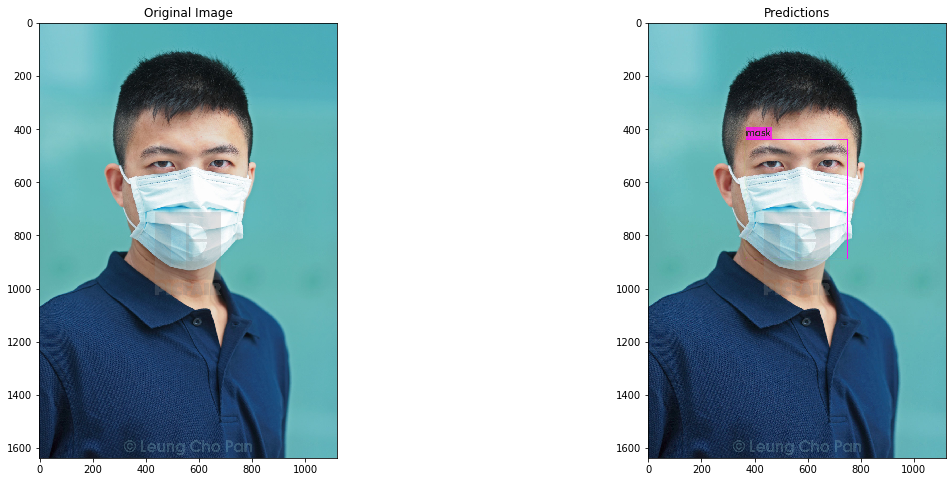

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 435 K-images (6 Kilo-batches_64) 
test-image2.jpg: Predicted in 17.878000 milli-seconds.
mask: 100%
mask: 99%
mask: 91%
no_mask: 100%
no_mask: 99%


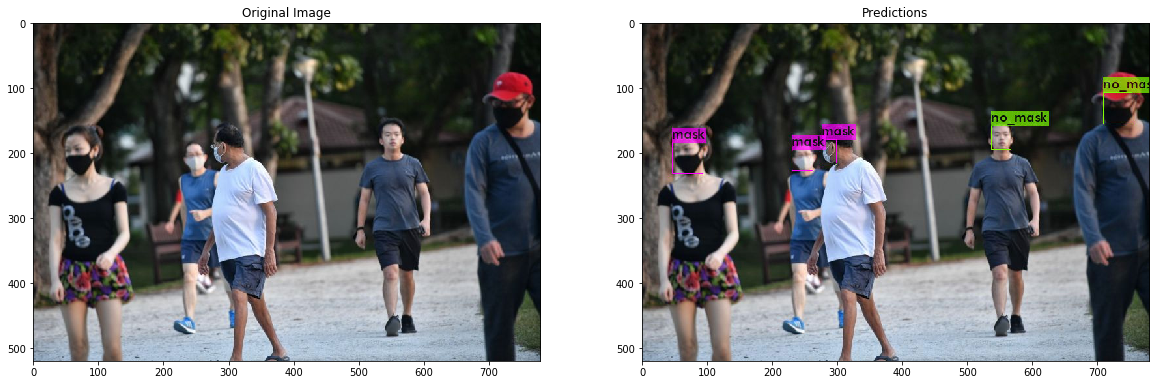

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 435 K-images (6 Kilo-batches_64) 
test-image3.jpg: Predicted in 18.373000 milli-seconds.
mask: 100%
mask: 98%
mask: 100%
no_mask: 100%
mask: 100%
mask: 100%
mask: 100%
mask: 100%
mask: 100%
mask: 100%
mask: 100%
mask: 100%
mask: 100%
mask: 100%
mask: 100%
mask: 100%
mask: 99%
mask: 100%
mask: 100%


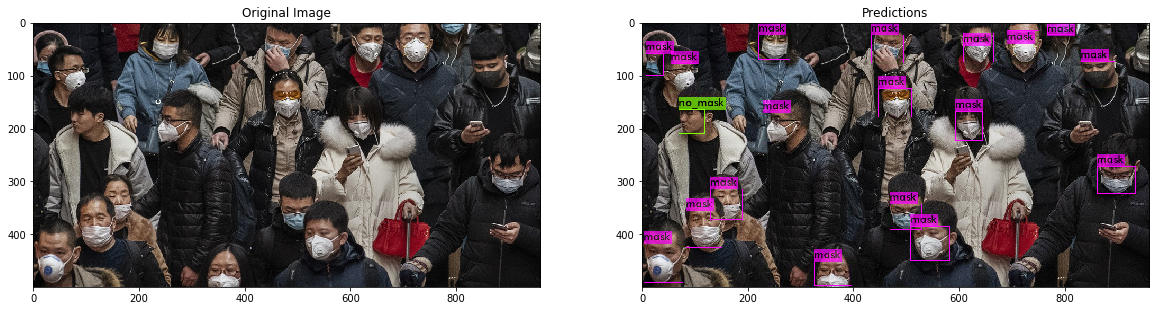

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 435 K-images (6 Kilo-batches_64) 
test-image4.jpg: Predicted in 17.247000 milli-seconds.
no_mask: 99%
no_mask: 97%
mask: 100%
no_mask: 93%
mask: 100%
no_mask: 99%
mask: 100%
no_mask: 99%
mask: 100%


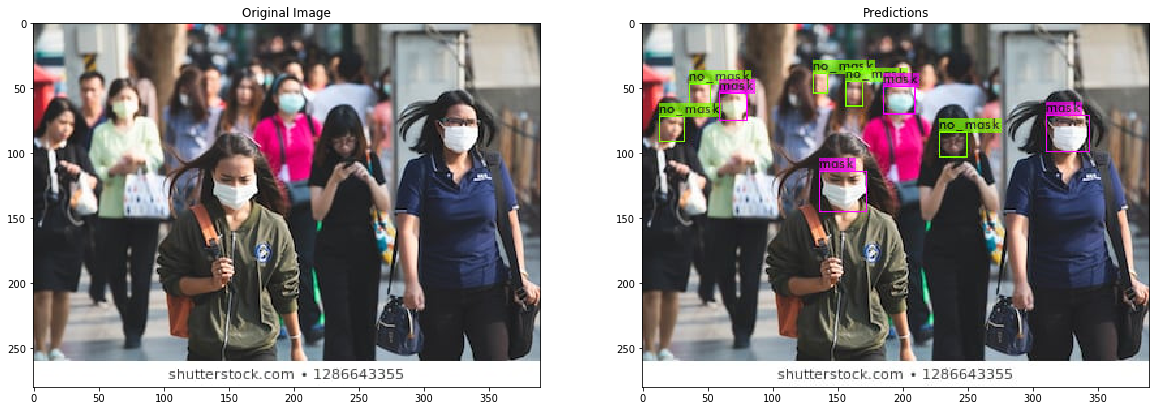

In [107]:
!./darknet/darknet detector test yolov4-mask-no-mask-setup.data yolov4-mask-no-mask-test.cfg ./backup/yolov4-mask-no-mask-train_best.weights test-image1.jpg -dont_show -thresh .6 2> /dev/null
display_output("test-image1.jpg")
!mv predictions.jpg v4-test-image1.jpg

!./darknet/darknet detector test yolov4-mask-no-mask-setup.data yolov4-mask-no-mask-test.cfg ./backup/yolov4-mask-no-mask-train_best.weights test-image2.jpg -dont_show -thresh .6 2> /dev/null
display_output("test-image2.jpg")
!mv predictions.jpg v4-test-image2.jpg

!./darknet/darknet detector test yolov4-mask-no-mask-setup.data yolov4-mask-no-mask-test.cfg ./backup/yolov4-mask-no-mask-train_best.weights test-image3.jpg -dont_show -thresh .6 2> /dev/null
display_output("test-image3.jpg")
!mv predictions.jpg v4-test-image3.jpg

!./darknet/darknet detector test yolov4-mask-no-mask-setup.data yolov4-mask-no-mask-test.cfg ./backup/yolov4-mask-no-mask-train_best.weights test-image4.jpg -dont_show -thresh .6 2> /dev/null
display_output("test-image4.jpg")
!mv predictions.jpg v4-test-image4.jpg


Test V4 on videos

In [109]:
!./darknet/darknet detector demo yolov4-mask-no-mask-setup.data yolov4-mask-no-mask-test.cfg ./backup/yolov4-mask-no-mask-train_best.weights test-video1.mp4 -thresh .6 -out_filename v4-out-vid1.avi -dont_show

 CUDA-version: 10020 (10020), cuDNN: 7.6.5, GPU count: 2  
 OpenCV version: 4.2.0
Demo
 0 : compute_capability = 610, cudnn_half = 0, GPU: TITAN X (Pascal) 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354

 102 conv    512       1 x 1/ 1     13 x  13 x 512 ->   13 x  13 x 512 0.089 BF
 103 route  102 87 	                           ->   13 x  13 x1024 
 104 conv   1024       1 x 1/ 1     13 x  13 x1024 ->   13 x  13 x1024 0.354 BF
 105 conv    512       1 x 1/ 1     13 x  13 x1024 ->   13 x  13 x 512 0.177 BF
 106 conv   1024       3 x 3/ 1     13 x  13 x 512 ->   13 x  13 x1024 1.595 BF
 107 conv    512       1 x 1/ 1     13 x  13 x1024 ->   13 x  13 x 512 0.177 BF
 108 max                5x 5/ 1     13 x  13 x 512 ->   13 x  13 x 512 0.002 BF
 109 route  107 		                           ->   13 x  13 x 512 
 110 max                9x 9/ 1     13 x  13 x 512 ->   13 x  13 x 512 0.007 BF
 111 route  107 		                           ->   13 x  13 x 512 
 112 max               13x13/ 1     13 x  13 x 512 ->   13 x  13 x 512 0.015 BF
 113 route  112 110 108 107 	                   ->   13 x  13 x2048 
 114 conv    512       1 x 1/ 1     13 x  13 x2048 ->   13 x  13 x 512 0.354 BF
 115 conv  


 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 98% 

FPS:53.4 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 98% 

FPS:53.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 98% 

FPS:54.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_mask: 97% 

FPS:54.6 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_mask: 97% 

FPS:54.6 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 98% 
no_mask: 97% 

FPS:54.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 97% 
no_mask: 96% 

FPS:55.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 93% 
mask: 95% 

FPS:55.4 	 AVG_FPS:0.0

 cvWriteFrame 



 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:56.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.6 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.4 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:56.7 	 AVG_FPS:0.0

 cvWriteFrame 
Obj

Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 96% 

FPS:57.8 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 96% 

FPS:58.1 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 96% 

FPS:58.0 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 
mask: 94% 

FPS:57.6 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 96% 

FPS:57.5 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 97% 

FPS:57.6 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 97% 

FPS:57.6 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 95% 

FPS:57.8 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 96% 

FPS:57.5 	 AVG_FPS:55.4



 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 98% 

FPS:56.3 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 98% 

FPS:56.4 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 98% 

FPS:56.5 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 98% 

FPS:56.8 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 98% 

FPS:56.8 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 98% 

FPS:57.0 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 98% 

FPS:56.9 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 98% 

FPS:57.1 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

no_mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 98% 

FPS:56.


 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:56.3 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:56.5 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:56.8 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:56.9 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:56.5 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:56.7 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:56.9 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:56.9 	 AVG_FPS:55.4

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:56.8 	 AVG_FPS:55.4

 cvWriteF


 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:56.9 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.1 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.2 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:56.8 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.0 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.0 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.3 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.4 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.4 	 AVG_FPS:57.0

 cvWriteF


 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:56.7 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:56.8 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.2 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.0 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.1 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.1 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.4 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.1 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 100% 
mask: 100% 
mask: 100% 
mask: 99% 

FPS:57.6 	 AVG_FPS:57.0

 cvWriteF

In [110]:
!./darknet/darknet detector demo yolov4-mask-no-mask-setup.data yolov4-mask-no-mask-test.cfg ./backup/yolov4-mask-no-mask-train_best.weights test-video2.mp4 -thresh .6 -out_filename v4-out-vid2.avi -dont_show

 CUDA-version: 10020 (10020), cuDNN: 7.6.5, GPU count: 2  
 OpenCV version: 4.2.0
Demo
 0 : compute_capability = 610, cudnn_half = 0, GPU: TITAN X (Pascal) 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354

 104 conv   1024       1 x 1/ 1     13 x  13 x1024 ->   13 x  13 x1024 0.354 BF
 105 conv    512       1 x 1/ 1     13 x  13 x1024 ->   13 x  13 x 512 0.177 BF
 106 conv   1024       3 x 3/ 1     13 x  13 x 512 ->   13 x  13 x1024 1.595 BF
 107 conv    512       1 x 1/ 1     13 x  13 x1024 ->   13 x  13 x 512 0.177 BF
 108 max                5x 5/ 1     13 x  13 x 512 ->   13 x  13 x 512 0.002 BF
 109 route  107 		                           ->   13 x  13 x 512 
 110 max                9x 9/ 1     13 x  13 x 512 ->   13 x  13 x 512 0.007 BF
 111 route  107 		                           ->   13 x  13 x 512 
 112 max               13x13/ 1     13 x  13 x 512 ->   13 x  13 x 512 0.015 BF
 113 route  112 110 108 107 	                   ->   13 x  13 x2048 
 114 conv    512       1 x 1/ 1     13 x  13 x2048 ->   13 x  13 x 512 0.354 BF
 115 conv   1024       3 x 3/ 1     13 x  13 x 512 ->   13 x  13 x1024 1.595 BF
 116 conv    512       1 x 1/ 1     13 x  13 x1024 ->   13 x  13 x 512 0.177 BF

Objects:

no_mask: 99% 
no_mask: 97% 
no_mask: 97% 
no_mask: 89% 
no_mask: 83% 
mask: 65% 

FPS:51.2 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 98% 
no_mask: 96% 
no_mask: 86% 
no_mask: 85% 

FPS:51.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 86% 
no_mask: 78% 
mask: 98% 

FPS:50.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 93% 
no_mask: 72% 
mask: 95% 

FPS:50.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 93% 
no_mask: 70% 
mask: 95% 

FPS:51.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 97% 
no_mask: 96% 
no_mask: 88% 
no_mask: 68% 
mask: 98% 

FPS:51.2 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 97% 
no_mask: 94% 
no_mask: 82% 
no_mask: 80% 
no_mask: 63% 
no_mask: 61% 
mask: 84% 

FPS:51.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 98% 
no_mask: 97% 
no_mask: 89% 
no_mask: 86% 
no_mask: 75% 
no_mask: 74

no_mask: 79% 
no_mask: 67% 
mask: 75% 

FPS:53.2 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 93% 
no_mask: 70% 
no_mask: 62% 
mask: 83% 

FPS:53.4 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 75% 
no_mask: 73% 
no_mask: 73% 
mask: 86% 

FPS:53.4 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 89% 
no_mask: 85% 
no_mask: 76% 
no_mask: 73% 
no_mask: 66% 
mask: 88% 

FPS:53.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 89% 
no_mask: 84% 
no_mask: 72% 
no_mask: 68% 
no_mask: 67% 
mask: 89% 

FPS:53.4 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 90% 
no_mask: 79% 
no_mask: 76% 
no_mask: 70% 
no_mask: 69% 
mask: 92% 
mask: 80% 

FPS:53.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 82% 
no_mask: 79% 
no_mask: 72% 
no_mask: 68% 
no_mask: 64% 
mask: 93% 
mask: 79% 

FPS:53.3 	 AVG_FPS:0.0

 cvWrite


 cvWriteFrame 
Objects:

no_mask: 94% 
no_mask: 93% 
no_mask: 92% 
no_mask: 68% 
mask: 99% 
mask: 80% 
mask: 77% 

FPS:53.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 97% 
no_mask: 94% 
no_mask: 92% 
no_mask: 64% 
mask: 99% 

FPS:54.2 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 94% 
no_mask: 88% 
no_mask: 83% 
no_mask: 81% 
no_mask: 63% 
mask: 98% 

FPS:54.2 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 93% 
no_mask: 89% 
no_mask: 78% 
mask: 99% 

FPS:54.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 98% 
no_mask: 95% 
no_mask: 88% 
no_mask: 71% 
mask: 98% 

FPS:54.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 98% 
no_mask: 95% 
no_mask: 79% 
no_mask: 67% 
mask: 98% 

FPS:54.2 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 98% 
no_mask: 95% 
no_mask: 82% 
no_mask: 68% 
mask: 97% 

FPS:54.2 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 95% 
no_mask: 88% 
no_mask: 83% 
n


 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 97% 
no_mask: 95% 
mask: 94% 
mask: 73% 

FPS:53.7 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 97% 
no_mask: 95% 
mask: 92% 
mask: 66% 

FPS:53.6 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 98% 
no_mask: 81% 
mask: 78% 

FPS:53.5 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 98% 
no_mask: 98% 
mask: 87% 

FPS:53.6 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 98% 
no_mask: 97% 
mask: 96% 

FPS:53.7 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 98% 
no_mask: 73% 
mask: 94% 

FPS:53.9 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 96% 
no_mask: 92% 
no_mask: 86% 
no_mask: 82% 
mask: 64% 

FPS:53.5 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 96% 
no_mask: 87% 
no_


 cvWriteFrame 
Objects:

no_mask: 90% 
mask: 100% 
mask: 94% 

FPS:53.0 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 95% 
no_mask: 89% 
mask: 99% 
mask: 98% 

FPS:52.8 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 95% 
no_mask: 87% 
mask: 100% 

FPS:53.1 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 96% 
no_mask: 90% 
mask: 100% 

FPS:53.1 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 89% 
no_mask: 81% 
no_mask: 65% 
mask: 99% 

FPS:53.0 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 64% 
mask: 100% 
mask: 92% 

FPS:53.2 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 97% 
no_mask: 71% 
no_mask: 71% 
mask: 100% 

FPS:53.1 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 76% 
mask: 99% 

FPS:53.2 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 94% 
no_mask: 69% 
mask: 76% 
mask: 70% 

FPS:53.1 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

no_

Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_mask: 98% 
no_mask: 94% 
no_mask: 90% 
no_mask: 90% 
no_mask: 90% 

FPS:52.9 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 98% 
no_mask: 95% 
no_mask: 92% 
no_mask: 90% 
no_mask: 90% 

FPS:53.0 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 96% 
no_mask: 91% 
no_mask: 90% 
no_mask: 89% 
no_mask: 75% 

FPS:53.0 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 94% 
no_mask: 93% 
no_mask: 87% 
no_mask: 80% 
no_mask: 72% 
no_mask: 65% 

FPS:52.9 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 97% 
no_mask: 97% 
no_mask: 94% 
no_mask: 90% 
no_mask: 87% 
no_mask: 64% 

FPS:52.9 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 97% 
no_mask: 92% 
no_mask: 87% 
no_mask: 85% 

FPS:53.0 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_


 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 92% 
no_mask: 84% 
no_mask: 84% 
no_mask: 84% 
no_mask: 77% 
no_mask: 69% 
no_mask: 61% 
mask: 97% 

FPS:52.7 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 92% 
no_mask: 89% 
no_mask: 80% 
no_mask: 79% 
no_mask: 63% 
mask: 96% 

FPS:52.8 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 97% 
no_mask: 92% 
no_mask: 88% 
no_mask: 81% 
no_mask: 77% 
mask: 96% 

FPS:52.6 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 93% 
no_mask: 93% 
no_mask: 91% 
no_mask: 76% 
no_mask: 73% 
no_mask: 71% 
no_mask: 67% 
no_mask: 63% 
no_mask: 63% 
mask: 98% 

FPS:52.4 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 96% 
no_mask: 96% 
no_mask: 95% 
no_mask: 84% 
no_mask: 68% 
no_mask: 64% 
mask: 98% 

FPS:52.6 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 96% 
no_mask: 96% 
no_mask: 94% 
no_mask: 93% 
no_mask: 90% 
no_mask: 62% 
mask: 97% 

FPS:52.6 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:


Objects:

no_mask: 99% 
no_mask: 97% 
no_mask: 97% 
no_mask: 97% 
no_mask: 95% 
no_mask: 81% 
no_mask: 69% 
mask: 100% 

FPS:53.0 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 98% 
no_mask: 98% 
no_mask: 97% 
no_mask: 84% 
no_mask: 82% 
no_mask: 73% 
no_mask: 66% 
mask: 99% 

FPS:53.1 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 95% 
no_mask: 89% 
no_mask: 81% 
no_mask: 81% 
mask: 99% 

FPS:52.8 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_mask: 96% 
no_mask: 96% 
no_mask: 80% 
no_mask: 76% 
mask: 99% 

FPS:53.0 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 98% 
no_mask: 86% 
no_mask: 85% 
no_mask: 79% 
mask: 99% 

FPS:52.9 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 98% 
no_mask: 98% 
mask: 99% 
mask: 66% 

FPS:52.7 	 AVG_FPS:53.1

 cvWriteFrame 
Objects:

no_mask: 100%

Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 77% 
no_mask: 77% 
mask: 95% 
mask: 93% 

FPS:52.4 	 AVG_FPS:52.6

 cvWriteFrame 
Objects:

no_mask: 97% 
no_mask: 92% 
no_mask: 69% 
no_mask: 68% 
mask: 99% 
mask: 95% 

FPS:52.6 	 AVG_FPS:52.6

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 83% 
no_mask: 80% 
no_mask: 63% 
mask: 99% 
mask: 97% 

FPS:52.3 	 AVG_FPS:52.6

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 95% 
no_mask: 91% 
mask: 99% 
mask: 89% 

FPS:52.0 	 AVG_FPS:52.6

 cvWriteFrame 
Objects:

no_mask: 97% 
no_mask: 82% 
mask: 100% 
mask: 99% 

FPS:52.3 	 AVG_FPS:52.6

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 92% 
no_mask: 89% 
no_mask: 78% 
mask: 98% 

FPS:52.3 	 AVG_FPS:52.6

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 91% 
no_mask: 91% 
no_mask: 78% 
mask: 98% 

FPS:52.5 	 AVG_FPS:52.6

 cvWriteFrame 
Objects:

no_mask: 92% 
no_mask: 86% 
no_mask: 78% 
mask: 98% 
mask: 92% 

FPS:52.2 	 AVG_FPS:52.6

 cvWriteFrame 
Objects:

no_mask: 87% 
no_mask

Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 97% 
no_mask: 96% 
no_mask: 88% 
no_mask: 87% 

FPS:52.3 	 AVG_FPS:52.6

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 98% 
no_mask: 80% 
no_mask: 78% 

FPS:52.2 	 AVG_FPS:52.6

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 96% 
no_mask: 87% 
no_mask: 87% 
no_mask: 74% 

FPS:52.2 	 AVG_FPS:52.6

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 97% 
no_mask: 96% 
no_mask: 68% 
no_mask: 64% 
mask: 77% 

FPS:52.1 	 AVG_FPS:52.6

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 97% 
no_mask: 97% 
no_mask: 89% 
no_mask: 80% 
no_mask: 70% 

FPS:52.3 	 AVG_FPS:52.6

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 98% 
no_mask: 89% 
no_mask: 74% 
no_mask: 64% 
no_mask: 63% 
mask: 89% 

FPS:52.3 	 AVG_FPS:52.6

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 97% 
no_mask: 94% 
no_mask: 77% 
no_mask: 71% 
mask: 91% 

FPS:52.2 	 AV


 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 95% 
no_mask: 82% 
no_mask: 65% 
mask: 93% 
mask: 78% 

FPS:52.6 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 97% 
no_mask: 91% 
no_mask: 84% 
mask: 93% 
mask: 90% 

FPS:52.3 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 96% 
no_mask: 93% 
no_mask: 93% 
no_mask: 88% 
no_mask: 78% 
no_mask: 77% 
mask: 87% 
mask: 70% 

FPS:52.1 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 97% 
no_mask: 95% 
no_mask: 95% 
no_mask: 90% 
no_mask: 83% 
mask: 85% 

FPS:51.9 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 98% 
no_mask: 97% 
no_mask: 89% 
no_mask: 69% 
mask: 67% 

FPS:52.3 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 96% 
no_mask: 90% 
no_mask: 75% 
no_mask: 66% 

FPS:52.3 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mas


 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 97% 
no_mask: 64% 
mask: 100% 
mask: 99% 
mask: 88% 

FPS:50.7 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_mask: 98% 
mask: 99% 
mask: 99% 

FPS:50.5 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_mask: 88% 
mask: 99% 
mask: 97% 
mask: 60% 

FPS:50.7 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 98% 
no_mask: 95% 
mask: 99% 
mask: 99% 

FPS:50.7 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 98% 
no_mask: 93% 
mask: 99% 
mask: 98% 

FPS:50.0 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 61% 
mask: 99% 

FPS:49.4 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_mask: 81% 
mask: 99% 

FPS:49.1 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_m


 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 91% 
no_mask: 86% 
no_mask: 72% 

FPS:49.1 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 89% 
no_mask: 86% 
no_mask: 70% 

FPS:49.2 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 96% 
no_mask: 94% 
no_mask: 84% 
no_mask: 78% 
no_mask: 68% 

FPS:49.4 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 98% 
no_mask: 90% 
no_mask: 89% 
no_mask: 88% 
no_mask: 79% 
no_mask: 72% 

FPS:49.6 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_mask: 95% 
no_mask: 90% 
mask: 95% 

FPS:49.5 	 AVG_FPS:51.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_mask: 98% 

FPS:48.0 	 AVG_FPS:51.8

 cvWriteFrame


 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 96% 
no_mask: 96% 
no_mask: 95% 
no_mask: 87% 
mask: 99% 
mask: 98% 

FPS:48.7 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 96% 
no_mask: 95% 
no_mask: 95% 
no_mask: 87% 
mask: 99% 
mask: 98% 

FPS:48.9 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 97% 
no_mask: 95% 
no_mask: 94% 
no_mask: 94% 
no_mask: 92% 
mask: 100% 
mask: 98% 

FPS:48.9 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 96% 
no_mask: 85% 
no_mask: 71% 
no_mask: 69% 
no_mask: 68% 
mask: 99% 
mask: 98% 

FPS:49.2 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 98% 
no_mask: 95% 
no_mask: 90% 
no_mask: 88% 
no_mask: 80% 
mask: 100% 
mask: 100% 

FPS:49.1 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 97% 
no_mask: 97% 
no_mask: 94% 
no_mask: 93% 
no_mask: 88% 
no_mask: 63% 
mask: 100% 
mask: 99% 
mask: 94% 

FPS:48.9 	 AVG_FPS:49.8

 cvWriteFrame 

Objects:

no_mask: 100% 
no_mask: 97% 
no_mask: 97% 
no_mask: 96% 
no_mask: 87% 
no_mask: 83% 

FPS:47.4 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 97% 
no_mask: 96% 
no_mask: 83% 
no_mask: 72% 
no_mask: 61% 

FPS:46.6 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 96% 
no_mask: 72% 

FPS:46.8 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 97% 
no_mask: 84% 
no_mask: 79% 
no_mask: 69% 

FPS:47.3 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_mask: 95% 
no_mask: 89% 
no_mask: 82% 
no_mask: 81% 
no_mask: 80% 

FPS:47.2 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_mask: 96% 
no_mask: 89% 
no_mask: 84% 
no_mask: 80% 
no_mask: 80% 

FPS:47.4 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_mask: 96% 
no_mask: 87% 

FPS:47.5 	 AVG_


 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 95% 
no_mask: 74% 
mask: 99% 

FPS:52.4 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 94% 
no_mask: 88% 
no_mask: 81% 
mask: 100% 

FPS:52.8 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 98% 
no_mask: 96% 
no_mask: 93% 
mask: 99% 

FPS:53.0 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 95% 
no_mask: 86% 
no_mask: 86% 
no_mask: 65% 
mask: 99% 

FPS:52.8 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 95% 
no_mask: 86% 
no_mask: 84% 
no_mask: 70% 
mask: 99% 

FPS:52.6 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 95% 
no_mask: 70% 
mask: 99% 

FPS:52.7 	 AVG_FPS:49.8

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 98% 
no_mask: 98% 
no_mask: 93% 
no_mask: 73% 
mask: 

Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 98% 
no_mask: 91% 
no_mask: 84% 
no_mask: 61% 
mask: 96% 

FPS:49.9 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 95% 
no_mask: 89% 
no_mask: 88% 
no_mask: 86% 
no_mask: 61% 
mask: 96% 

FPS:49.7 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 70% 

FPS:49.0 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 73% 
no_mask: 62% 

FPS:48.9 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 82% 
no_mask: 70% 

FPS:48.9 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 97% 
no_mask: 90% 
no_mask: 90% 
no_mask: 83% 
no_mask: 77% 
mask: 61% 

FPS:48.5 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 96% 
no_mask: 94% 
no_mask: 63% 

FPS:48.0 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 98% 
no_mask: 90% 
no_mask: 82% 
no_mask: 8


 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 93% 
no_mask: 88% 
mask: 99% 
mask: 97% 

FPS:50.4 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 98% 
no_mask: 97% 
no_mask: 94% 
no_mask: 92% 
no_mask: 69% 
no_mask: 61% 
mask: 100% 

FPS:50.7 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 96% 
no_mask: 95% 
no_mask: 95% 
no_mask: 82% 
no_mask: 75% 
no_mask: 73% 
mask: 100% 

FPS:50.7 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 95% 
no_mask: 91% 
no_mask: 78% 
no_mask: 73% 
no_mask: 67% 
mask: 100% 

FPS:50.0 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 95% 
no_mask: 87% 
no_mask: 84% 
no_mask: 78% 
no_mask: 74% 
mask: 100% 

FPS:49.8 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 94% 
no_mask: 93% 
no_mask: 92% 
no_mask: 89% 
no_mask: 85% 
no_mask: 82% 
mask: 100% 
mask: 85% 

FPS:50.1 	 AVG_FPS:49


 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_mask: 98% 
no_mask: 98% 
no_mask: 92% 
no_mask: 91% 

FPS:49.9 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 100% 
no_mask: 100% 
no_mask: 99% 
no_mask: 97% 
no_mask: 96% 

FPS:50.0 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 97% 
no_mask: 83% 

FPS:49.6 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 99% 
no_mask: 97% 
no_mask: 91% 

FPS:49.9 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 98% 
no_mask: 90% 
no_mask: 89% 
no_mask: 70% 
no_mask: 68% 
no_mask: 68% 

FPS:49.7 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 98% 
no_mask: 95% 
no_mask: 74% 
no_mask: 70% 
no_mask: 60% 

FPS:50.0 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 99% 
no_mask: 89% 
no_mask: 88% 
no_mask: 62% 
no_mask: 62% 



 cvWriteFrame 
Objects:

no_mask: 97% 
no_mask: 92% 
no_mask: 88% 
no_mask: 70% 
no_mask: 67% 
mask: 90% 

FPS:48.9 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 90% 
no_mask: 86% 
no_mask: 85% 
no_mask: 77% 
no_mask: 64% 
mask: 87% 

FPS:48.9 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 93% 
no_mask: 86% 
no_mask: 83% 
no_mask: 82% 
no_mask: 79% 
mask: 88% 

FPS:49.1 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 98% 
no_mask: 93% 
no_mask: 83% 
no_mask: 82% 
no_mask: 81% 
no_mask: 79% 
no_mask: 61% 
mask: 88% 

FPS:48.9 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 92% 
no_mask: 92% 
no_mask: 82% 
no_mask: 81% 
no_mask: 75% 
no_mask: 74% 
mask: 71% 

FPS:48.8 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 88% 
no_mask: 88% 
no_mask: 88% 
no_mask: 83% 
no_mask: 83% 
no_mask: 79% 

FPS:49.3 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 


 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 87% 
no_mask: 71% 
no_mask: 71% 
no_mask: 67% 
mask: 98% 
mask: 81% 

FPS:48.5 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 88% 
no_mask: 72% 
no_mask: 63% 
no_mask: 63% 
mask: 98% 
mask: 84% 

FPS:48.7 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 99% 
no_mask: 91% 
no_mask: 81% 
no_mask: 76% 
mask: 90% 

FPS:48.9 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 92% 
no_mask: 74% 
no_mask: 73% 
no_mask: 60% 

FPS:48.7 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 85% 
no_mask: 71% 
mask: 88% 
mask: 80% 

FPS:48.4 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 99% 
no_mask: 81% 
no_mask: 79% 
no_mask: 78% 
no_mask: 75% 
mask: 94% 

FPS:48.0 	 AVG_FPS:50.0

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 96% 
no_mask: 88% 
no_mask: 87% 
no_mask: 84% 
no_mask: 72% 
mask: 71% 

FPS:47.8 	 AVG_F


 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 95% 
no_mask: 95% 
no_mask: 87% 

FPS:47.4 	 AVG_FPS:48.3
Stream closed.

 cvWriteFrame 
input video stream closed. 
 closing... closed!output_video_writer closed. 
